In [1]:
import pandas as pd

https://ale.farama.org/environments/frogger/
\n
https://ale.farama.org/environments/

In [5]:
import gymnasium as gym
import os
import ale_py
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np

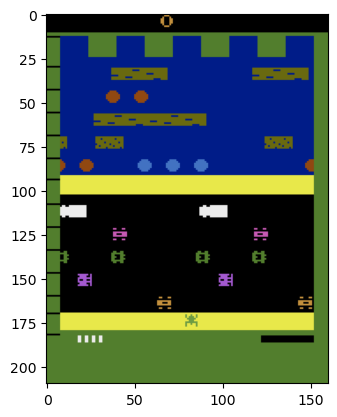

In [3]:
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, info = env.reset()
plt.imshow(obs)
plt.show()

In [11]:
import numpy as np
# Initialize the environment
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()
frame = env.render()

frame = np.array(frame)

# Define a function to handle mouse clicks and print RGB values
def get_rgb(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        r, g, b = frame[y, x]  # Already in RGB format
        print(f"RGB Value at ({x}, {y}): R={r}, G={g}, B={b}")

# Set up a window and a mouse callback to check RGB values
cv2.imshow("Frogger Frame", frame)
cv2.setMouseCallback("Frogger Frame", get_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

env.close()


RGB Value at (72, 87): R=66, G=114, B=194
RGB Value at (25, 85): R=144, G=72, B=17
RGB Value at (87, 60): R=105, G=105, B=15
RGB Value at (107, 51): R=0, G=28, B=136


In [12]:
corners = []
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()
frame = env.render()

frame = np.array(frame)
# Define a function to handle mouse clicks and record the corner coordinates
def get_corners(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        corners.append((x, y))
        print(f"Corner {len(corners)} clicked at: ({x}, {y})")
        # Draw a circle at the clicked corner
        cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)  # Red circle for the corners
        # Display the updated image
        cv2.imshow("Select Corners", frame)
        
        # If 4 corners are selected, proceed
        if len(corners) == 4:
            print("All 4 corners selected!")
            # Optionally crop the image to the identified corners
            x1, y1 = corners[0]  # Top-left corner
            x2, y2 = corners[2]  # Bottom-right corner
            cropped_game_window = frame[y1:y2, x1:x2]
            cv2.imshow("Cropped Game Window", cropped_game_window)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            env.close()

# Set up a window and a mouse callback to select corners
cv2.imshow("Select Corners", frame)
cv2.setMouseCallback("Select Corners", get_corners)

cv2.waitKey(0)
cv2.destroyAllWindows()

Corner 1 clicked at: (32, 27)


frog values: R=110, G=156, B=66
Gree car:  R=82, G=126, B=45
Yellow car: R=195, G=144, B=61
Purple car: R=164, G=89, B=208
Pink car: R=198, G=89, B=179
white car: R=236, G=236, B=236
blue lillies: R=66, G=114, B=194
brown lillies: R=144, G=72, B=17
log:  R=105, G=105, B=15
Water: 8,28,140

In [ ]:

obs, info = env.reset()
start_time = time.time()
print("start time:", start_time)
score = 0

for _ in range(1000):
    action = env.action_space.sample() 
    obs, reward, terminated, truncated, info = env.step(action)
    score += reward

    plt.figure(figsize=(6, 6))  # Create a new figure
    plt.imshow(obs)  # Display the observation
    plt.axis("off")  # Hide axes
    plt.show() 
    
    if terminated or truncated:
        break
elapsed_time = time.time() - start_time
print(elapsed_time)
print(f"Final Score: {score}")



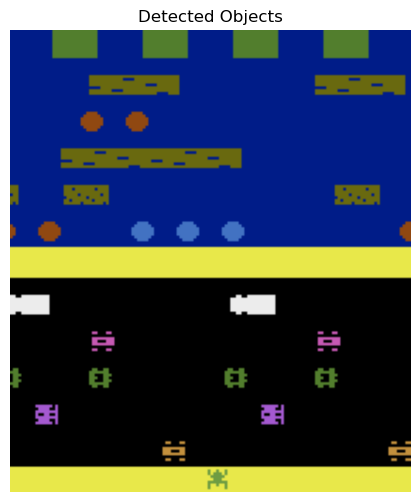

No objects detected.


In [6]:
obs, info = env.reset()
object_colors = {
    'frog': ((110, 156, 66), (120, 166, 76)),
    'green_car': ((82, 126, 45), (92, 136, 55)),
    'yellow_car': ((195, 144, 61), (205, 154, 71)),
    'purple_car': ((164, 89, 208), (174, 99, 218)),
    'pink_car': ((198, 89, 179), (208, 99, 189)),
    'white_car': ((236, 236, 236), (246, 246, 246)),
    'blue_lillies': ((66, 114, 194), (76, 124, 204)),
    'brown_lillies': ((144, 72, 17), (154, 82, 27)),
    'log': ((105, 105, 10), (115, 115, 25)),
   # 'water': ((0, 28, 136), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 15)
corner2 = (151, 14)
corner3 = (151, 179)
corner4 = (9, 179)

cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Process the image to find objects
def detect_objects(image_bgr, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_bgr, lower, upper)
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            # Filter small contours
            if cv2.contourArea(contour) > 500:  # Change this threshold as needed
                x, y, w, h = cv2.boundingRect(contour)
                detected_objects.append((label, (x, y, w, h)))

    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(cropped_image, object_colors)

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cropped_image)
ax = plt.gca()

# Draw bounding boxes
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()
# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")
env.close()

Detected objects:
green_car at position (106, 101) with width 12 and height 11
green_car at position (74, 101) with width 12 and height 11
green_car at position (26, 101) with width 12 and height 11
yellow_car at position (52, 127) with width 12 and height 11
purple_car at position (87, 114) with width 12 and height 11
purple_car at position (7, 114) with width 12 and height 11
pink_car at position (107, 88) with width 12 and height 11
pink_car at position (27, 88) with width 12 and height 11
white_car at position (76, 75) with width 20 and height 11
white_car at position (0, 75) with width 16 and height 11
blue_lillies at position (41, 49) with width 44 and height 11
brown_lillies at position (0, 49) with width 20 and height 11
brown_lillies at position (23, 10) with width 28 and height 11
log at position (113, 36) with width 20 and height 11
log at position (16, 23) with width 68 and height 24
log at position (106, 0) with width 36 and height 8
log at position (26, 0) with width 36 a

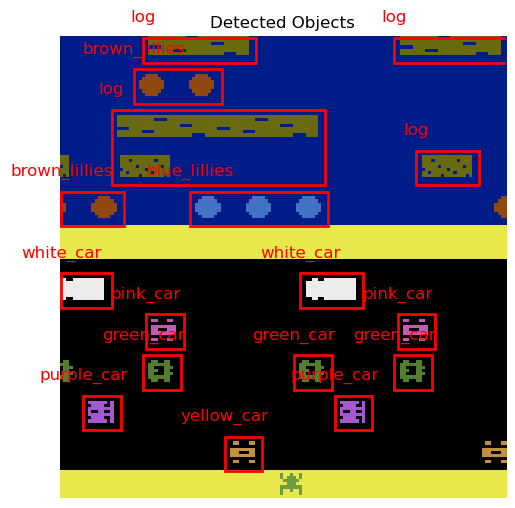

In [22]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)

        # Apply morphological operations to improve the mask (dilate and erode)
        mask = cv2.dilate(mask, None, iterations=4)
        mask = cv2.erode(mask, None, iterations=2)
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Loop over contours and filter by area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 100:  # Lower the threshold to capture more objects
                x, y, w, h = cv2.boundingRect(contour)
                detected_objects.append((label, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

Detected objects:
frog at position (68, 137) with width 11 and height 10
green_car at position (106, 101) with width 12 and height 11
green_car at position (74, 101) with width 12 and height 11
green_car at position (26, 101) with width 12 and height 11
yellow_car at position (132, 127) with width 10 and height 11
yellow_car at position (52, 127) with width 12 and height 11
purple_car at position (87, 114) with width 12 and height 11
purple_car at position (7, 114) with width 12 and height 11
pink_car at position (107, 88) with width 12 and height 11
pink_car at position (27, 88) with width 12 and height 11
white_car at position (76, 75) with width 20 and height 11
white_car at position (0, 75) with width 16 and height 11
blue_lillies at position (41, 49) with width 44 and height 11
brown_lillies at position (0, 49) with width 20 and height 11
brown_lillies at position (23, 10) with width 28 and height 11
log at position (114, 37) with width 18 and height 9
log at position (18, 37) wit

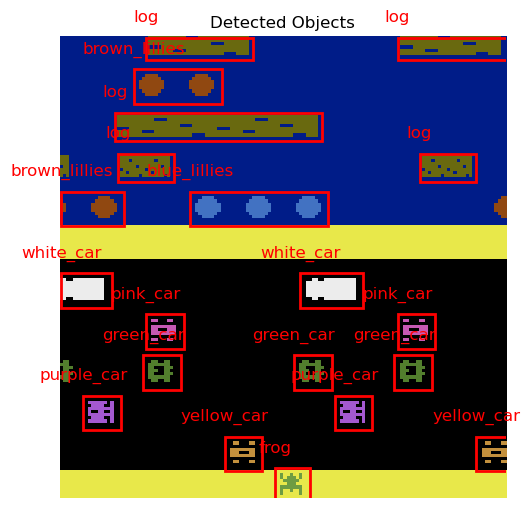

In [33]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # For logs, use different morphological operations to separate stacked objects
        if label == 'log':
            # Use less dilation to avoid merging nearby logs
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            # Use RETR_LIST instead of EXTERNAL to find all contours including nested ones
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # For other objects, use the original approach
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Loop over contours and filter by area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:  # Lower the threshold to capture more objects
                x, y, w, h = cv2.boundingRect(contour)
                
                # For logs, add additional check for height to better separate stacked logs
                if label == 'log' and h > 25:
                    # Split tall log objects into multiple logs based on typical log height
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        # Only add if it's still within the original bounding box
                        if log_y + log_height <= y + h:
                            detected_objects.append((label, (x, log_y, w, log_height)))
                else:
                    detected_objects.append((label, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

Detected objects:
frog at position (68, 137) with width 11 and height 10
car at position (106, 101) with width 12 and height 11
car at position (74, 101) with width 12 and height 11
car at position (26, 101) with width 12 and height 11
car at position (132, 127) with width 10 and height 11
car at position (52, 127) with width 12 and height 11
car at position (87, 114) with width 12 and height 11
car at position (7, 114) with width 12 and height 11
car at position (107, 88) with width 12 and height 11
car at position (27, 88) with width 12 and height 11
car at position (76, 75) with width 20 and height 11
car at position (0, 75) with width 16 and height 11
lily at position (73, 49) with width 12 and height 11
lily at position (57, 49) with width 12 and height 11
lily at position (41, 49) with width 12 and height 11
lily at position (8, 49) with width 12 and height 11
lily at position (39, 10) with width 12 and height 11
lily at position (23, 10) with width 12 and height 11
log at positi

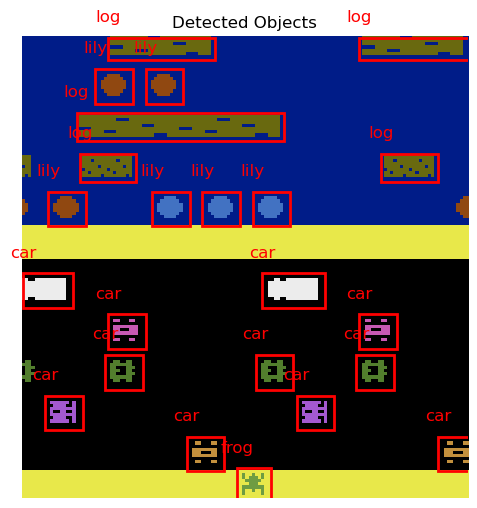

In [37]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

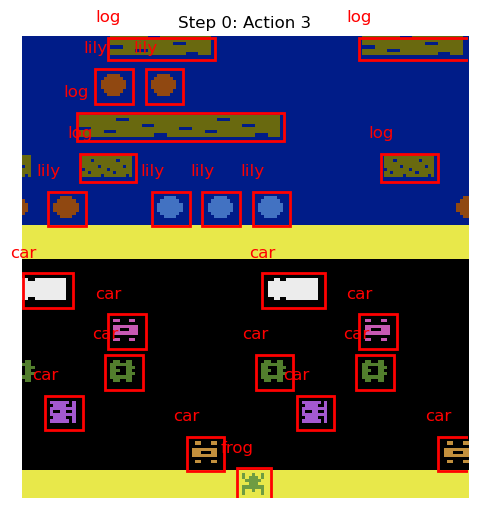

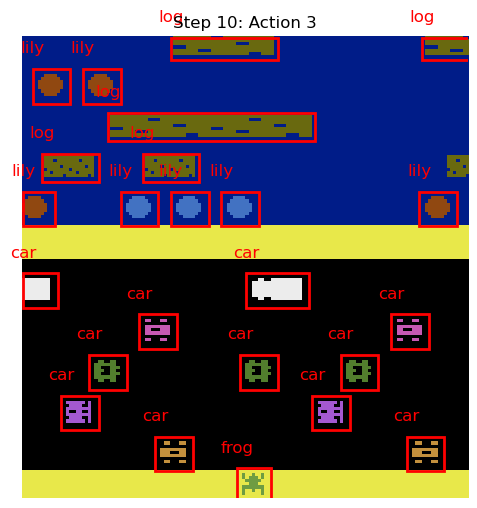

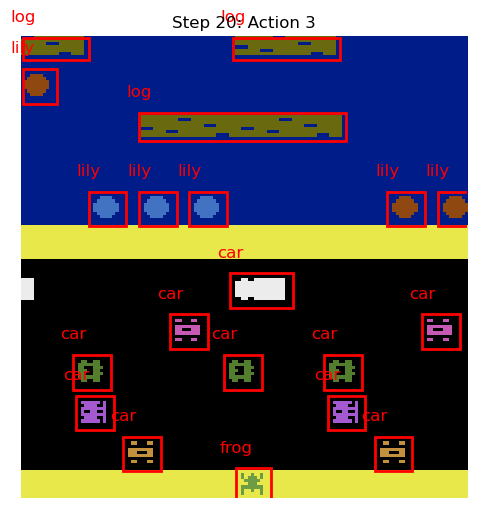

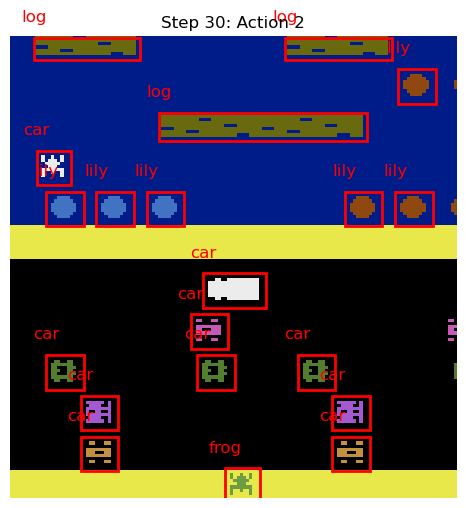

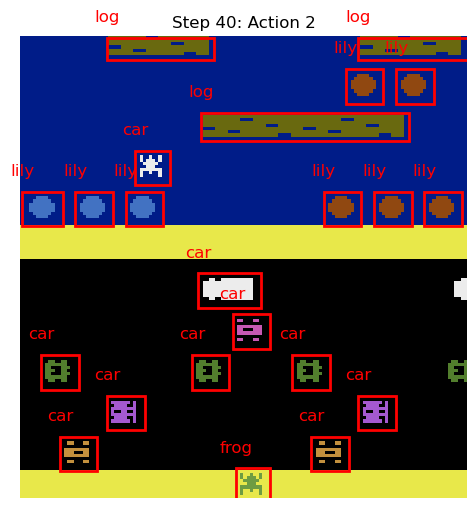

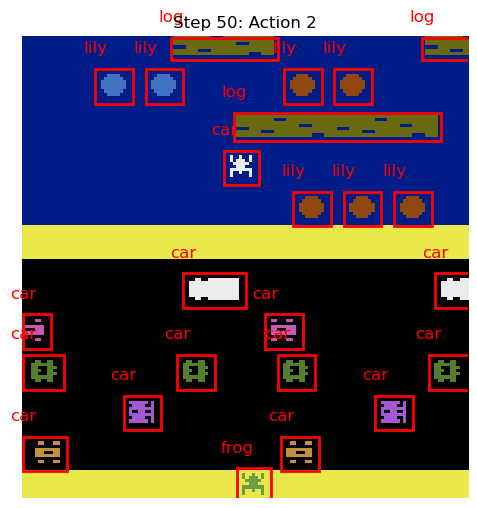

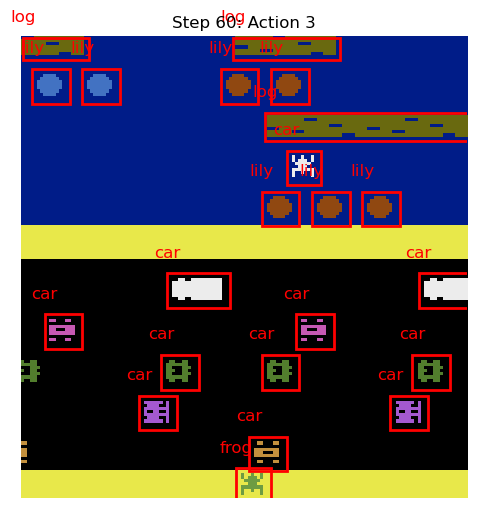

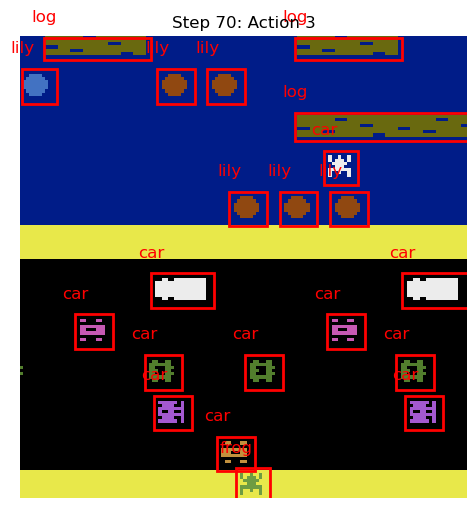

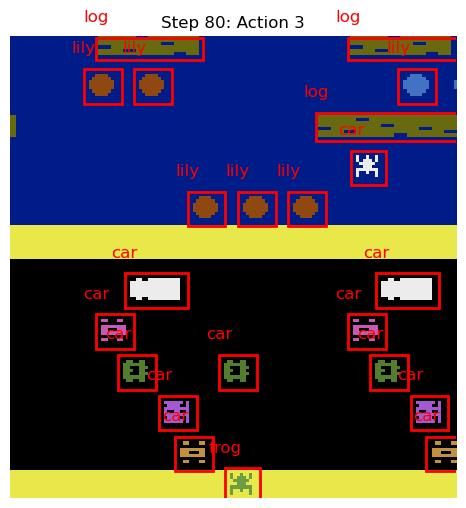

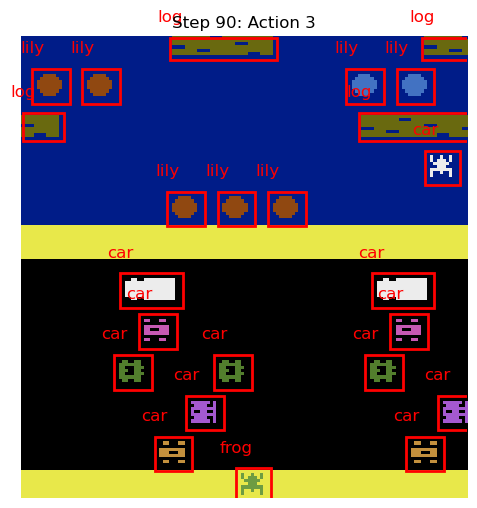

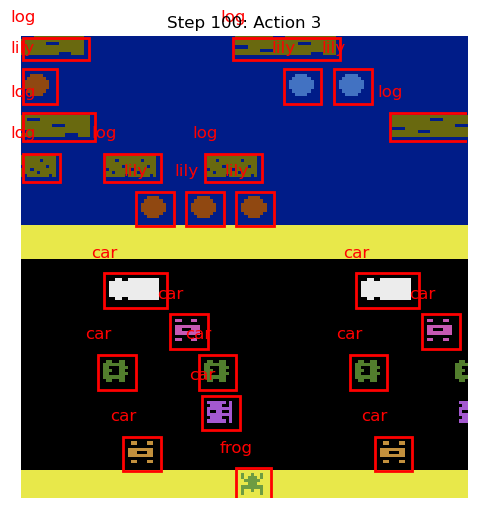

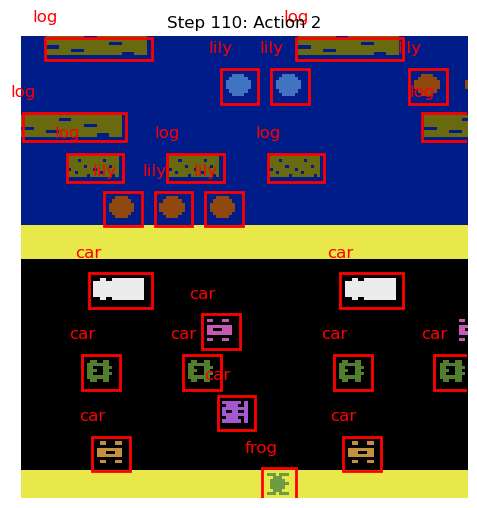

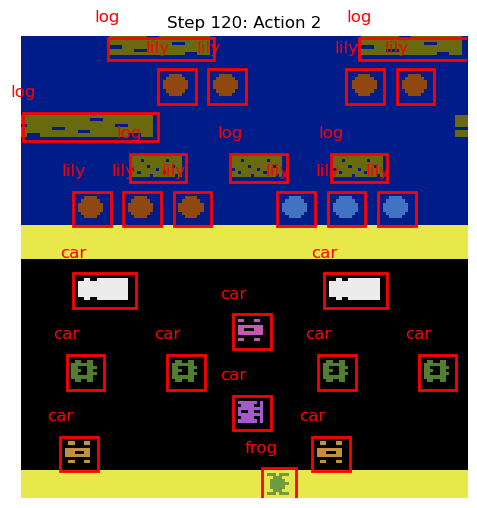

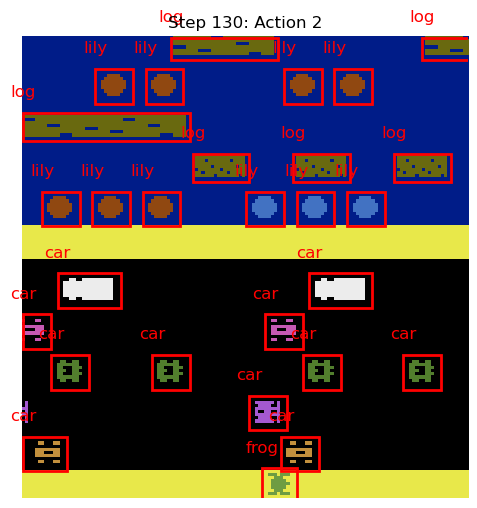

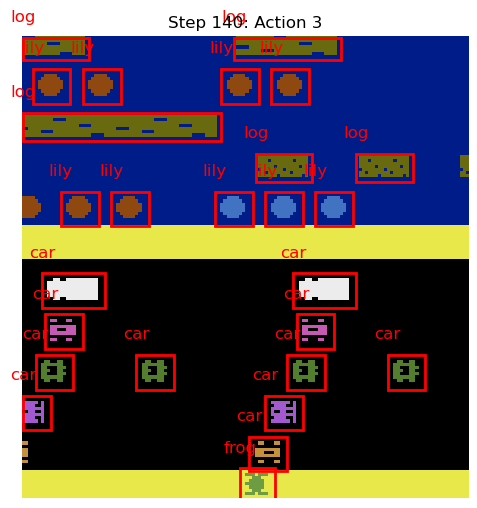

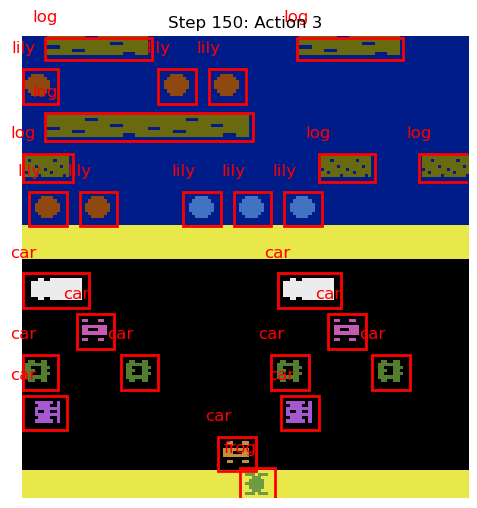

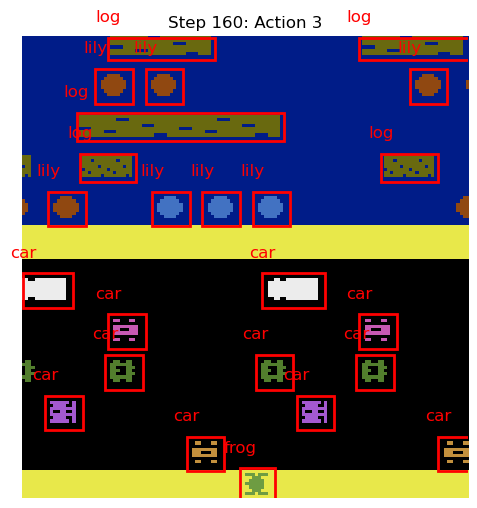

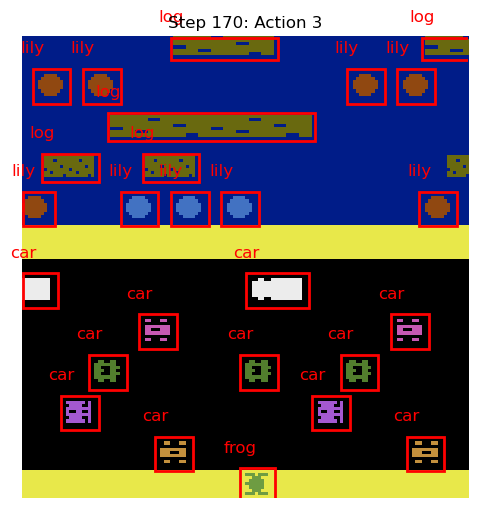

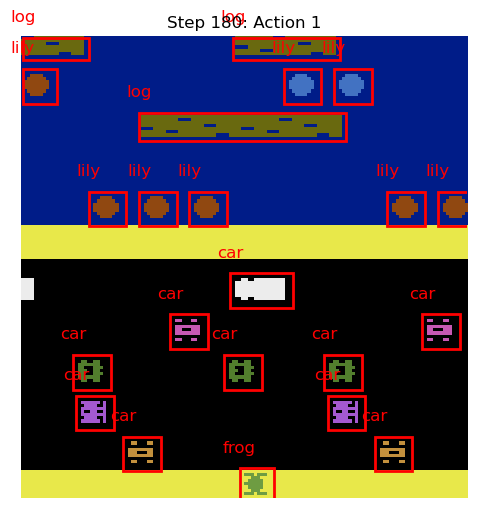

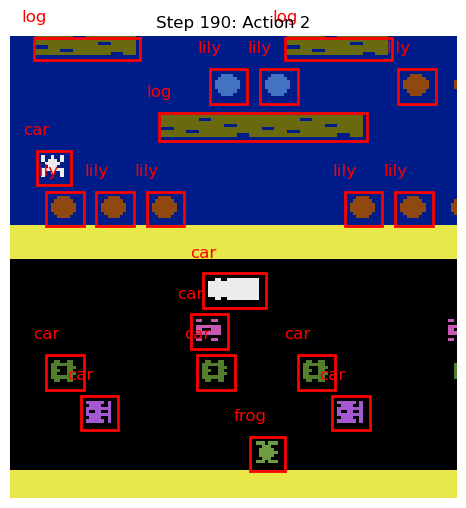

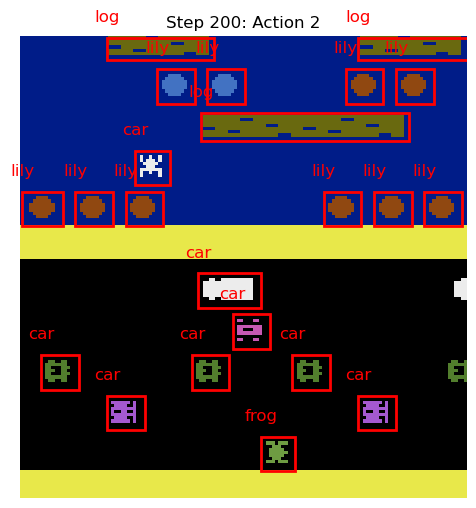

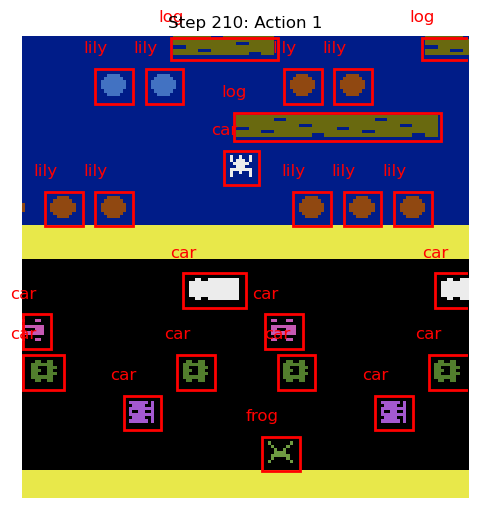

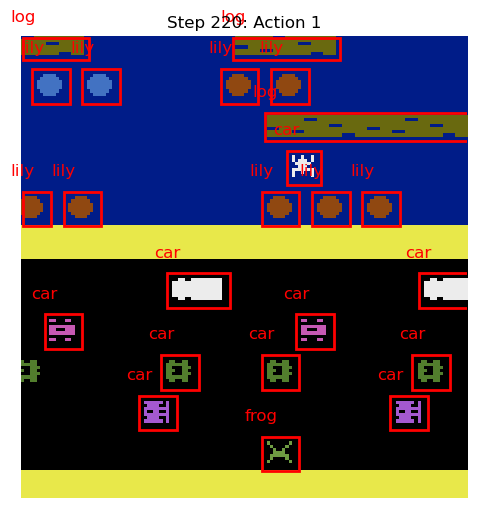

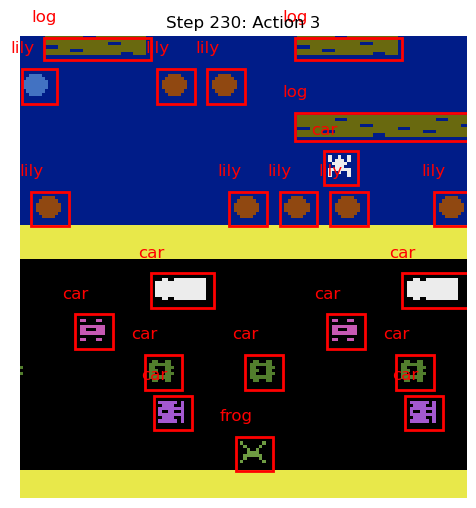

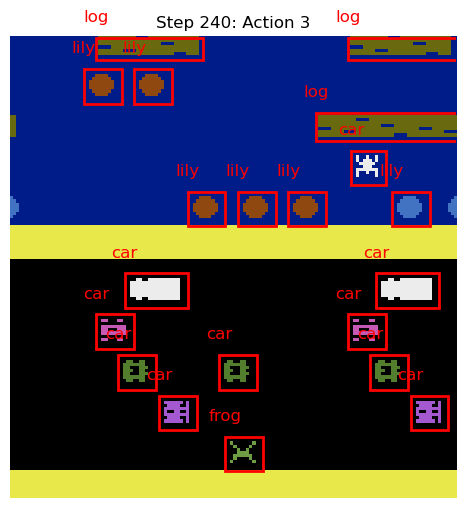

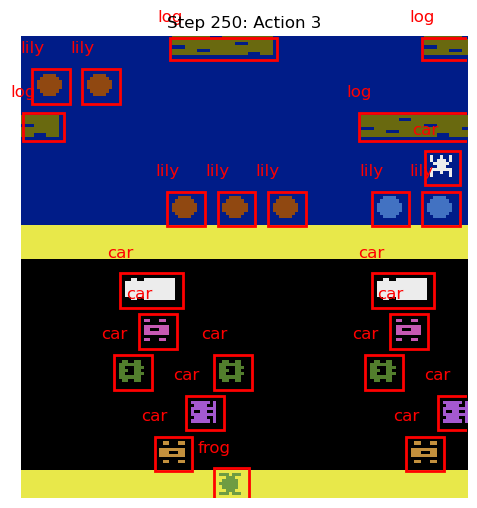

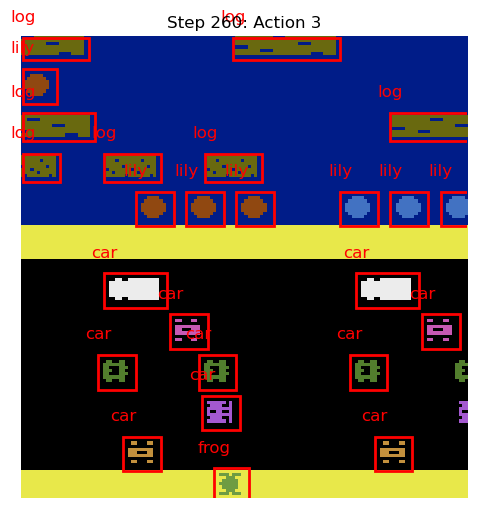

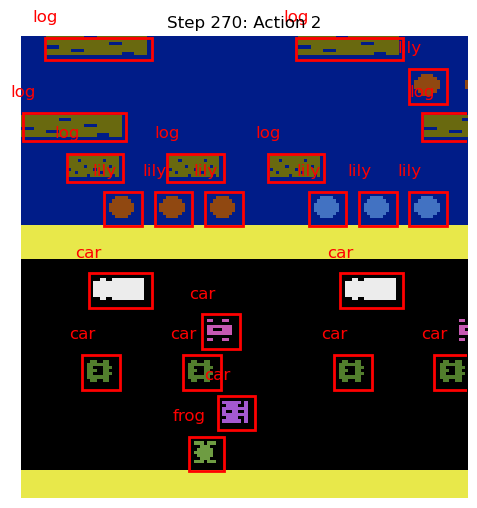

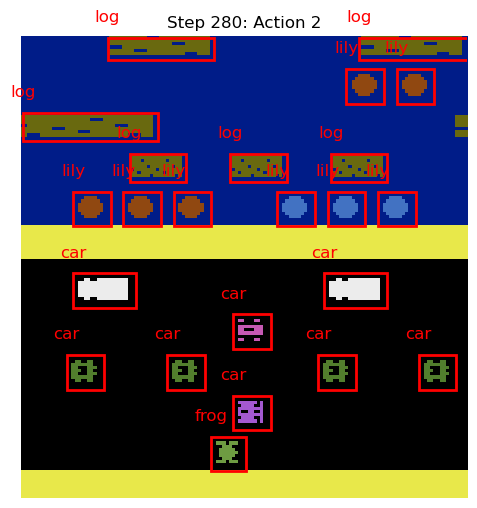

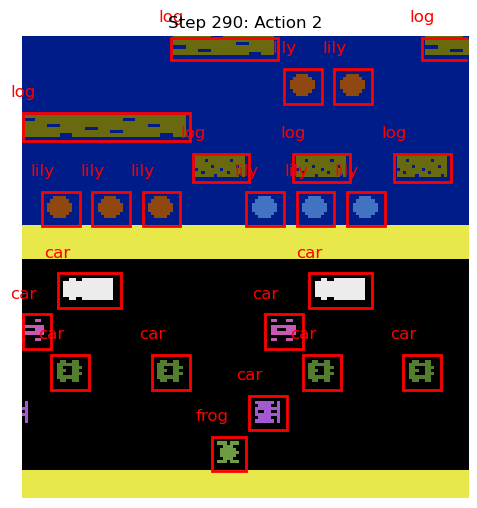

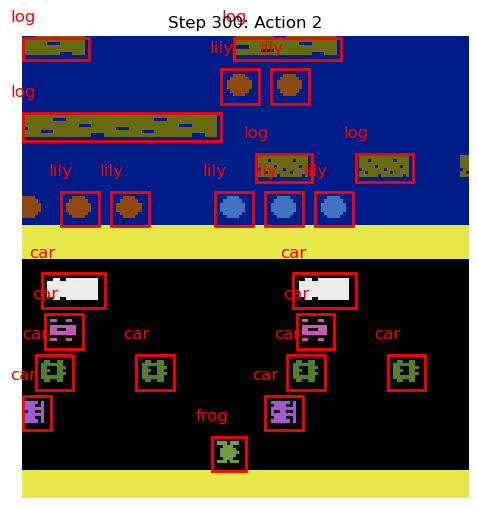

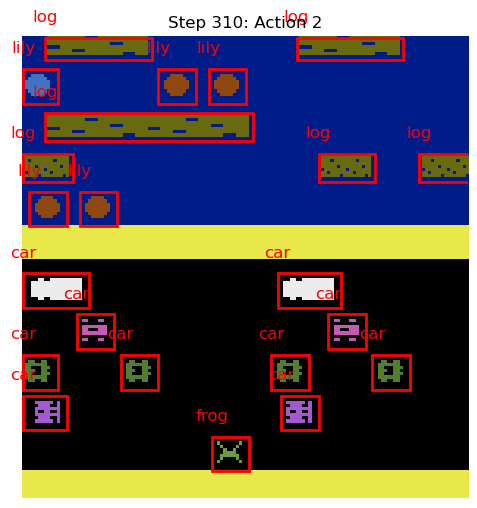

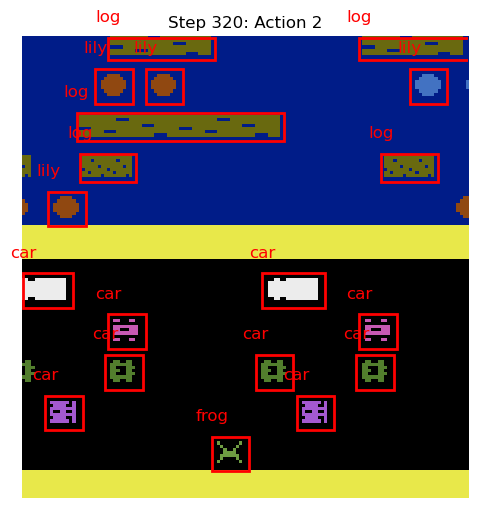

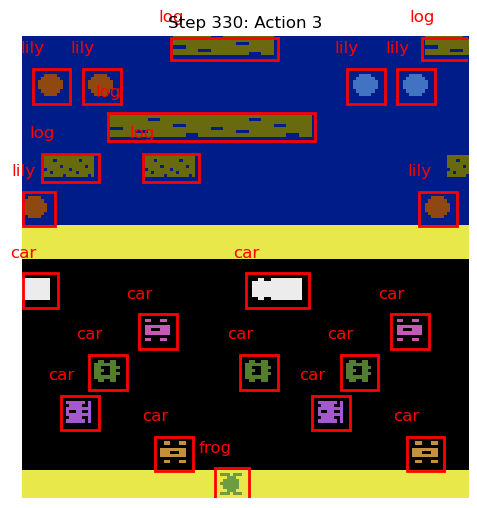

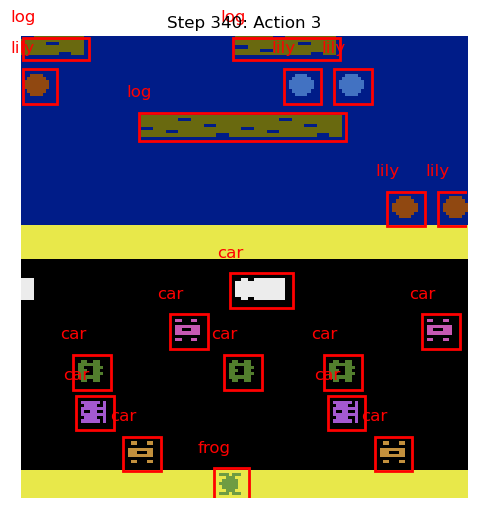

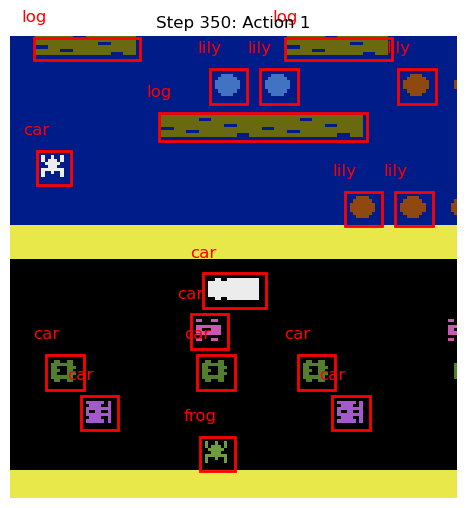

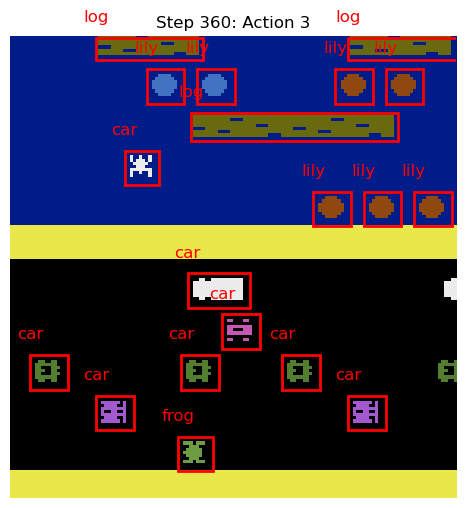

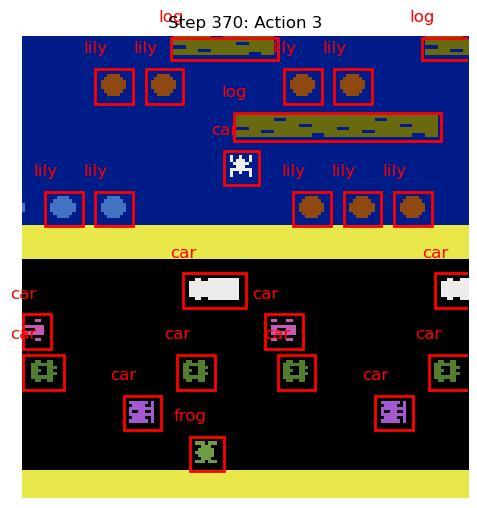

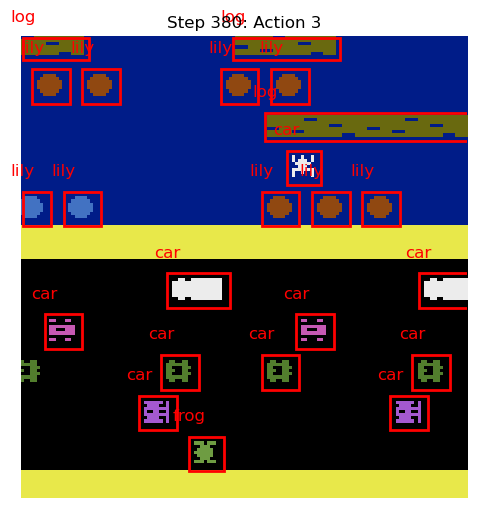

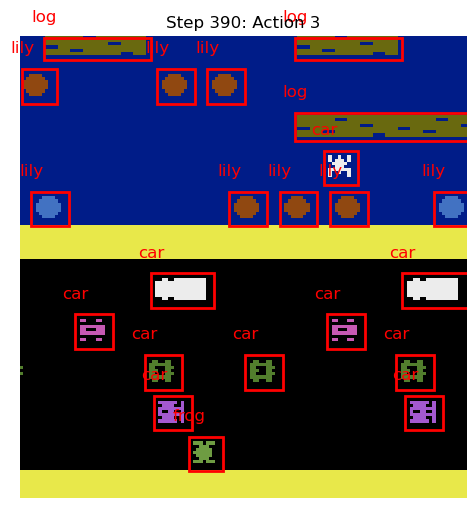

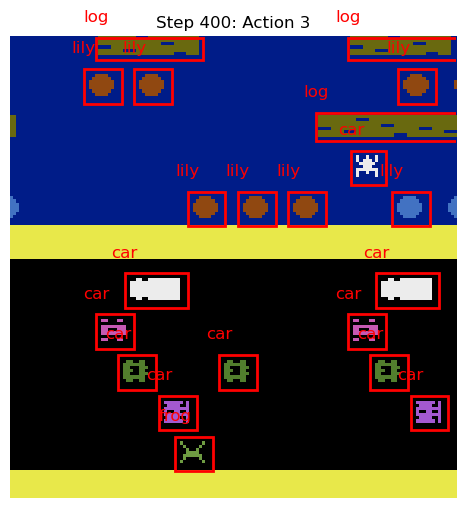

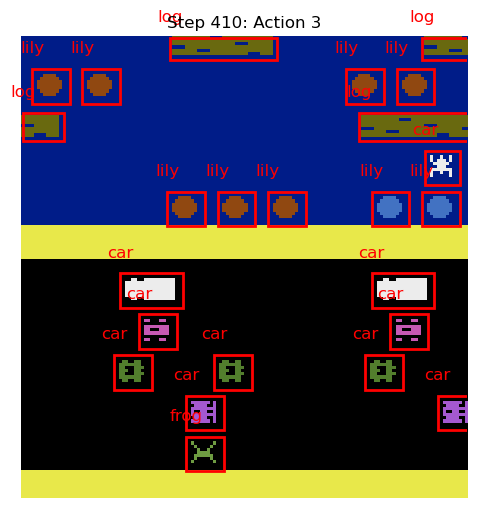

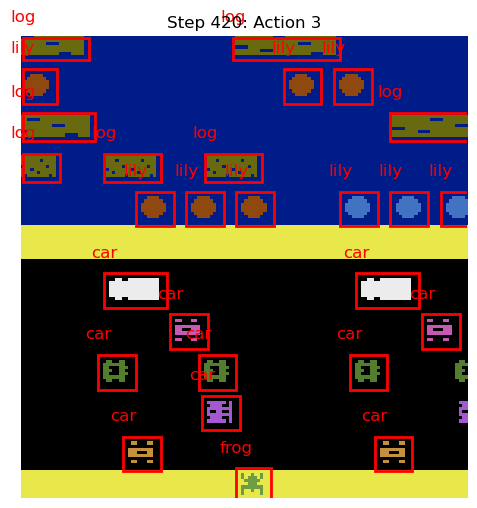

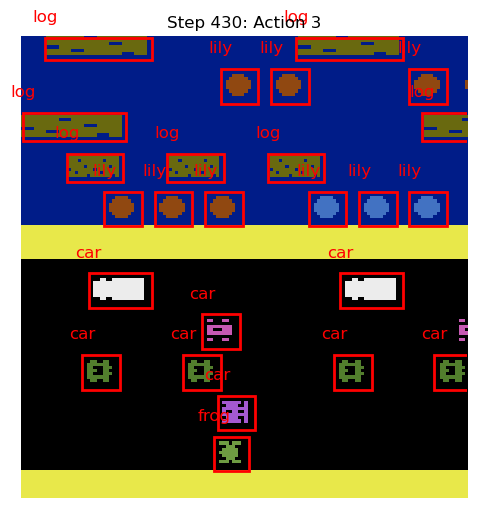

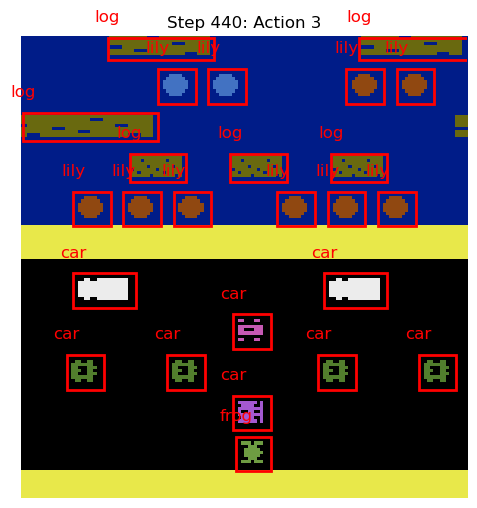

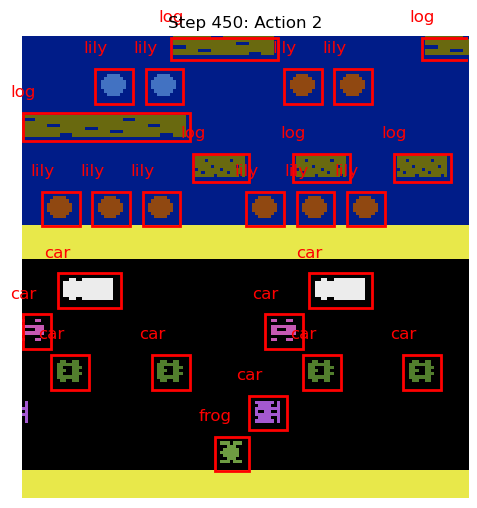

Game ended after 456 steps with reward 0.0


In [38]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()
def choose_action(detected_objects):
    # Find frog's position
    frog_pos = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_pos = (x + w/2, y + h/2)  # Center of frog
            break
    
    if frog_pos is None:
        return 0  # No action if frog not found
    
    # Simple logic: move up by default, but avoid obstacles
    for label, (x, y, w, h) in detected_objects:
        if label == "car" and abs(y - frog_pos[1]) < 20:  # Car in nearby row
            if x < frog_pos[0] and x + w > frog_pos[0] - 30:  # Car approaching from left
                return 3  # Move right
            if x > frog_pos[0] and x < frog_pos[0] + 30:  # Car approaching from right
                return 2  # Move left
    
    return 1  # Default: move up

# Main game loop
num_steps = 1000  # Run for 1000 steps
for step in range(num_steps):
    # Crop the image
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)
    
    # Detect objects
    detected_objects = detect_objects(frame, object_colors)
    
    # Choose action based on detected objects
    action = choose_action(detected_objects)
    
    # Take action in environment
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Optional: Visualize every 10 steps
    if step % 10 == 0:
        plt.figure(figsize=(10, 6))
        plt.imshow(frame)
        ax = plt.gca()
        
        # Draw bounding boxes and labels
        for label, (x, y, w, h) in detected_objects:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
        
        plt.title(f'Step {step}: Action {action}')
        plt.axis('off')
        plt.show()
    
    # Break the loop if game is over
    if terminated or truncated:
        print(f"Game ended after {step} steps with reward {reward}")
        break

env.close()

In [ ]:
def check_collision(frog_box, obj_box):
    fx, fy, fw, fh = frog_box
    ox, oy, ow, oh = obj_box
    return not (fx + fw < ox or fx > ox + ow or fy + fh < oy or fy > oy + oh)

total_reward = 0  # Track cumulative reward

for step in range(num_steps):
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)

    detected_objects = detect_objects(frame, object_colors)
    
    frog_box = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_box = (x, y, w, h)
            break
    
    action = choose_action(detected_objects)
    
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Penalty for collision
    if frog_box:
        for label, (x, y, w, h) in detected_objects:
            if label.endswith("car") and check_collision(frog_box, (x, y, w, h)):
                reward -= 5  # Apply penalty
                print(f"Collision penalty applied at step {step}")
                break
    
    total_reward += reward
    
    if step % 10 == 0:
        # Visualization code here
        pass
    
    if terminated or truncated:
        print(f"Game ended after {step} steps with total reward {total_reward}")
        break

env.close()

In [ ]:
def is_on_safe_platform(frog_box, detected_objects):
    fx, fy, fw, fh = frog_box
    for label, (x, y, w, h) in detected_objects:
        if label in ["log", "blue_lillies", "brown_lillies"]:
            if not (fx + fw < x or fx > x + w or fy + fh < y or fy > y + h):
                return True  # Frog is on a safe object
    return False  # No platform found under frog

water_line_y = (corner1[1] + corner3[1]) // 2  # Define upper half as water region

total_reward = 0

for step in range(num_steps):
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)

    detected_objects = detect_objects(frame, object_colors)
    
    frog_box = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_box = (x, y, w, h)
            break
    
    action = choose_action(detected_objects)
    
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Penalty for collision with car
    if frog_box:
        for label, (x, y, w, h) in detected_objects:
            if label.endswith("car") and check_collision(frog_box, (x, y, w, h)):
                reward -= 5  # Collision penalty
                print(f"Collision penalty at step {step}")
                break

        # Penalty for falling into water
        frog_center_y = frog_box[1] + frog_box[3] / 2
        if frog_center_y < water_line_y:
            if not is_on_safe_platform(frog_box, detected_objects):
                reward -= 10  # Water penalty
                print(f"Water penalty at step {step}")

    total_reward += reward
    
    if step % 10 == 0:
        # Visualization code here
        pass
    
    if terminated or truncated:
        print(f"Game ended after {step} steps with total reward {total_reward}")
        break

env.close()

In [ ]:
def fibonacci(n):
    fib = [0,1]

    if n <= 1:
        return fib[n]
    else:
        for i in range(2,n+1):
            fib.append(fib[i-1] + fib[i-2])
        return fib[n]
    
while True:
    n = int(input("Enter a number: "))
    if n < 0:
        print("Please enter a positive integer.")
    else:
        print(f"Fibonacci of {n} is {fibonachi(n)}")

Step 0: Action 1, Custom Reward: 0, Total: 0


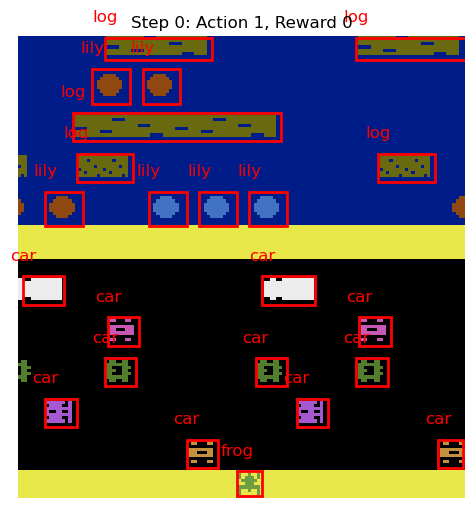

Step 10: Action 1, Custom Reward: 0, Total: 0


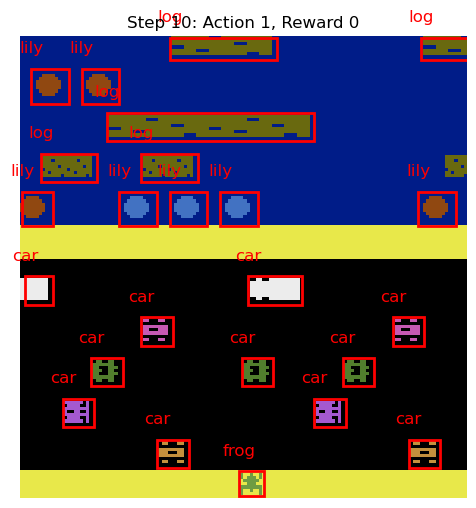

Step 20: Action 1, Custom Reward: 0, Total: 0


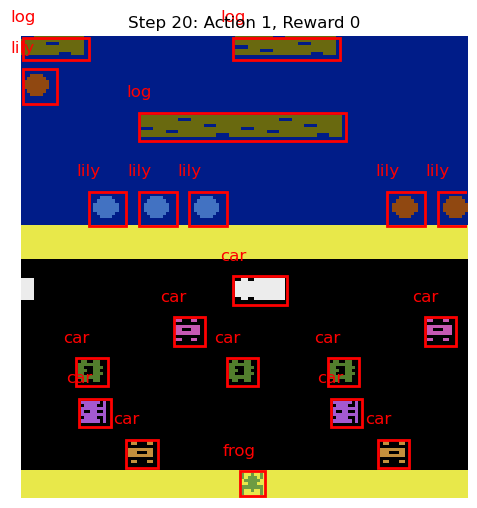

Step 30: Action 1, Custom Reward: 0, Total: 0


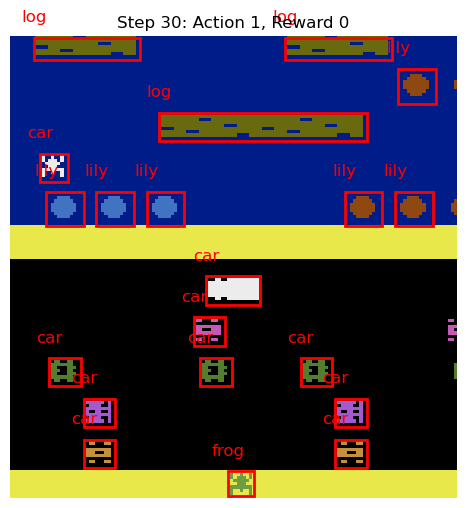

Step 40: Action 1, Custom Reward: 0, Total: 0


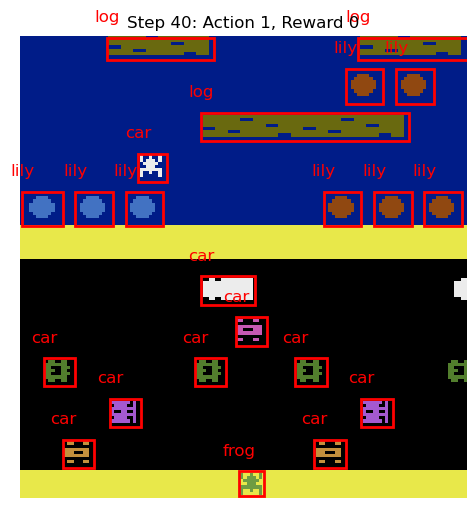

Step 50: Action 1, Custom Reward: 0, Total: 0


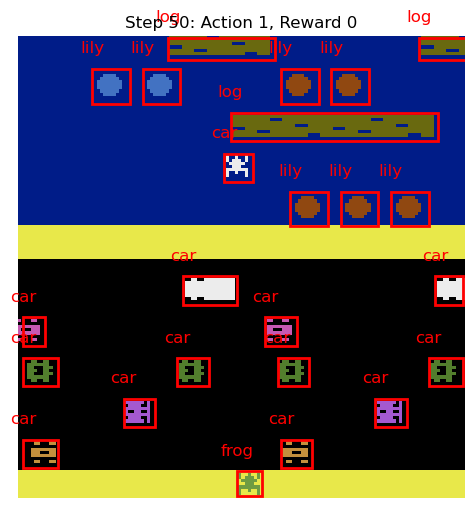

Step 60: Action 1, Custom Reward: 0, Total: 0


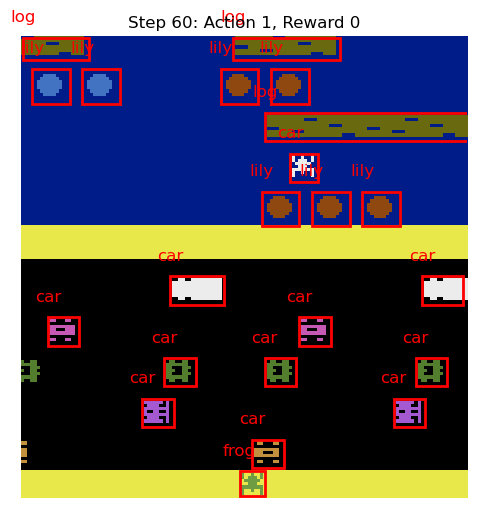

Step 70: Action 1, Custom Reward: 0, Total: 0


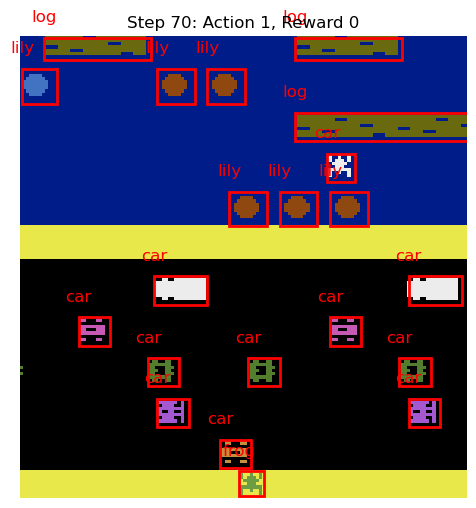

Step 80: Action 1, Custom Reward: 0, Total: 0


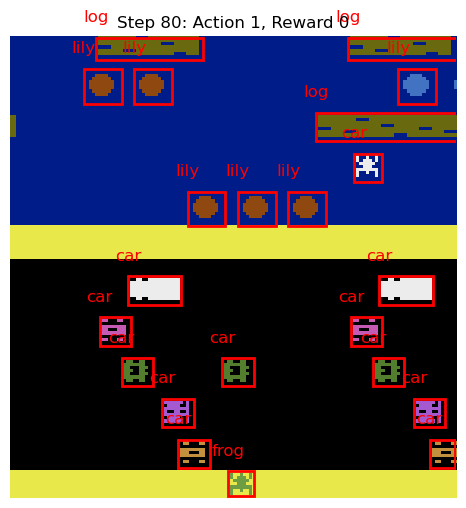

Step 90: Action 1, Custom Reward: 0, Total: 0


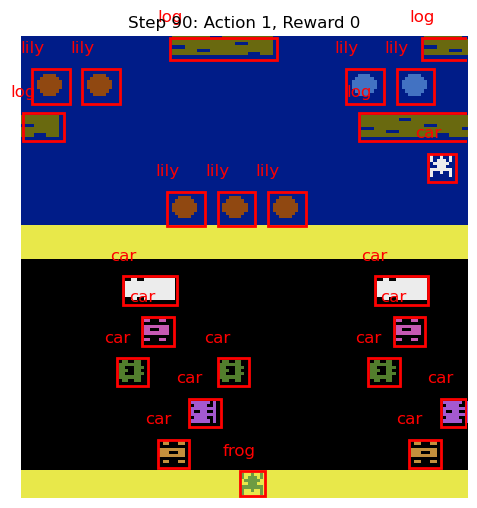

Step 100: Action 1, Custom Reward: 0, Total: 0


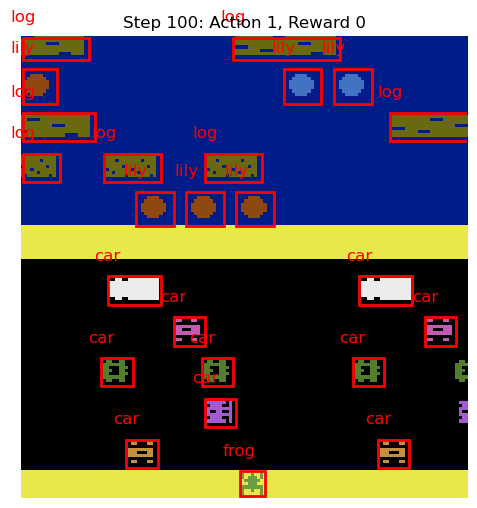

Step 110: Action 1, Custom Reward: 1, Total: 1


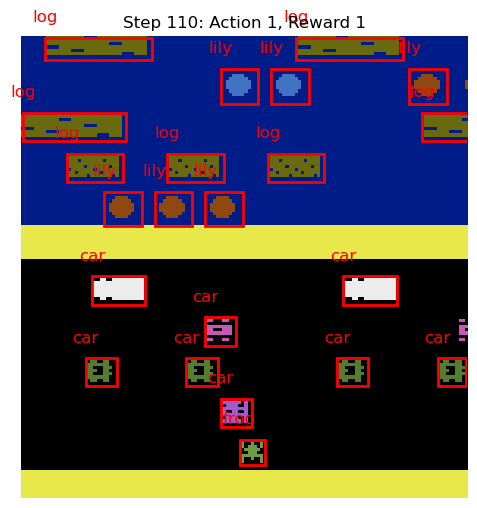

Step 120: Action 1, Custom Reward: 0, Total: 1


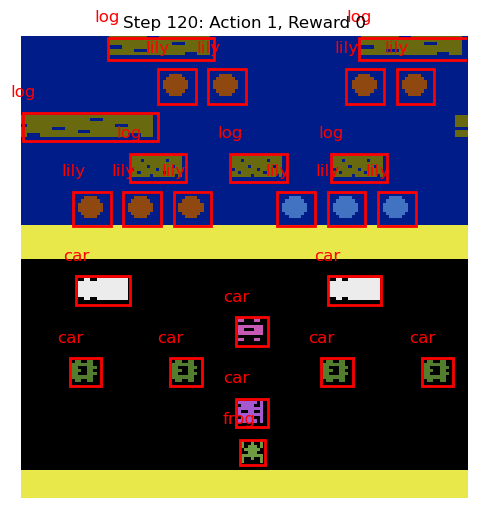

Step 130: Action 1, Custom Reward: 0, Total: 1


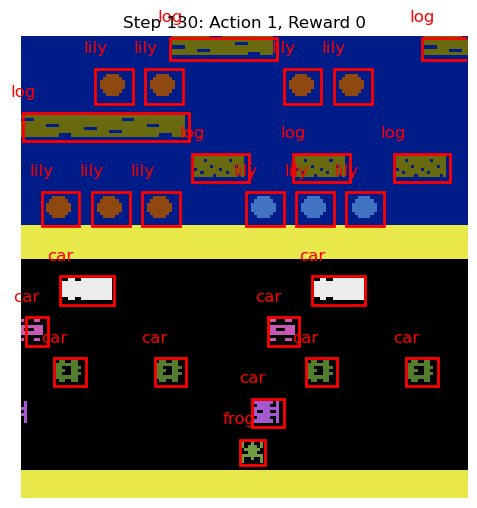

Step 140: Action 1, Custom Reward: 0, Total: 1


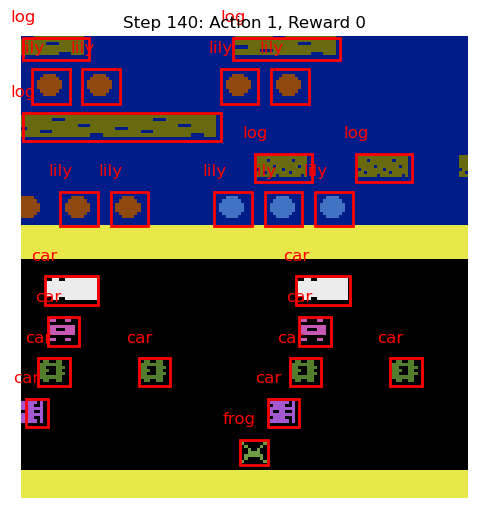

Step 150: Action 1, Custom Reward: 0, Total: 1


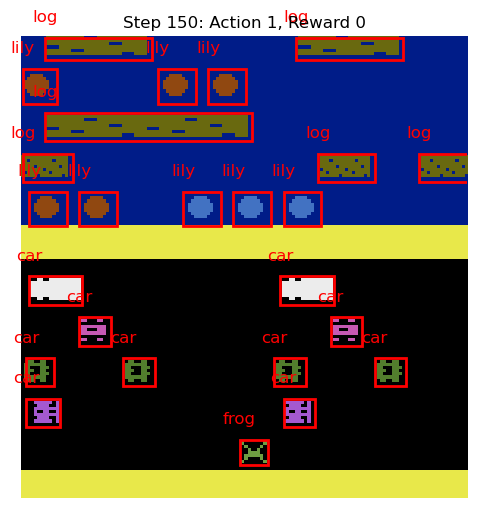

Step 160: Action 1, Custom Reward: 0, Total: 1


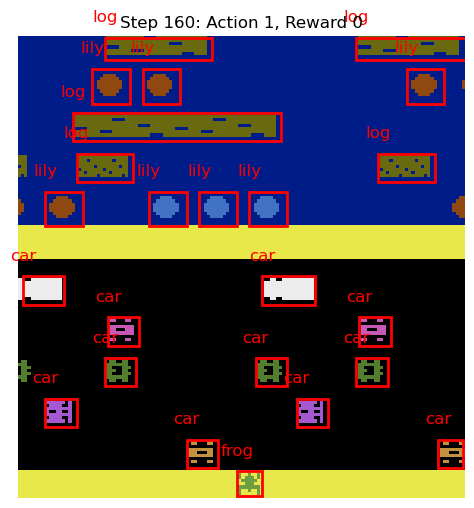

Step 170: Action 1, Custom Reward: 0, Total: 1


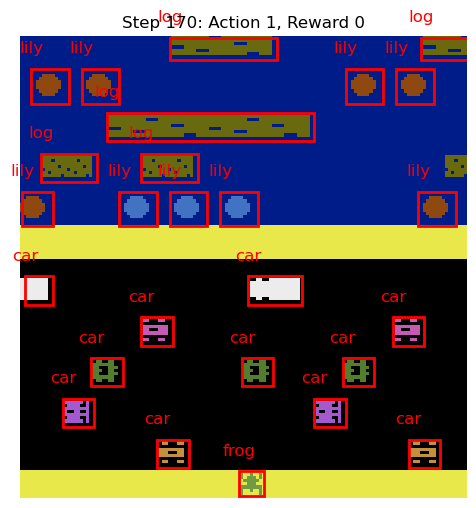

Step 180: Action 1, Custom Reward: 0, Total: 1


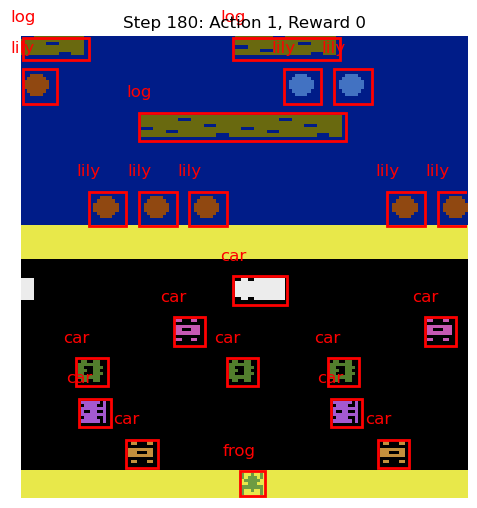

Step 190: Action 1, Custom Reward: 0, Total: 1


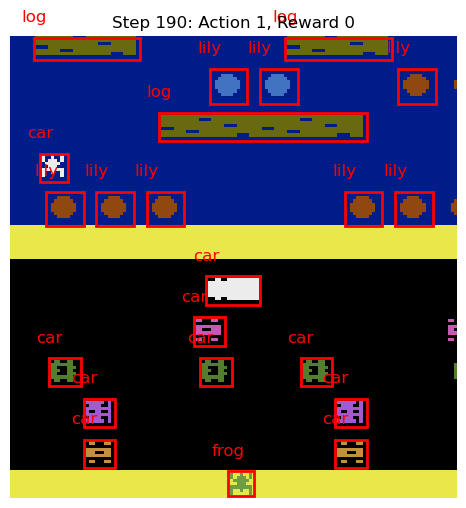

Step 200: Action 1, Custom Reward: 0, Total: 1


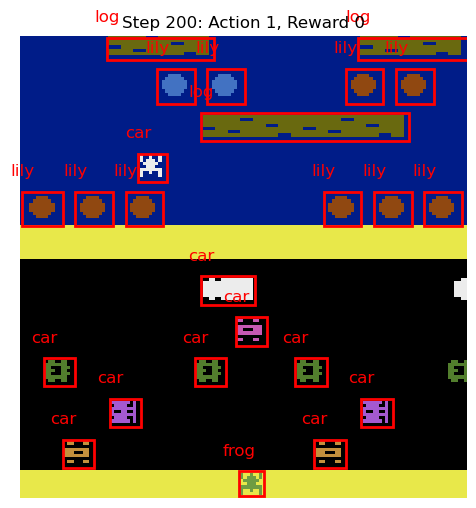

Step 210: Action 1, Custom Reward: 0, Total: 1


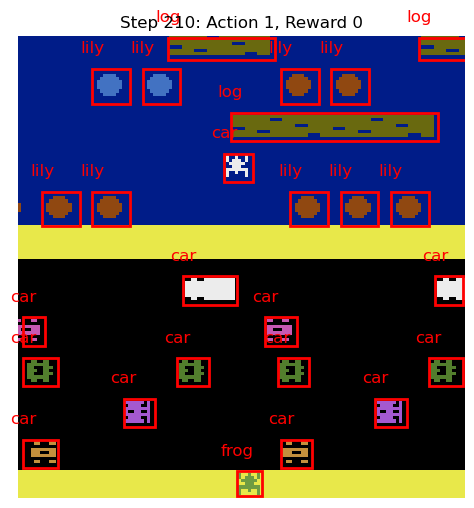

Step 220: Action 1, Custom Reward: 0, Total: 1


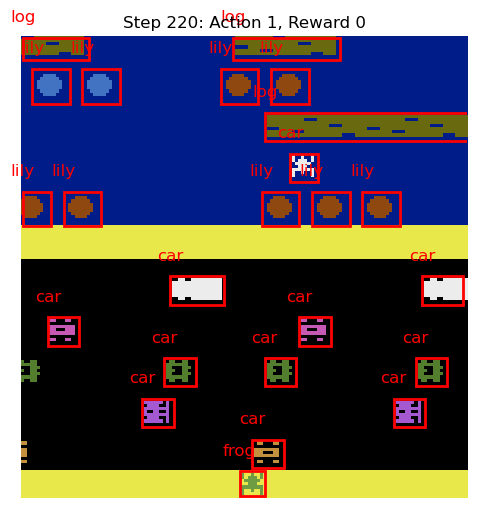

Step 230: Action 1, Custom Reward: 0, Total: 1


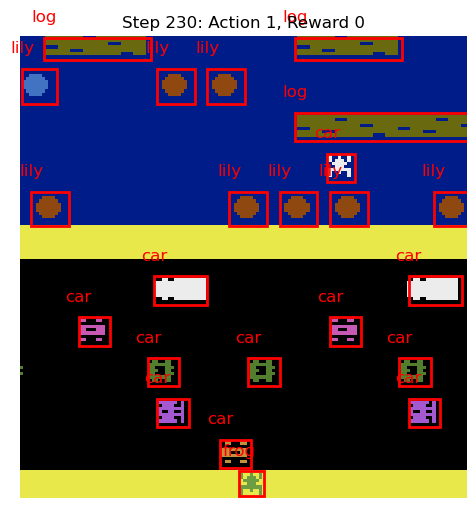

Step 240: Action 1, Custom Reward: 0, Total: 1


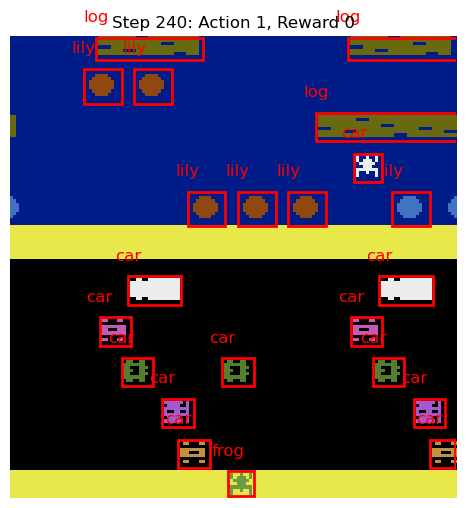

Step 250: Action 1, Custom Reward: 0, Total: 1


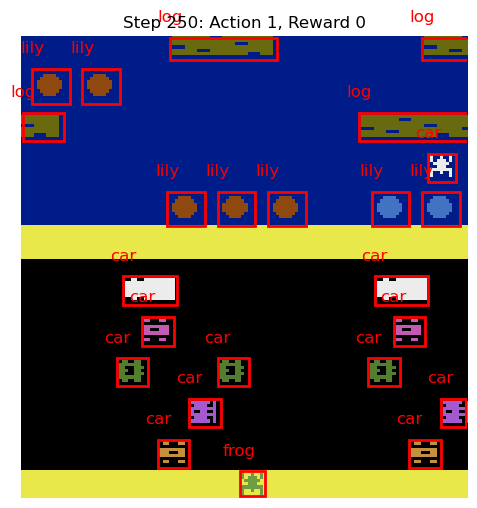

Step 260: Action 1, Custom Reward: 0, Total: 1


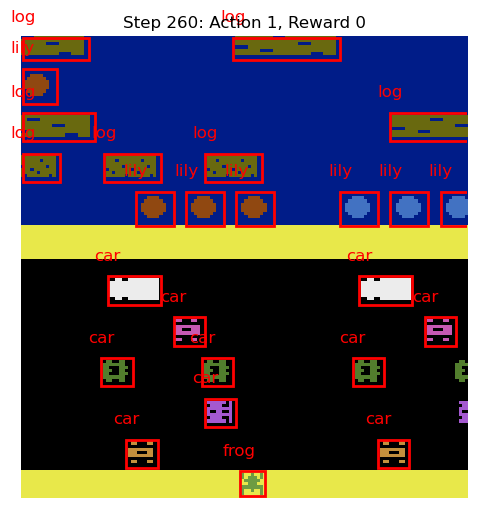

Step 270: Action 1, Custom Reward: 0, Total: 1


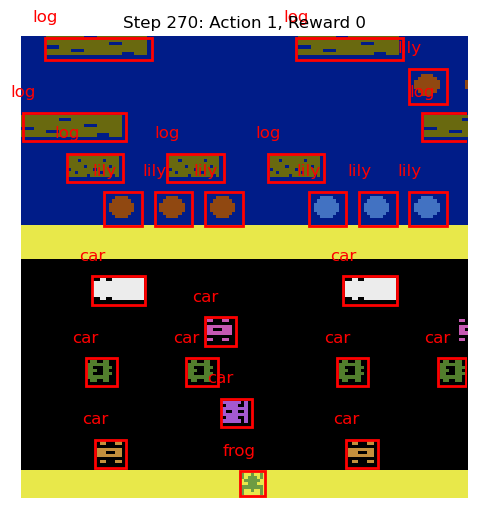

Step 280: Action 1, Custom Reward: 0, Total: 1


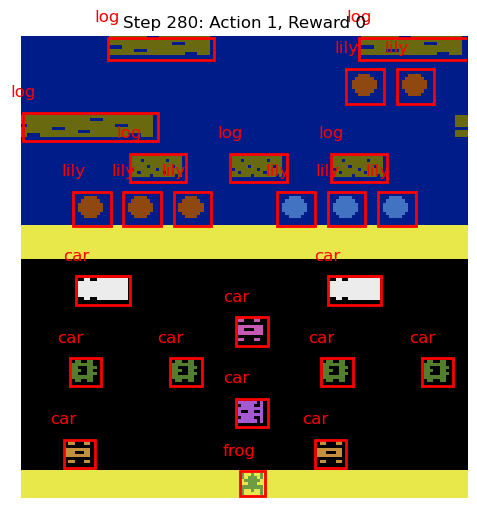

Step 290: Action 1, Custom Reward: 0, Total: 1


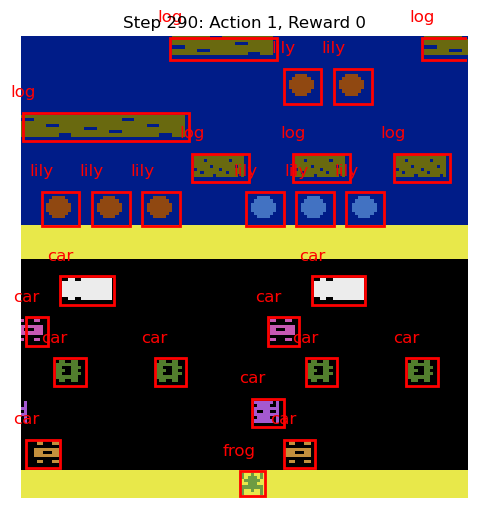

Step 300: Action 1, Custom Reward: 0, Total: 1


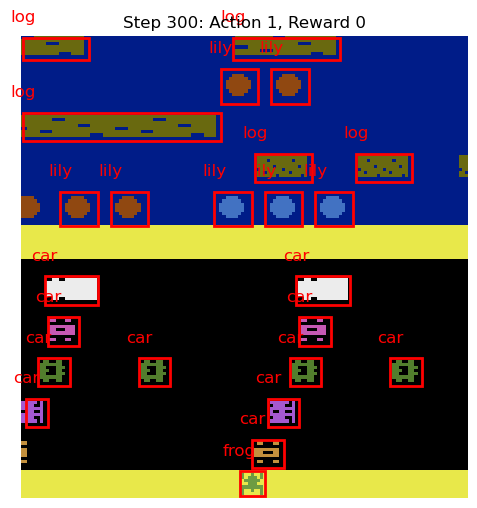

Step 310: Action 1, Custom Reward: 0, Total: 1


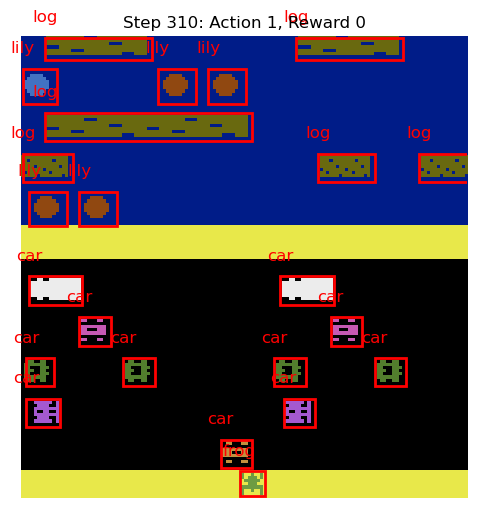

Step 320: Action 1, Custom Reward: 0, Total: 1


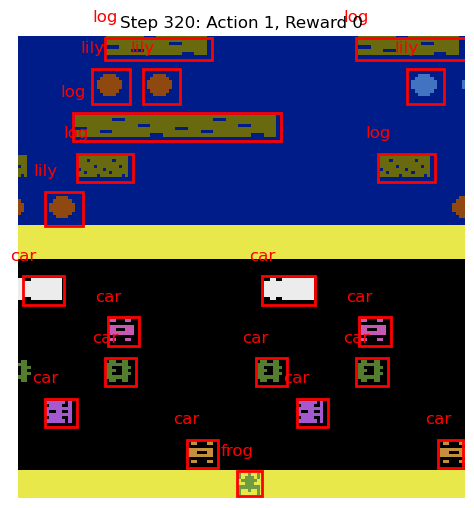

Step 330: Action 1, Custom Reward: 0, Total: 1


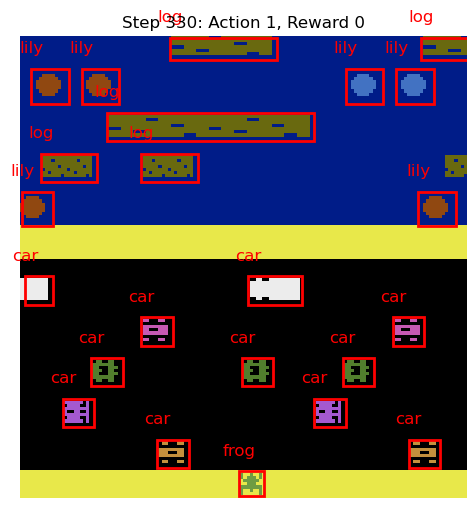

Step 340: Action 1, Custom Reward: 0, Total: 1


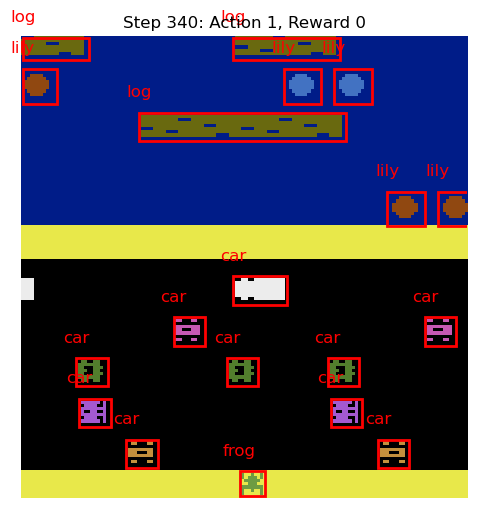

Step 350: Action 1, Custom Reward: 0, Total: 1


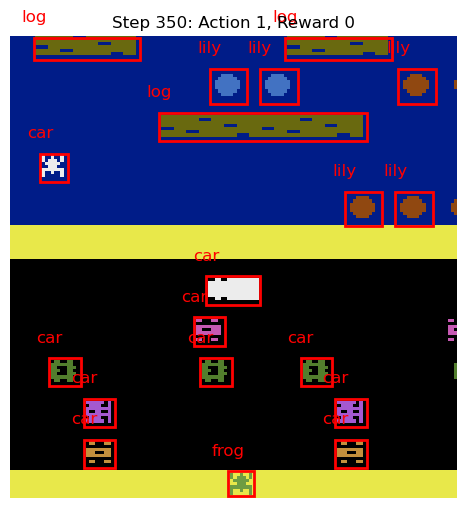

Step 360: Action 1, Custom Reward: 0, Total: 1


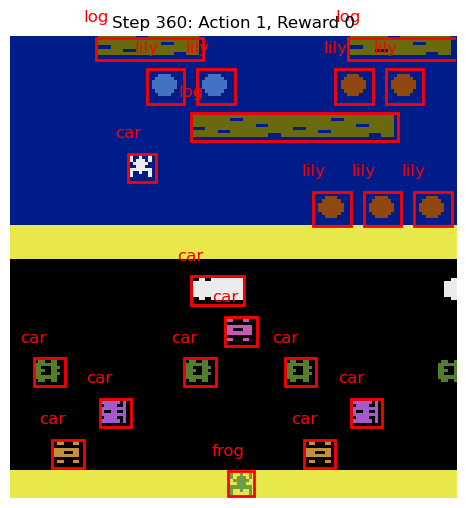

Step 370: Action 1, Custom Reward: 0, Total: 1


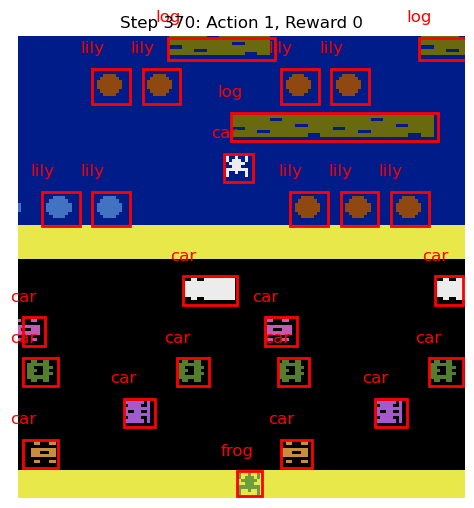

Step 380: Action 1, Custom Reward: 0, Total: 1


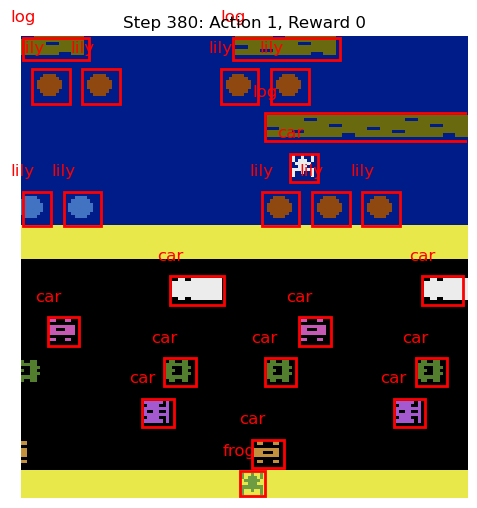

Step 390: Action 1, Custom Reward: 0, Total: 1


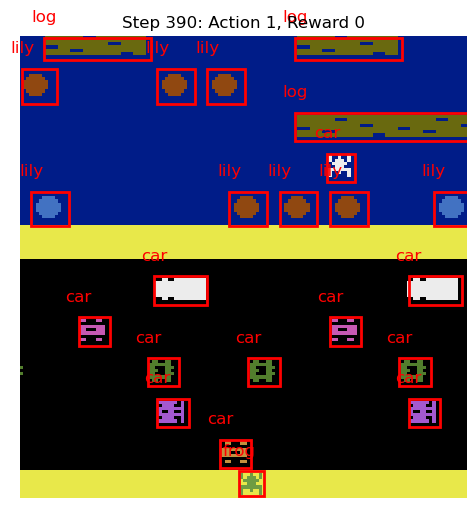

Step 400: Action 1, Custom Reward: 0, Total: 1


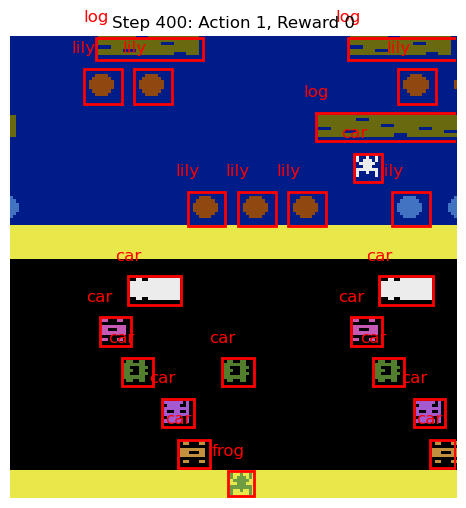

Step 410: Action 1, Custom Reward: 0, Total: 1


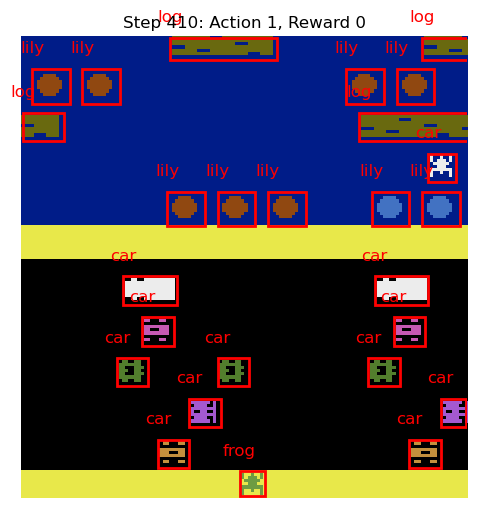

Step 420: Action 1, Custom Reward: 0, Total: 1


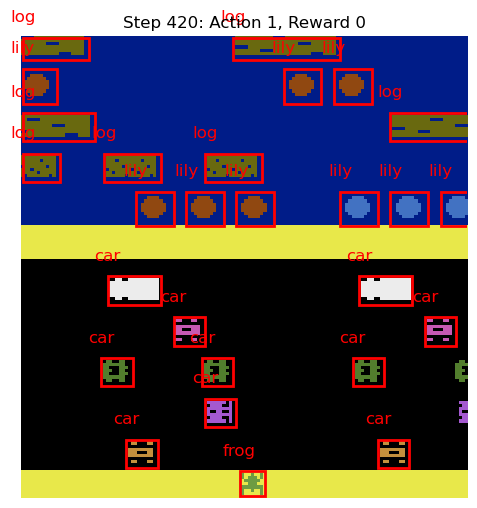

Step 430: Action 1, Custom Reward: 0, Total: 1


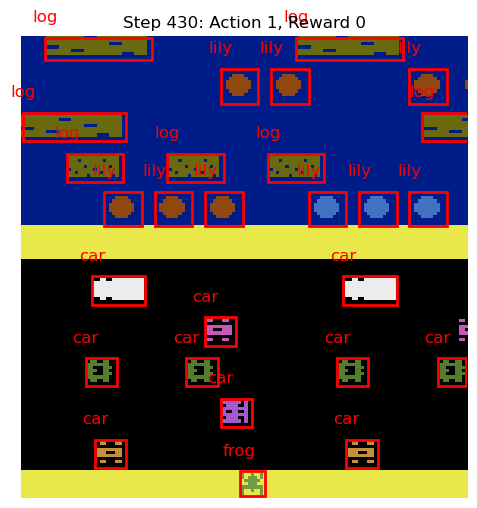

Step 440: Action 1, Custom Reward: 0, Total: 1


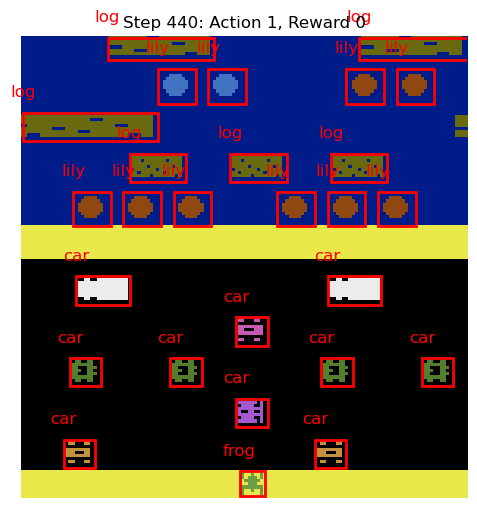

Step 450: Action 1, Custom Reward: 0, Total: 1


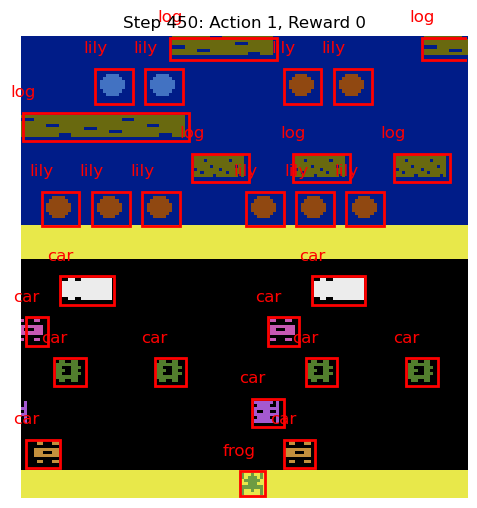

Step 460: Action 1, Custom Reward: 0, Total: 1


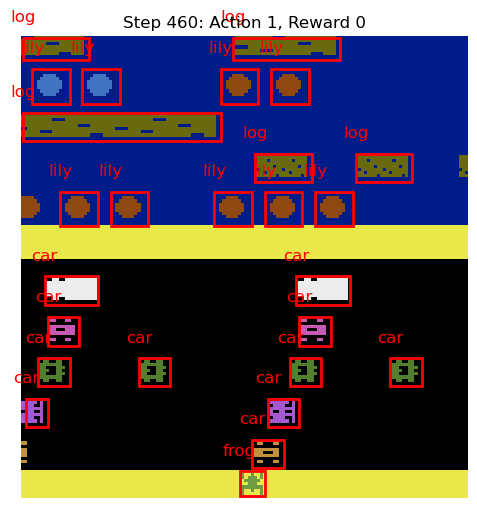

Step 470: Action 1, Custom Reward: 0, Total: 1


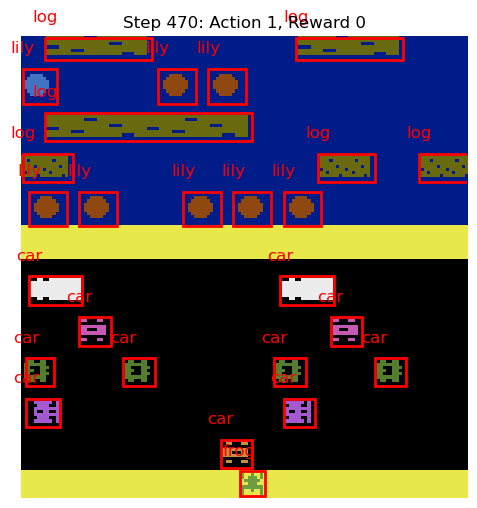

Step 480: Action 1, Custom Reward: 0, Total: 1


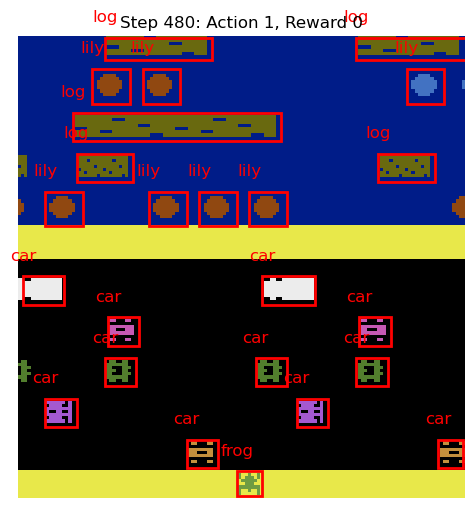

Step 490: Action 1, Custom Reward: 0, Total: 1


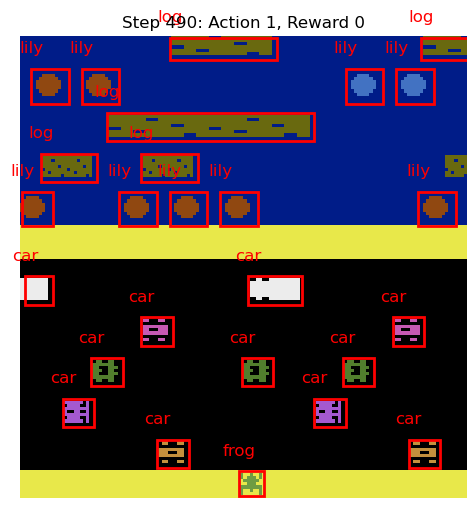

Step 500: Action 1, Custom Reward: 0, Total: 1


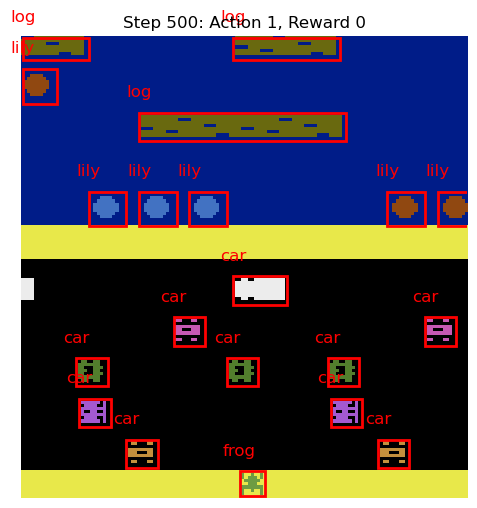

Step 510: Action 1, Custom Reward: 0, Total: 1


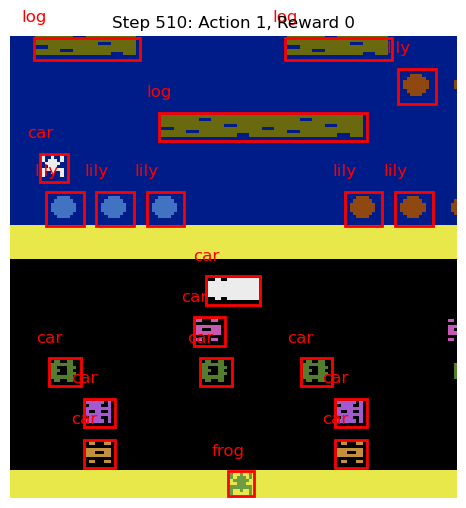

Step 520: Action 1, Custom Reward: 0, Total: 1


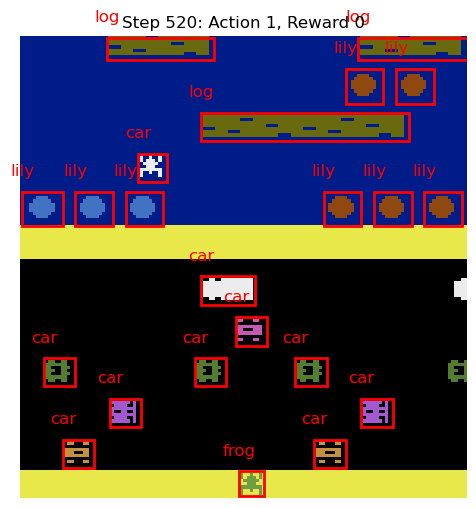

Step 530: Action 1, Custom Reward: 0, Total: 1


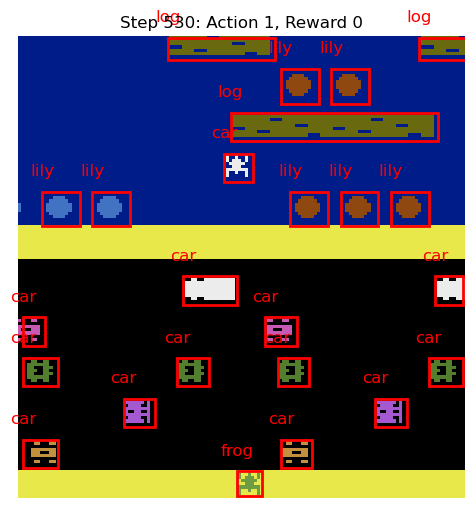

Step 540: Action 1, Custom Reward: 0, Total: 1


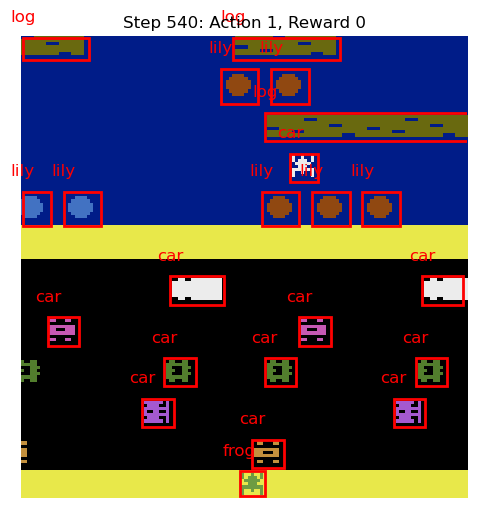

Step 550: Action 1, Custom Reward: 0, Total: 1


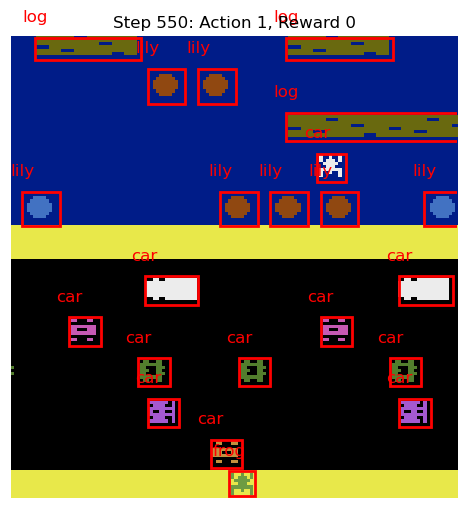

Step 560: Action 1, Custom Reward: 0, Total: 1


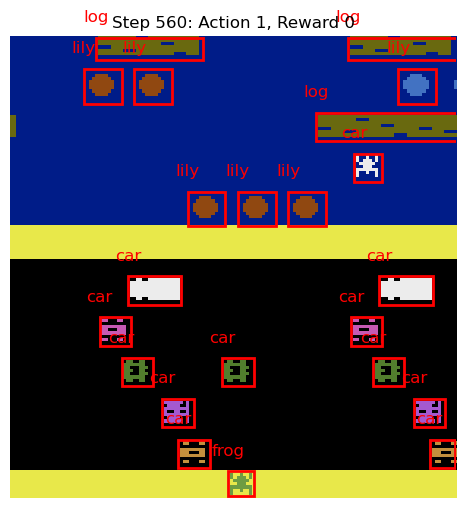

Step 570: Action 1, Custom Reward: 0, Total: 1


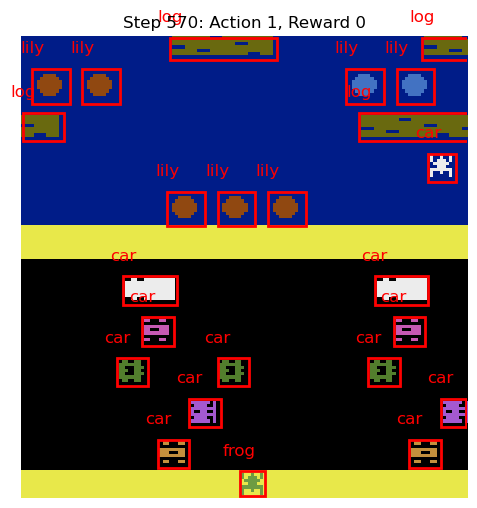

Step 580: Action 1, Custom Reward: 0, Total: 1


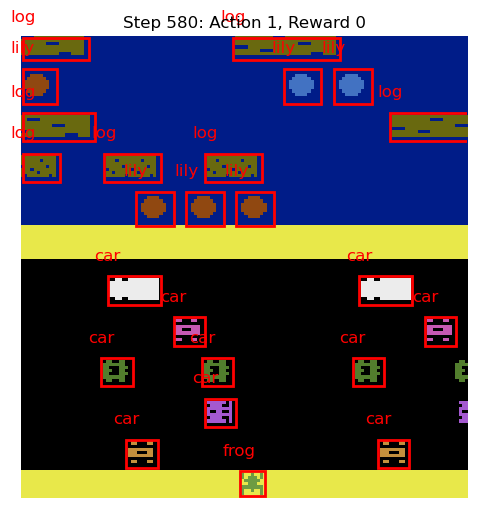

Step 590: Action 1, Custom Reward: 0, Total: 1


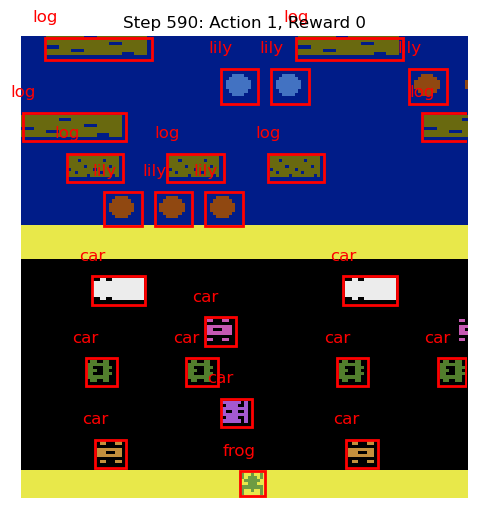

Step 600: Action 1, Custom Reward: 0, Total: 1


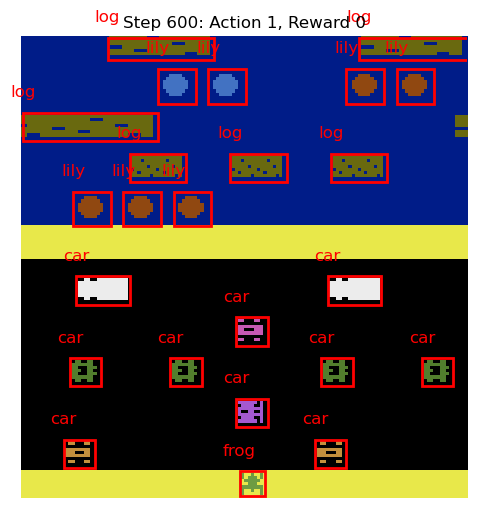

Step 610: Action 1, Custom Reward: 0, Total: 1


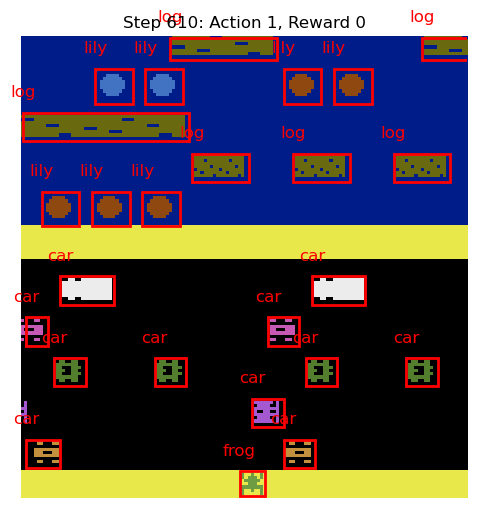

Step 620: Action 1, Custom Reward: 0, Total: 1


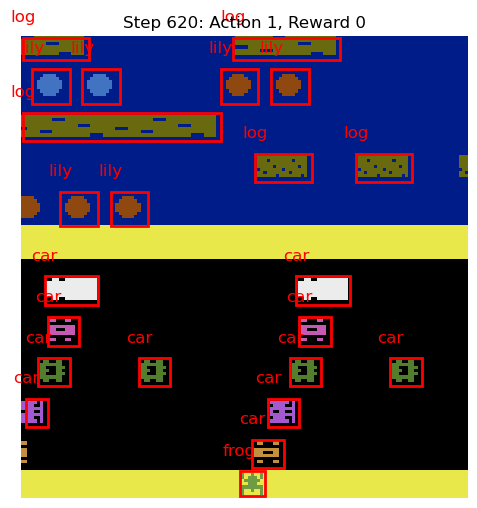

Step 630: Action 1, Custom Reward: 0, Total: 1


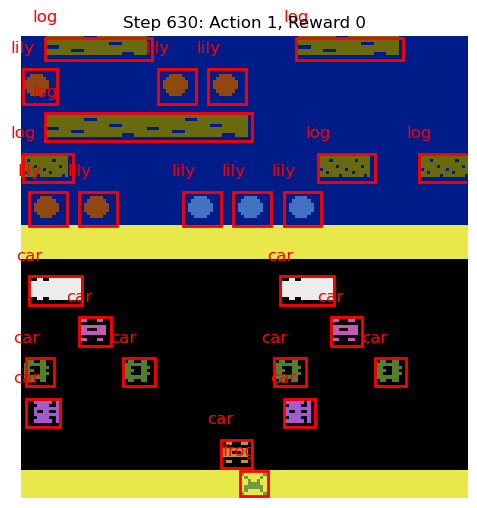

Step 640: Action 1, Custom Reward: 0, Total: 1


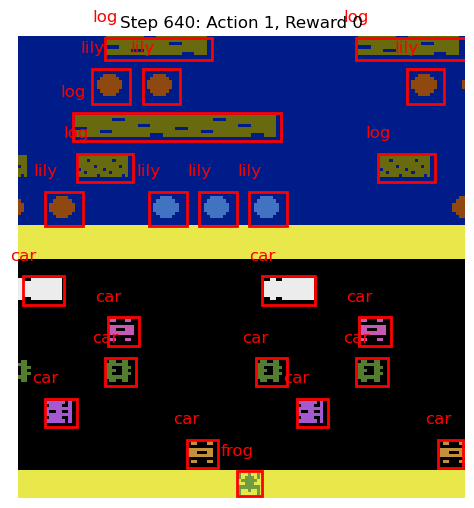

Step 650: Action 1, Custom Reward: 0, Total: 1


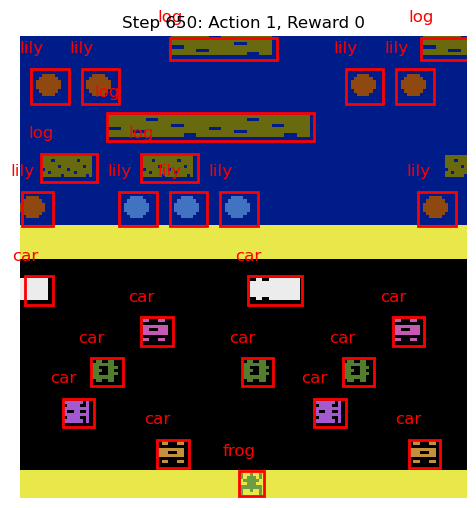

Step 660: Action 1, Custom Reward: 0, Total: 1


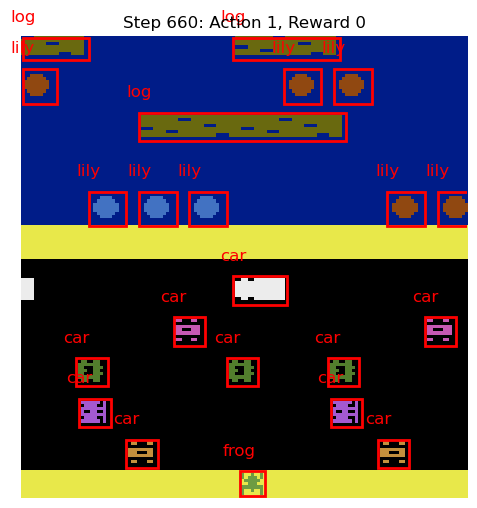

Step 670: Action 1, Custom Reward: 0, Total: 1


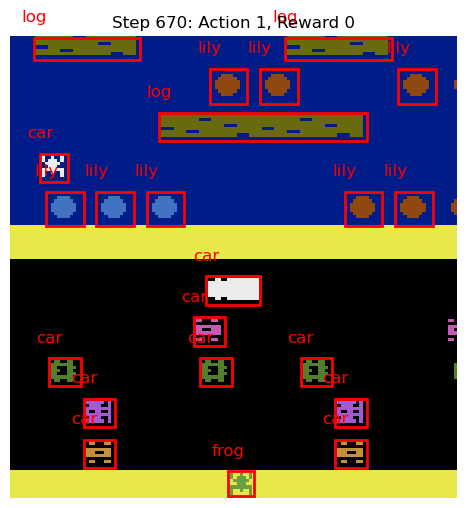

Step 680: Action 1, Custom Reward: 0, Total: 1


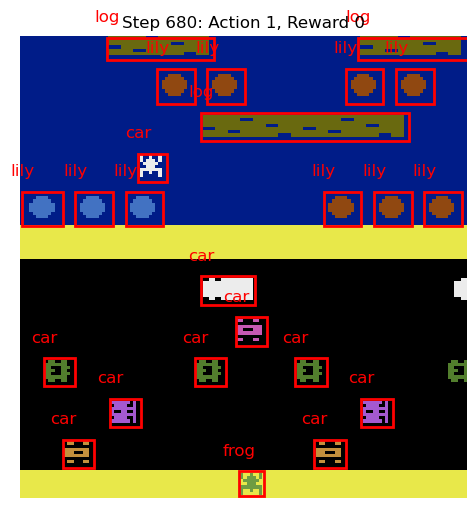

Step 690: Action 1, Custom Reward: 0, Total: 1


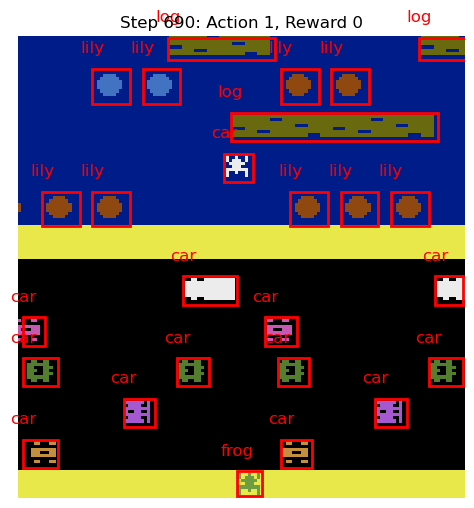

Step 700: Action 1, Custom Reward: 0, Total: 1


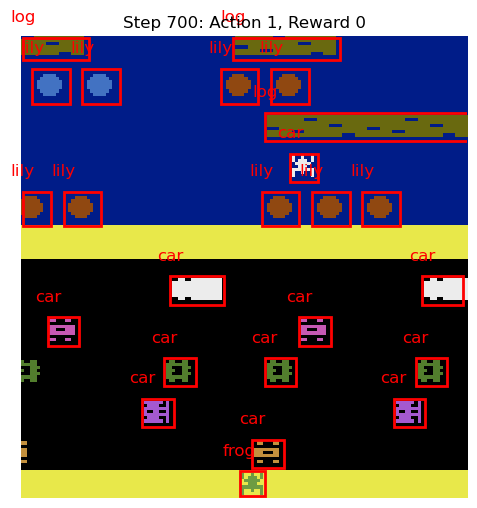

Step 710: Action 1, Custom Reward: 0, Total: 1


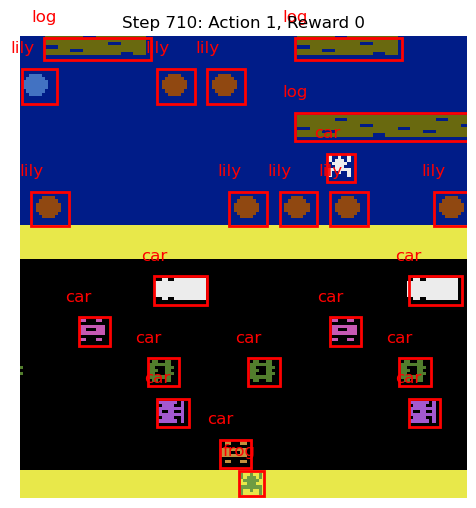

Step 720: Action 1, Custom Reward: 0, Total: 1


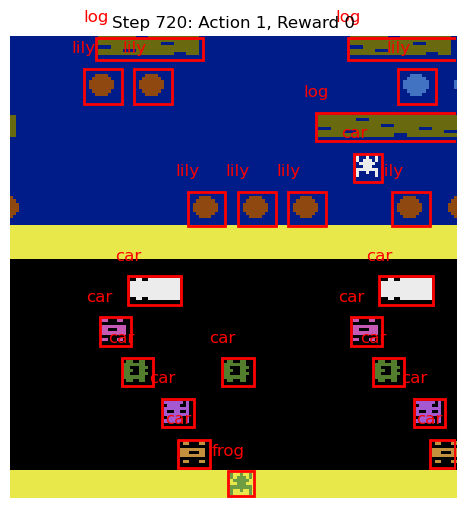

Step 730: Action 1, Custom Reward: 0, Total: 1


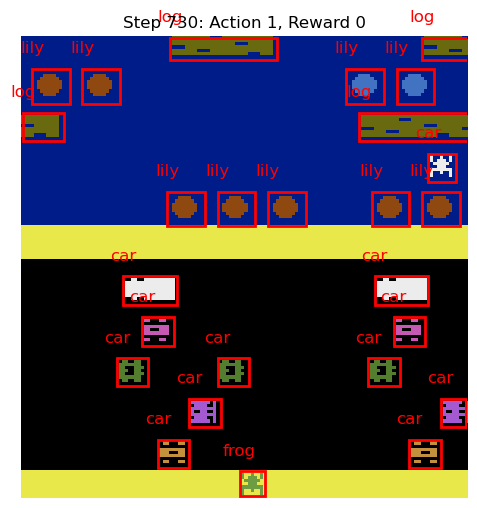

Step 740: Action 1, Custom Reward: 0, Total: 1


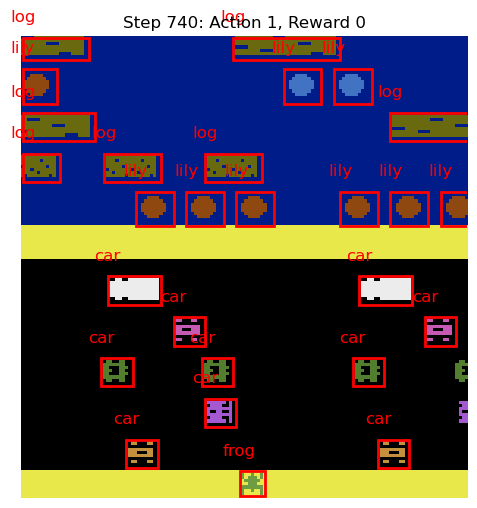

Step 750: Action 1, Custom Reward: 0, Total: 1


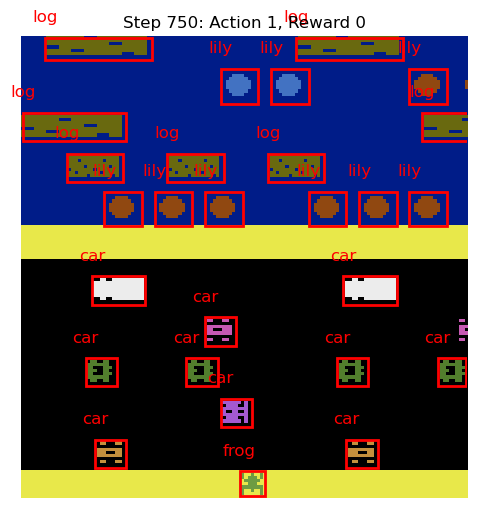

Step 760: Action 1, Custom Reward: 0, Total: 1


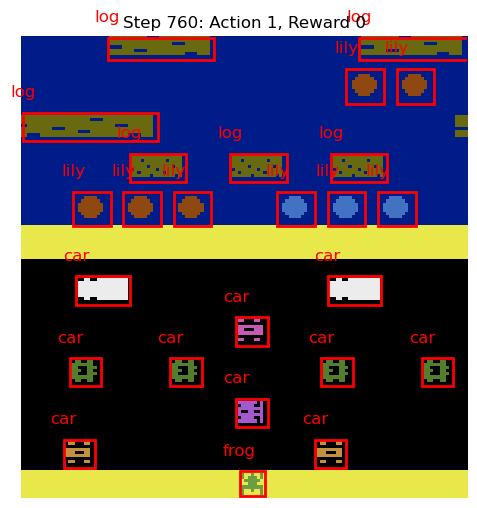

Step 770: Action 1, Custom Reward: 0, Total: 1


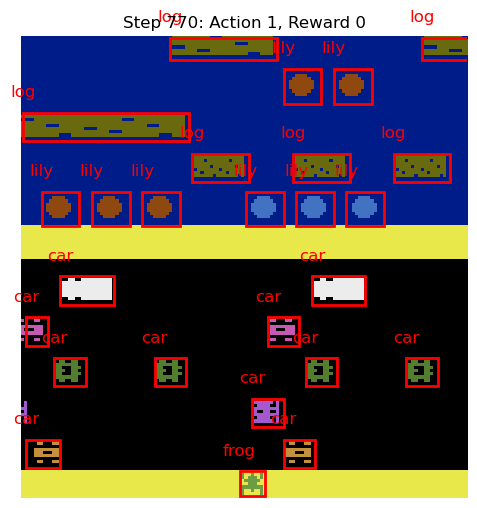

Step 780: Action 1, Custom Reward: 0, Total: 1


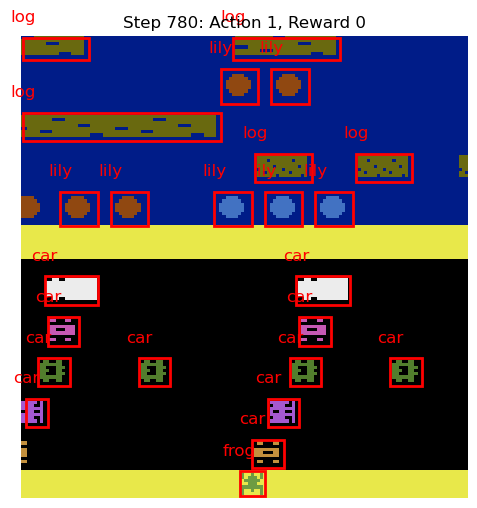

Step 790: Action 1, Custom Reward: 0, Total: 1


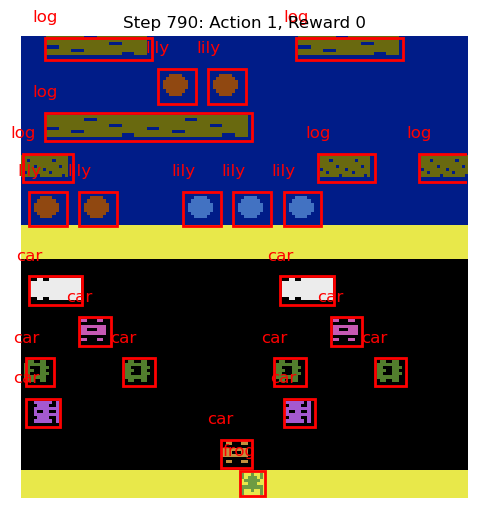

Step 800: Action 1, Custom Reward: 0, Total: 1


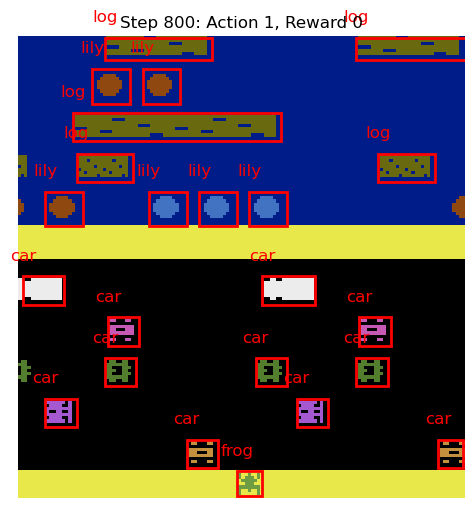

Step 810: Action 1, Custom Reward: 0, Total: 1


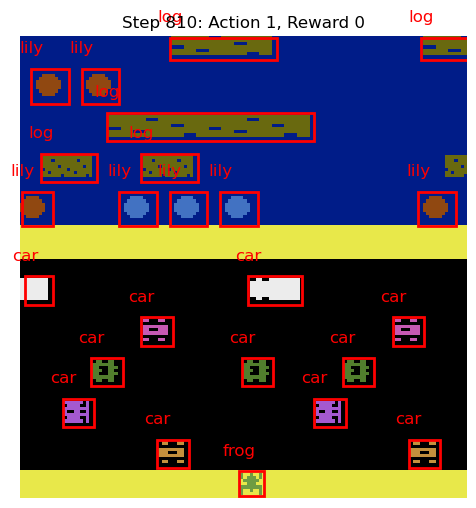

Step 820: Action 1, Custom Reward: 0, Total: 1


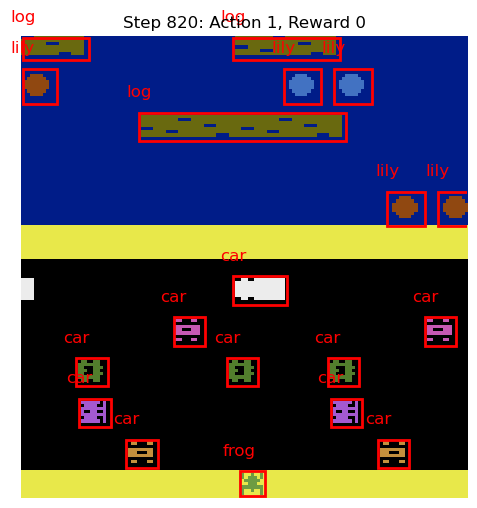

Step 830: Action 1, Custom Reward: 0, Total: 1


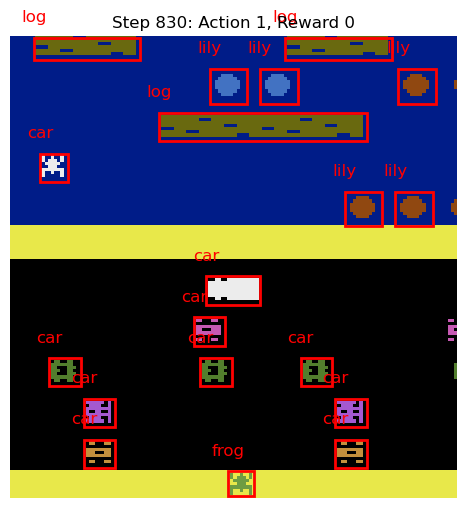

Step 840: Action 1, Custom Reward: 0, Total: 1


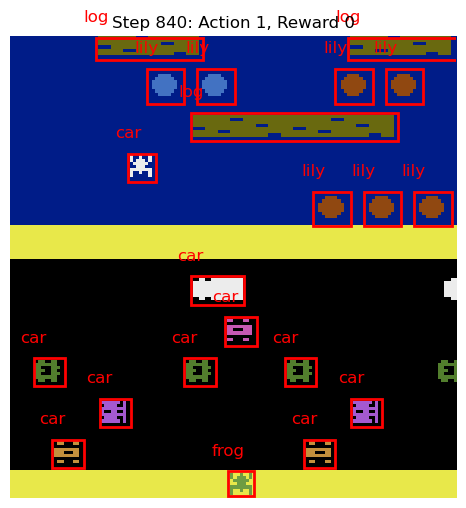

Step 850: Action 1, Custom Reward: 0, Total: 1


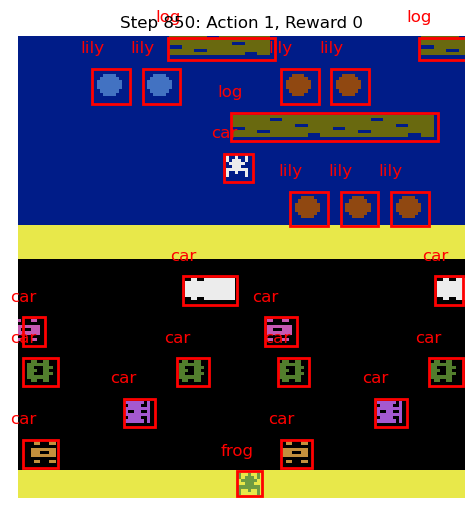

Step 860: Action 1, Custom Reward: 0, Total: 1


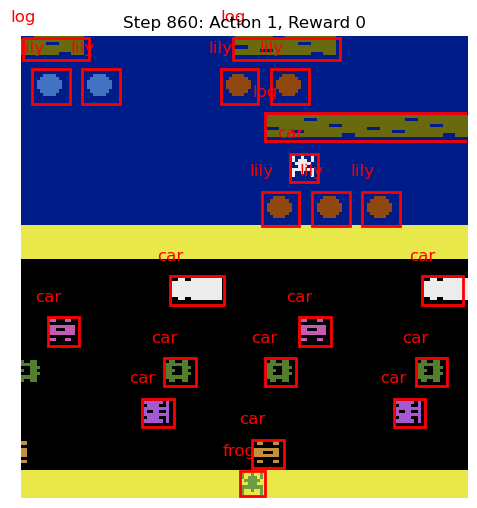

Step 870: Action 1, Custom Reward: 0, Total: 1


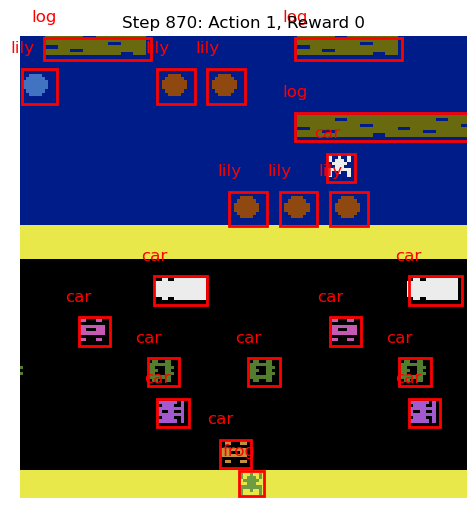

Step 880: Action 1, Custom Reward: 0, Total: 1


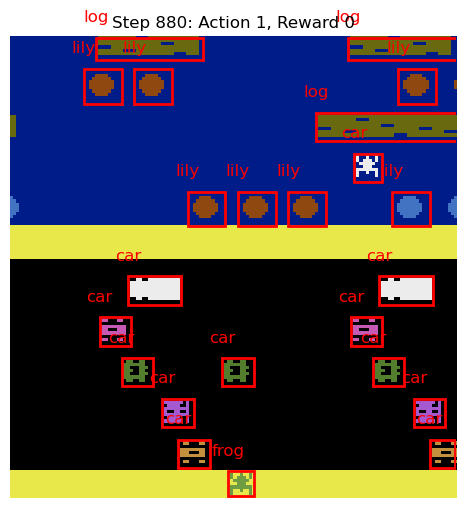

Step 890: Action 1, Custom Reward: 0, Total: 1


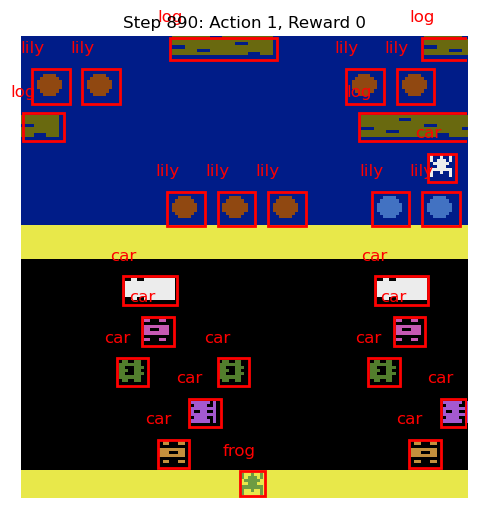

Step 900: Action 1, Custom Reward: 0, Total: 1


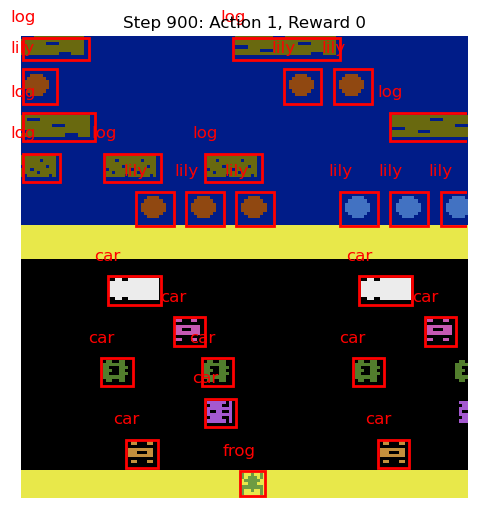

Step 910: Action 1, Custom Reward: 0, Total: 1


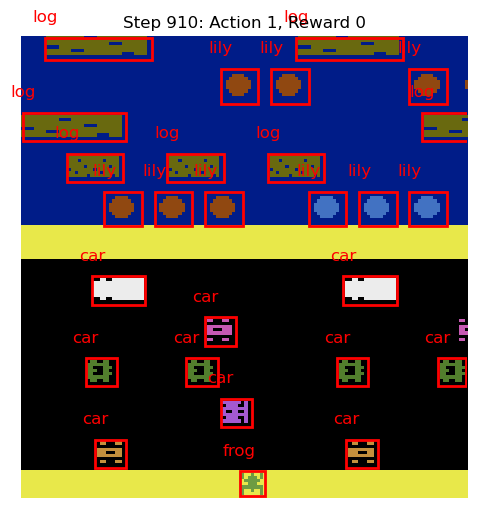

Step 920: Action 1, Custom Reward: 0, Total: 1


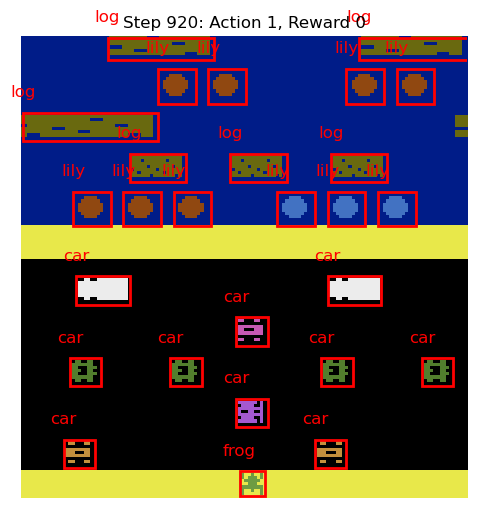

Step 930: Action 1, Custom Reward: 0, Total: 1


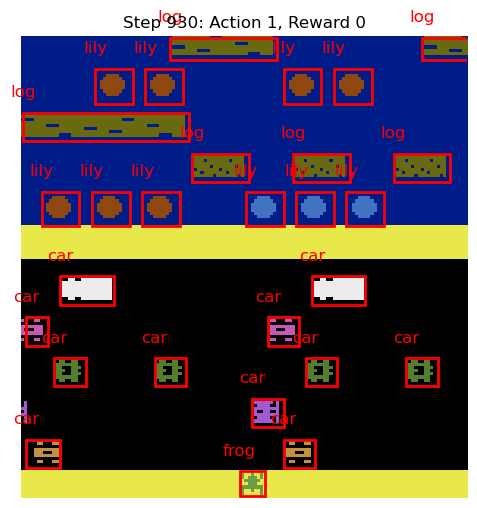

Step 940: Action 1, Custom Reward: 0, Total: 1


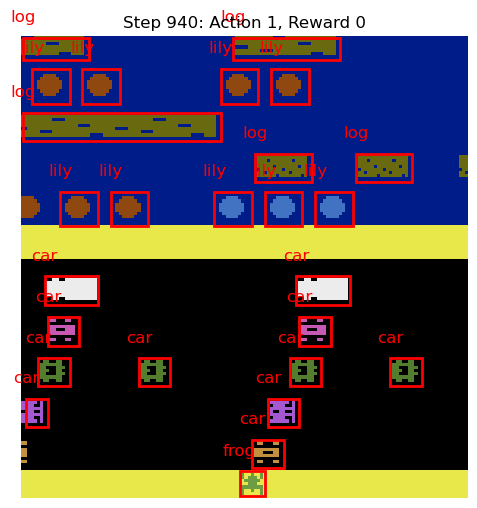

Step 950: Action 1, Custom Reward: 0, Total: 1


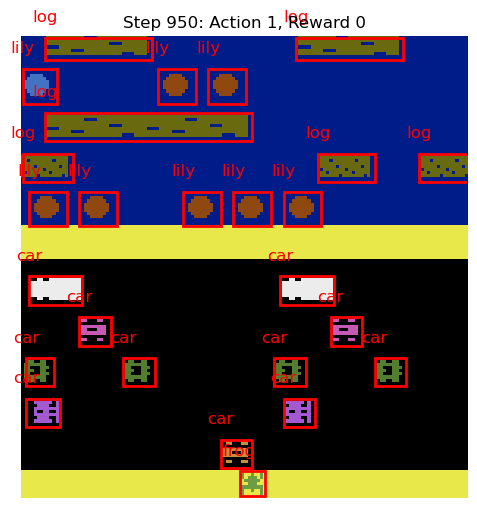

Step 960: Action 1, Custom Reward: 0, Total: 1


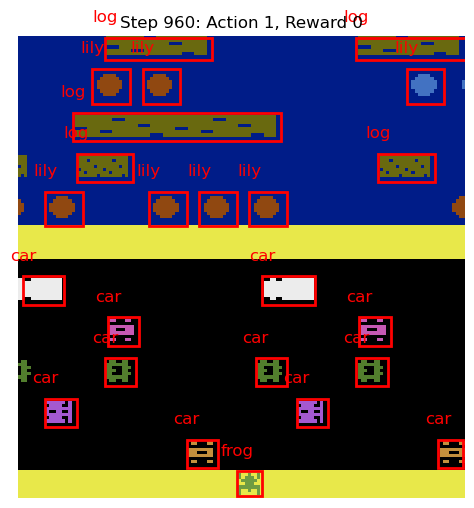

Step 970: Action 1, Custom Reward: 0, Total: 1


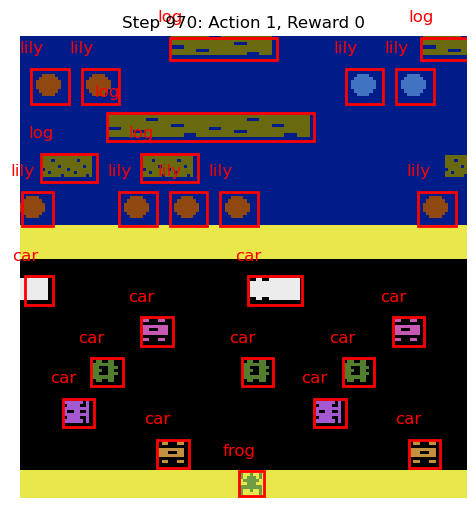

Step 980: Action 1, Custom Reward: 0, Total: 1


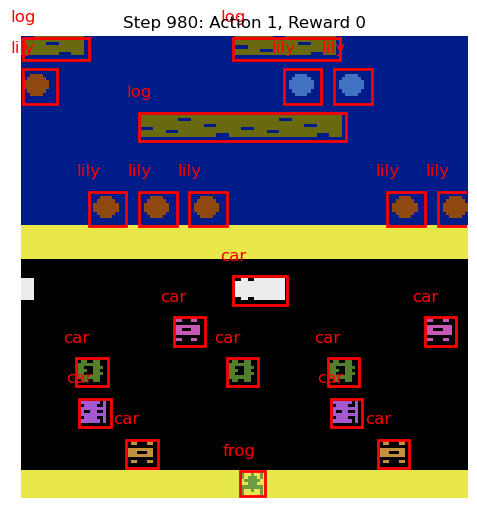

Step 990: Action 1, Custom Reward: 0, Total: 1


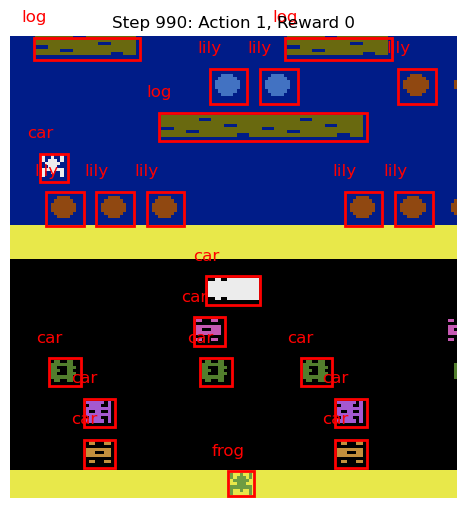

In [48]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def choose_action(detected_objects):
    # Find frog's position
    frog_pos = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_pos = (x + w/2, y + h/2)  # Center of frog
            break
    
    if frog_pos is None:
        return 0  # No action if frog not found
    
    # Simple logic: move up by default, but avoid obstacles
    for label, (x, y, w, h) in detected_objects:
        if label == "car" and abs(y - frog_pos[1]) < 20:  # Car in nearby row
            if x < frog_pos[0] and x + w > frog_pos[0] - 30:  # Car approaching from left
                return 3  # Move right
            if x > frog_pos[0] and x < frog_pos[0] + 30:  # Car approaching from right
                return 2  # Move left
    
    return 1  # Default: move up

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car"""
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if "car" in label:
            # Check for overlap between frog and car
            if (frog_x < x + w and 
                frog_x + frog_w > x and 
                frog_y < y + h and 
                frog_y + frog_h > y):
                return True
    
    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if "log" in label or "lillies" in label:
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

# Import necessary libraries
from skimage import measure

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="human")
obs, _ = env.reset()

# Generate Fibonacci sequence for rewards
fibonacci = generate_fibonacci(20)  # Generate first 20 Fibonacci numbers

# Track frog's position
last_frog_y = None
highest_y_position = float('inf')  # Start with high value (y decreases as frog moves up)
fib_index = 0

# Track rewards
custom_reward = 0
total_reward = 0

# Main game loop
num_steps = 1000  # Run for 1000 steps
for step in range(num_steps):
    # Crop the image
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)
    screen_height = cropped_image.shape[0]
    
    # Detect objects using your original method
    detected_objects = detect_objects(frame, object_colors)
    
    # Find frog
    frog_bbox = None
    for label, bbox in detected_objects:
        if label == "frog":
            frog_bbox = bbox  # (x, y, w, h)
            break
    
    # Calculate custom reward
    custom_reward = 0
    
    if frog_bbox:
        current_frog_y = frog_bbox[1]  # y-coordinate
        
        # Check for vertical progress (Fibonacci reward)
        if last_frog_y is not None:
            # In Frogger, a lower y value means the frog moved up the screen
            if current_frog_y < highest_y_position:
                # Calculate how many rows up the frog moved
                rows_moved = int((highest_y_position - current_frog_y) / 10)  # Approximate row height
                if rows_moved > 0:
                    # Apply Fibonacci rewards for each row
                    for i in range(rows_moved):
                        reward_index = min(fib_index + i, len(fibonacci) - 1)
                        custom_reward += fibonacci[reward_index]
                    fib_index = min(fib_index + rows_moved, len(fibonacci) - 1)
                    highest_y_position = current_frog_y
        else:
            # Initialize on first detection
            highest_y_position = current_frog_y
        
        # Update last known position
        last_frog_y = current_frog_y
        
        # Check for collision with cars (-100 penalty)
        if is_collision_with_car(frog_bbox, detected_objects):
            custom_reward -= 100
            print(f"Step {step}: Collision with car! Penalty: -100")
        
        # Check if in water without a log/lily (-100 penalty)
        if is_in_water_area(frog_bbox, screen_height):
            if not is_on_safe_object(frog_bbox, detected_objects):
                custom_reward -= 100
                print(f"Step {step}: In water without support! Penalty: -100")
    
    # Choose action based on detected objects
    action = choose_action(detected_objects)
    
    # Take action in environment
    obs, env_reward, terminated, truncated, info = env.step(action)
    
    # Update total custom reward
    total_reward += custom_reward
    
    # Optional: Visualize and print rewards every 10 steps
    if step % 10 == 0:
        print(f"Step {step}: Action {action}, Custom Reward: {custom_reward}, Total: {total_reward}")
        
        plt.figure(figsize=(10, 6))
        plt.imshow(frame)
        ax = plt.gca()
        
        # Draw bounding boxes and labels
        for label, (x, y, w, h) in detected_objects:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
        
        plt.title(f'Step {step}: Action {action}, Reward {custom_reward}')
        plt.axis('off')
        plt.show()
    
    # Break the loop if game is over
    if terminated or truncated:
        print(f"Game ended after {step} steps with total custom reward {total_reward}")
        break

env.close()

In [ ]:
import os
from tqdm import trange

import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
    # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            # Check for overlap between frog and car
            if (frog_x < x + w and 
                frog_x + frog_w > x and 
                frog_y < y + h and 
                frog_y + frog_h > y):
                return True
    
    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if label == "log" or label == "lily":
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    if frog_bbox is None:
        return False
        
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

def preprocess_frame(frame):
    """Preprocess frame for CNN input: resize, normalize"""
    # Resize to 84x84 (common size for DQN)
    resized = cv2.resize(frame, (84, 84))
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    # Normalize
    normalized = gray / 255.0
    # Reshape for CNN input [batch_size, height, width, channels]
    processed = normalized.reshape(1, 84, 84, 1)
    return processed

def create_state_representation(frame, detected_objects, frog_bbox=None):
    """Create a state representation with object detection results"""
    # Create a blank canvas for state visualization
    state_img = np.zeros_like(frame)
    
    # Draw detected objects
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            cv2.rectangle(state_img, (x, y), (x+w, y+h), (255, 0, 0), -1)  # Cars in red
        elif label == "log" or label == "lily":
            cv2.rectangle(state_img, (x, y), (x+w, y+h), (0, 255, 0), -1)  # Safe objects in green
    
    # Draw frog if detected
    if frog_bbox:
        x, y, w, h = frog_bbox
        cv2.rectangle(state_img, (x, y), (x+w, y+h), (0, 0, 255), -1)  # Frog in blue
    
    # Preprocess for CNN
    return preprocess_frame(state_img)

# CNN Model for Deep Q-Learning
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=20000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # CNN architecture similar to DQN paper
        model = Sequential()
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add additional convolutional layers
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(Conv2D(128, (3, 3), activation='relu'))
    
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
    
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Training on random batch from replay memory
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.target_model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save_weights(self, filename):
        self.model.save_weights(filename)

# Training function for multiple episodes
def train_dqn_agent(episodes=1000, steps_per_episode=6000, visualize=False, batch_size=1500):
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # State shape after preprocessing
    state_shape = (84, 84, 3 * stack_size) 
    
    # Action space: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
    action_space = env.action_space.n
    
    # Create agent
    agent = DQNAgent(state_shape, action_space)
    
    # Fibonacci rewards
    fibonacci = generate_fibonacci(20)
    
    # Track highest score for saving best model
    highest_total_reward = -float('inf')
    
    # Lists to track progress
    episode_rewards = []
    epsilon_values = []
    
    # Training loop
    for episode in trange(episodes, desc="Training Progress"):
        # Reset environment
        obs, _ = env.reset()
        
        # Crop the image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        
        # Detect objects
        detected_objects = detect_objects(frame, object_colors)
        
        # Find frog
        frog_bbox = None
        for label, bbox in detected_objects:
            if label == "frog":
                frog_bbox = bbox
                break
        
        # Create initial state
        state = create_state_representation(frame, detected_objects, frog_bbox)
        
        # Track rewards and frog position
        total_reward = 0
        highest_y_position = float('inf') if frog_bbox is None else frog_bbox[1]
        fib_index = 0
        
        # Steps per episode
        for step in range(steps_per_episode):
            # Get action from DQN
            action = agent.act(state)
            
            # Take action
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Crop and process the new frame
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            
            # Detect objects
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
            
            # Create next state
            next_state = create_state_representation(frame, detected_objects, frog_bbox)
            
            # Calculate custom reward
            custom_reward = 0
            
            if frog_bbox:
                current_frog_y = frog_bbox[1]
                
                # Reward for moving up
                if current_frog_y < highest_y_position:
                    rows_moved = int((highest_y_position - current_frog_y) / 10)
                    for i in range(rows_moved):
                        reward_index = min(fib_index + i, len(fibonacci) - 1)
                        custom_reward += fibonacci[reward_index]
                    fib_index = min(fib_index + rows_moved, len(fibonacci) - 1)
                    highest_y_position = current_frog_y
                
                # Penalty for car collision
                if is_collision_with_car(frog_bbox, detected_objects):
                    custom_reward -= 100
                
                # Penalty for being in water without support
                if is_in_water_area(frog_bbox, screen_height):
                    if not is_on_safe_object(frog_bbox, detected_objects):
                        custom_reward -= 100
            
            # Add small penalty for each step to encourage efficiency
            custom_reward -= 0.1
            
            # Use both custom reward and environment reward
            reward = custom_reward + env_reward
            if step % 10 == 0:
                plt.figure(figsize=(10, 6))
                plt.imshow(frame)
                ax = plt.gca()
                
                # Draw bounding boxes and labels
                for label, (x, y, w, h) in detected_objects:
                    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
                    ax.add_patch(rect)
                    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
                
                plt.title(f'Step {step}: Action {action}')
                plt.axis('off')
                plt.show()
            # Store in replay memory
            agent.remember(state, action, reward, next_state, done=(terminated or truncated))
            
            # Update state and total reward
            state = next_state
            total_reward += reward
            
            # Train the agent periodically in batches
            if len(agent.memory) > batch_size:
                minibatch = random.sample(agent.memory, batch_size)
                for state_batch, action_batch, reward_batch, next_state_batch, done_batch in minibatch:
                    target = reward_batch
                    if not done_batch:
                        target = reward_batch + agent.gamma * np.amax(agent.target_model.predict(next_state_batch, verbose=0)[0])
                    target_f = agent.model.predict(state_batch, verbose=0)
                    target_f[0][action_batch] = target
                    agent.model.fit(state_batch, target_f, epochs=1, verbose=0)
            
            # Break if done
            if terminated or truncated:
                break
        
        # Update target model periodically
        if episode % 10 == 0:
            agent.update_target_model()
        
        # Save model if it achieves a new high score
        if total_reward > highest_total_reward:
            highest_total_reward = total_reward
            agent.save_weights("frogger_dqn_best.weights.h5")
            
        # Track metrics
        episode_rewards.append(total_reward)
        epsilon_values.append(agent.epsilon)
        
        # Print episode results
        print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
        
        # Plot learning progress every 50 episodes
        if (episode+1) % 50 == 0:
            # Plot rewards
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            plt.plot(episode_rewards)
            plt.title('Episode Rewards')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            
            plt.subplot(1, 2, 2)
            plt.plot(epsilon_values)
            plt.title('Exploration Rate (Epsilon)')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            
            plt.tight_layout()
            plt.savefig(f'frogger_training_progress_{episode+1}.png')
            plt.close()
    
    # Close environment
    env.close()
    
    return agent, episode_rewards

# Function to test trained agent


# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



print("Training new model...")
# Train agent for 1000 episodes
agent, rewards = train_dqn_agent(episodes=1000, visualize=False)

# Plot training progress
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.savefig('frogger_training_rewards.png')
    
   

In [ ]:
model_path='frogger_dqn_best.weights.h5'


In [1]:
import os
from tqdm import trange
import gymnasium as gym
import os
import matplotlib.pyplot as plt
from collections import deque
import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the important variables from your training code
stack_size = 4
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
}

def stack_frames(stacked_frames, frame, is_new_episode, stack_size=4):
    """Preprocess and stack frames for DQN input"""
    # Resize to 84x84 (keeping color information for object detection elsewhere)
    processed_frame = cv2.resize(frame, (84, 84))
    # Normalize
    processed_frame = processed_frame / 255.0
    
    # Convert to grayscale for model input (keeping the same shape that the model expects)
    gray_frame = np.mean(processed_frame, axis=2)

    if is_new_episode or stacked_frames is None:
        # Initialize the deque with the same frame repeated
        stacked_frames = deque([gray_frame for _ in range(stack_size)], maxlen=stack_size)
    else:
        # Append the new frame to the deque
        stacked_frames.append(gray_frame)
    
    # Stack frames to create shape (84, 84, stack_size)
    stacked_state = np.stack(stacked_frames, axis=2)
    return stacked_state, stacked_frames

# DQN Agent class (same as in your training code)
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=80000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.9
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential()
        # Initial layers from your existing model
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add more convolutional layers with different filter sizes
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        
        # Add batch normalization for better training stability
        model.add(tf.keras.layers.BatchNormalization())
        
        # Add one more convolutional layer with smaller filters
        model.add(Conv2D(256, (2, 2), activation='relu'))
        
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
        model.add(Dense(256, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model


    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def load(self, name):
        # Load trained weights
        self.model.load_weights(name)

    def act(self, state):
        """Modified act method that never chooses action 0 (NOOP)"""
        # Ensure state has correct shape (batch_size, height, width, channels)
        if isinstance(state, np.ndarray):
            state_array = state
        else:
            state_array = np.array(state)
        
        if len(state_array.shape) == 3:  # If shape is (84, 84, 4)
            state_array = state_array.reshape(1, state_array.shape[0], state_array.shape[1], state_array.shape[2])
        
        # Epsilon-greedy action selection with NOOP excluded
        if np.random.rand() <= self.epsilon:
            # Choose randomly from actions 1-4 (excluding 0)
            return random.randint(1, self.action_space - 1)
        
        # Get Q-values
        act_values = self.model.predict(state_array, verbose=0)
        
        # Set Q-value for action 0 to a very low value to ensure it's never chosen
        act_values[0][0] = -float('inf')
        
        # Return the action with the highest Q-value (which now can't be action 0)
        return np.argmax(act_values[0])

def detect_objects(image_rgb, object_colors):
    """Detect objects in the game frame"""
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def deploy_model(episodes=5, render=True, save_frames=True):
    """Deploy the trained model to play Frogger"""
    # Create output directory for frames if needed
    if save_frames:
        os.makedirs('deployment_frames', exist_ok=True)
        
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # State shape for DQN
    state_shape = (84, 84, 3 * stack_size) 
    
    # Action space
    action_space = env.action_space.n
    
    # Create agent and load best model
    agent = DQNAgent(state_shape, action_space)
    # Set epsilon to 0 for deterministic actions during deployment
    agent.epsilon = 0.0
    
    try:
        agent.load("frogger_dqn_best.weights.h5")
        print("Model loaded successfully!")
    except Exception as e:
        print(f"Error loading model: {e}")
        return
        
    episode_rewards = []
    
    # Run for specified number of episodes
    for episode in range(episodes):
        # Reset environment
        obs, _ = env.reset()
        stacked_frames = None
        
        # Crop image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        
        # Process initial frame
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)
        
        total_reward = 0
        done = False
        step = 0
        
        # Episode loop
        while not done:
            # Get action from trained model
            action = agent.act(state)
            act_values = agent.model.predict(state.reshape(1, *state.shape), verbose=0)
            print(f"Step {step}, Q-values: {act_values[0]}, Chosen action: {action}")


            # Take action in environment
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            
            # Update total reward
            total_reward += reward
            
            # Process new frame
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
            if step % 20 == 0:  # Every 20 steps
                # Save a visualization of the processed state
                plt.figure(figsize=(6, 6))
                # If using stacked frames, show one channel
                plt.imshow(state[:,:,0], cmap='gray')
                plt.title(f"Processed state at step {step}")
                plt.show()
                plt.close()
            # Display game state if rendering is enabled
            if render and step % 5 == 0:  # Render every 5 steps to avoid too many frames
                # Detect objects for visualization
                detected_objects = detect_objects(frame, object_colors)
                
                # Render with object detection
                plt.figure(figsize=(8, 6))
                plt.imshow(frame)
                ax = plt.gca()
                
                # Draw bounding boxes for detected objects
                for label, (x, y, w, h) in detected_objects:
                    color = 'green' if label == 'frog' else 'red' if label == 'car' else 'blue'
                    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
                    ax.add_patch(rect)
                    plt.text(x, y - 5, label, color=color, fontsize=10, ha='center')
                
                plt.title(f'Episode {episode+1}, Step {step}, Action: {action}, Reward: {reward:.2f}')
                plt.axis('off')
                
                if save_frames:
                    plt.savefig(f'deployment_frames/episode_{episode+1}_step_{step}.png')
                    
                plt.clf()
                plt.close()
            
            # Update state for next step
            state = next_state
            step += 1
            
        # Record episode result
        episode_rewards.append(total_reward)
        print(f"Episode {episode+1}: Total Reward = {total_reward:.2f}")
    
    # Close environment
    env.close()
    
    # Print summary
    print("\n===== Deployment Summary =====")
    print(f"Episodes played: {episodes}")
    print(f"Average reward: {sum(episode_rewards)/len(episode_rewards):.2f}")
    print(f"Best episode reward: {max(episode_rewards):.2f}")
    
    return episode_rewards
        
# Run deployment
if __name__ == "__main__":
    print("Deploying trained Frogger DQN model...")
    deploy_model(episodes=50, render=True, save_frames=True)

Deploying trained Frogger DQN model...


C:\Users\georg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model loaded successfully!


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (1, 84, 84, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 84, 84, 4), dtype=float32)
  • training=False
  • mask=None

In [ ]:
#LONG AND SLOW!

import os
from tqdm import trange
import gymnasium as gym
import os
import matplotlib.pyplot as plt
from collections import deque
import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
    # 'water': ((0, 28, 126), (10, 38, 146))
}
def stack_frames(stacked_frames, frame, is_new_episode, stack_size=4):
    """
    Preprocess and stack frames for DQN input
    """
    # Resize to 84x84 (keeping color information)
    processed_frame = cv2.resize(frame, (84, 84))
    # Normalize
    processed_frame = processed_frame / 255.0

    if is_new_episode or stacked_frames is None:
        # Initialize the deque with the same frame repeated
        gray_frame = np.mean(processed_frame, axis=2)
        stacked_frames = deque([gray_frame for _ in range(stack_size)], maxlen=stack_size)
    else:
        # Convert to grayscale for stacking (channel reduction)
        gray_frame = np.mean(processed_frame, axis=2)
        # Append the new frame to the deque
        stacked_frames.append(gray_frame)
    
    # Stack frames to create shape (84, 84, stack_size)
    stacked_state = np.stack(stacked_frames, axis=2)
    return stacked_state, stacked_frames
stack_size = 4
stacked_frames = None
# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car (using bounding box edges)"""
    if frog_bbox is None:
        return False

    frog_left   = frog_bbox[0]
    frog_top    = frog_bbox[1]
    frog_right  = frog_left + frog_bbox[2]
    frog_bottom = frog_top + frog_bbox[3]

    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            car_left   = x
            car_top    = y
            car_right  = x + w
            car_bottom = y + h

            if (frog_right > car_left and
                frog_left < car_right and
                frog_bottom > car_top and
                frog_top < car_bottom):
                return True

    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if label == "log" or label == "lily":
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    if frog_bbox is None:
        return False
        
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

def preprocess_frame(frame):
    """Preprocess frame for CNN input: resize, normalize"""
    # Resize to 84x84 (common size for DQN)
    resized = cv2.resize(frame, (84, 84))
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    # Normalize
    normalized = gray / 255.0
    # Reshape for CNN input [batch_size, height, width, channels]
    processed = normalized.reshape(1, 84, 84, 1)
    return processed

def create_state_representation(frame, detected_objects, frog_bbox=None):
    """Create a state representation combining visual and object information"""
    # Create a 3-channel state representation
    state_img = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)
    
    # Channel 1: Cars (Red)
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            state_img[y:y+h, x:x+w, 0] = 255
    
    # Channel 2: Safe objects (Green)
    for label, (x, y, w, h) in detected_objects:
        if label in ["log", "lily"]:
            state_img[y:y+h, x:x+w, 1] = 255
    
    # Channel 3: Frog position (Blue)
    if frog_bbox:
        x, y, w, h = frog_bbox
        state_img[y:y+h, x:x+w, 2] = 255
    
    # Resize and normalize
    processed = cv2.resize(state_img, (84, 84))
    processed = processed / 255.0
    return processed


# CNN Model for Deep Q-Learning
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=80000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential()
        # Initial layers from your existing model
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add more convolutional layers with different filter sizes
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        
        # Add batch normalization for better training stability
        model.add(tf.keras.layers.BatchNormalization())
        
        # Add one more convolutional layer with smaller filters
        model.add(Conv2D(256, (2, 2), activation='relu'))
        
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
        model.add(Dense(256, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Fixed act method for the DQNAgent class"""
        # Ensure state has correct shape (batch_size, height, width, channels)
        if isinstance(state, np.ndarray):
            state_array = state
        else:
            state_array = np.array(state)
        
        if len(state_array.shape) == 3:  # If shape is (84, 84, 4)
            state_array = state_array.reshape(1, state_array.shape[0], state_array.shape[1], state_array.shape[2])
        
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state_array, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Training on random batch from replay memory
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        
        # Prepare batches
        states = np.zeros((batch_size, *self.state_shape))
        next_states = np.zeros((batch_size, *self.state_shape))
        actions, rewards, dones = [], [], []
        
        # Fill batches
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            # Ensure states have correct shape
            if isinstance(state, np.ndarray) and len(state.shape) == 3:
                states[i] = state
            else:
                states[i] = np.array(state).reshape(*self.state_shape)
                
            if isinstance(next_state, np.ndarray) and len(next_state.shape) == 3:
                next_states[i] = next_state
            else:
                next_states[i] = np.array(next_state).reshape(*self.state_shape)
            
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
        
        # Predict Q-values for current states
        targets = self.model.predict(states, verbose=0)
        
        # Predict Q-values for next states
        next_q_values = self.target_model.predict(next_states, verbose=0)
        
        # Update target values
        for i in range(batch_size):
            if dones[i]:
                targets[i][actions[i]] = rewards[i]
            else:
                targets[i][actions[i]] = rewards[i] + self.gamma * np.amax(next_q_values[i])
        
        # Train the model
        self.model.fit(states, targets, epochs=1, verbose=0, batch_size=batch_size)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save_weights(self, filename):
        self.model.save_weights(filename)
def get_safe_zone_positions(screen_height):
    """Define actual safe zone positions in the game"""
    # Safe zones are typically:
    # 1. Between car lanes and water (around 40-45% of screen height)
    # 2. Between sets of car lanes (around 65-70% of screen height)
    # Numbers are percentages from top of screen
    safe_zones = [
        (0.40, 0.45),  # Middle safe zone between cars and water
        (0.65, 0.70),  # Lower safe zone between car lanes
    ]
    return [(int(top * screen_height), int(bottom * screen_height)) for top, bottom in safe_zones]
# Training function for multiple episodes
def train_dqn_agent(episodes=4000, steps_per_episode=8000, visualize=False, batch_size=1500, warmup_steps=900):
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # State shape after preprocessing
    state_shape = (84, 84, 3 * stack_size) 
    
    # Action space: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
    action_space = env.action_space.n
    
    # Create agent
    agent = DQNAgent(state_shape, action_space)
    
    # Track highest score for saving best model
    highest_total_reward = -float('inf')
    best_episode = 0
    
    # Lists to track progress
    episode_rewards = []
    epsilon_values = []
    
    # Create directory for plots if it doesn't exist
    os.makedirs('training_plots', exist_ok=True)
    
    # Training loop
    try:
        for episode in trange(episodes, desc="Training Progress"):
            # Reset environment
            total_steps = 0
            obs, _ = env.reset()
            stacked_frames = None
            # Crop the image to focus on game area
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            screen_height = cropped_image.shape[0]
            state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)

            # Detect objects
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
            if frog_bbox is None:
                print(f"Warning: Frog not found in episode {episode}, skipping...")
                continue
            
            # Track rewards and frog position
            total_reward = 0
            
            # Initialize frog position tracking
            initial_y_position = frog_bbox[1]
            highest_y_position = initial_y_position  # Start with initial position
            lowest_y_position = initial_y_position   # Track how far down it's gone too
            starting_zone_top = int(screen_height * 0.85)
            # Position tracking variables 
            position_history = [(frog_bbox[0], frog_bbox[1])]  # Start with initial position
            last_movement_step = 0
            steps_at_same_position = 0
            
            # Safe zone tracking
            reached_safe_zones = set()  # Track which safe rows have been reached
            
            is_warmup = total_steps < warmup_steps
            
            # Steps per episode
            for step in range(steps_per_episode):
                total_steps += 1  # Increment total steps counter
                step_reward = 0
                # Check if warmup just ended
                if is_warmup and total_steps >= warmup_steps:
                    is_warmup = False
                    print(f"Warmup period ended at episode {episode+1}, step {step}")
                missing_frog_steps = 0
                max_missing_steps = 50
                # Get action from DQN
                action = agent.act(state)
                if action == 0:  # NOOP action
                  step_reward -= 50

                if action != 0:
                    step_reward += 1  # Reward for any action taken
                # Take action
                obs, env_reward, terminated, truncated, info = env.step(action)
                last_action = None
                if last_action is not None and action == last_action and action != 0:
                    # Reward for consistent direction
                    step_reward += 0.5  # Reward momentum
                last_action = action
                # Crop and process the new frame
                cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
                frame = np.array(cropped_image)
                next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
                
                # Detect objects
                detected_objects = detect_objects(frame, object_colors)
                
                # Find frog in new frame
                frog_bbox = None
                for label, bbox in detected_objects:
                    if label == "frog":
                        frog_bbox = bbox
                        break
                
                # Initialize reward for this step
                
                
                if frog_bbox:
                    current_frog_x, current_frog_y = frog_bbox[0], frog_bbox[1]
                    state = create_state_representation(frame, detected_objects, frog_bbox)
                    state = np.stack([state[:,:,0] for _ in range(stack_size)], axis=2)
                    # Check for movement (more than 5 pixels)
                    has_moved = False
                    if len(position_history) > 0:
                        prev_x, prev_y = position_history[-1]
                        if abs(current_frog_x - prev_x) > 5 or abs(current_frog_y - prev_y) > 5:
                            has_moved = True
                            last_movement_step = step
                            steps_at_same_position = 0
                            # Small reward for any movement to encourage exploration
                            step_reward += 0.5
                        else:
                            steps_at_same_position += 1
                    
                    # Add current position to history
                    position_history.append((current_frog_x, current_frog_y))
                    
                    # REWARD: Moving upward (towards goal)
                    if current_frog_y < highest_y_position:
                        # Calculate how many "rows" were crossed
                        rows_moved = int((highest_y_position - current_frog_y) / 15)  # Assuming ~15px per row
                        if rows_moved > 0:
                            # Give flat rewards for upward progress (changed from rows_moved * 10.0)
                            forward_reward = 500.0  # Flat reward for any upward progress
                            step_reward += forward_reward
                            highest_y_position = current_frog_y
                            
                            # Extra reward for reaching a new "safe zone" row
                            # Assume safe zones are at y positions that are multiples of ~40px from the top
                            safe_zones = get_safe_zone_positions(screen_height)
                            for zone_id, (zone_top, zone_bottom) in enumerate(safe_zones):
                                if (zone_top <= current_frog_y <= zone_bottom and 
                                    zone_id not in reached_safe_zones and 
                                    current_frog_y < starting_zone_top):
                                    reached_safe_zones.add(zone_id)
                                    step_reward += 300.0  # Increased reward for reaching actual safe zone
                                    print("Frog reached actual safe zone!")
                    starting_zone_top = int(screen_height * 0.85)
                    if current_frog_y >= starting_zone_top:
                        step_reward -= 200  # Penalty for moving into starting zone
                        
                    # REWARD: Staying on safe objects in water
                    if is_in_water_area(frog_bbox, screen_height):
                        if is_on_safe_object(frog_bbox, detected_objects):
                            step_reward += 2.0  # Good reward for successfully navigating water
                            print("Frog navigating water...")
                        else:
                            # PENALTY: In water but not on safe object
                            step_reward -= 10.0
                            terminated = True  # End episode if frog drowns
                            print("Frog drowned...")
                    # PENALTY: Collision with car
                    if is_collision_with_car(frog_bbox, detected_objects):
                        step_reward -= 100.0
                        terminated = True  # End episode if frog hits car
                        print("Frog hit car...")
                    # PENALTY: Moving backward (away from goal)
                    if current_frog_y > lowest_y_position:
                        rows_backward = int((current_frog_y - lowest_y_position) / 15)
                        if rows_backward > 0:
                            step_reward -= rows_backward * 2.0  # Smaller penalty than reward for forward
                            lowest_y_position = current_frog_y
                            print("Frog going backwards...")
                    # PENALTY: Staying in the same position too long
                    if steps_at_same_position > 5:
                        # Progressive penalty for inactivity
                        inactivity_penalty = min(1 * (steps_at_same_position - 5), 20.0)
                        step_reward -= inactivity_penalty
                    # REWARD: Staying alive
                    step_reward += 0.1  # Small positive reward per step
                    
                    # REWARD: Reaching the very top of the screen
                    if current_frog_y < screen_height * 0.1:  # Top 10% of screen
                        step_reward += 10000.0  # Big reward for reaching goal area
                        print("Frog HIT GOAL!")
                        missing_frog_steps = 0
                else:
                    missing_frog_steps += 1
                    if missing_frog_steps >= max_missing_steps:
                        step_reward -= 5.0
                        terminated = True
                        print("Frog missing...")
                # Apply a small time penalty (much smaller than before)
                time_penalty = 0.001 * step
                step_reward -= time_penalty
                
                # Store in replay memory
                agent.remember(state, action, step_reward, next_state, done=(terminated or truncated))
                
                # Update state and total reward
                state = next_state
                total_reward += step_reward
                
                if terminated or truncated:
                    break
            
            # Train with replay (increased batch size for better stability)
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            # Update target model more frequently
            if episode % 5 == 0:
                agent.update_target_model()
            
            # Save model if it achieves a new high score
            if total_reward > highest_total_reward:
                highest_total_reward = total_reward
                best_episode = episode + 1
                agent.save_weights("frogger_dqn_best.weights.h5")
                print(f"New best model saved with reward: {highest_total_reward:.2f} at episode {best_episode}")
                
            # Track metrics
            episode_rewards.append(total_reward)
            epsilon_values.append(agent.epsilon)
            
            # Print episode results
            print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
            
            # Plot learning progress every 50 episodes
            if (episode+1) % 50 == 0:
                # Plot rewards
                plt.figure(figsize=(12, 5))
                
                plt.subplot(1, 2, 1)
                plt.plot(episode_rewards)
                plt.axvline(x=best_episode-1, color='r', linestyle='--', 
                           label=f'Best Episode: {best_episode}\nReward: {highest_total_reward:.2f}')
                plt.legend()
                plt.title('Episode Rewards')
                plt.xlabel('Episode')
                plt.ylabel('Total Reward')
                
                plt.subplot(1, 2, 2)
                plt.plot(epsilon_values)
                plt.title('Exploration Rate (Epsilon)')
                plt.xlabel('Episode')
                plt.ylabel('Epsilon')
                
                plt.tight_layout()
                plt.savefig(f'training_plots/frogger_training_progress_{episode+1}.png')
                plt.close()

        # Close environment
        env.close()
        
        print(f"\n=== Training Summary ===")
        print(f"Best performing episode: {best_episode}/{episodes}")
        print(f"Best reward achieved: {highest_total_reward:.2f}")
        print(f"Final epsilon value: {agent.epsilon:.4f}")

        return agent, episode_rewards, best_episode, highest_total_reward
    
    except Exception as e:
        print(f"[ERROR] Episode {episode} crashed: {e}")
        print(f"Best episode so far: {best_episode} with reward {highest_total_reward:.2f}")  

# Function to test trained agent


# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print("Training new model...")
# Train agent 
agent, rewards, best_episode, best_reward = train_dqn_agent(episodes=4000, visualize=False)

# Plot training progress with best episode highlighted
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.axvline(x=best_episode-1, color='r', linestyle='--', 
           label=f'Best Episode: {best_episode}\nReward: {best_reward:.2f}')
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('frogger_training_rewards.png')
plt.close()

# Save training results to file
with open('training_results.txt', 'w') as f:
    f.write(f"Total episodes trained: {len(rewards)}\n")
    f.write(f"Best episode: {best_episode}\n")
    f.write(f"Best reward: {best_reward:.2f}\n")
    f.write(f"Final reward: {rewards[-1]:.2f}\n")
    f.write(f"Average reward: {sum(rewards)/len(rewards):.2f}\n")
    
print(f"\nTraining completed. Best episode was {best_episode} with reward {best_reward:.2f}")
    
def test_dqn_agent(test_episodes=10, steps_per_episode=500, visualize=True, best_episode=None, best_reward=None):
    """
    Test the DQN agent using the best saved model over a fixed number of episodes.
    
    Parameters:
        test_episodes (int): Number of test episodes.
        steps_per_episode (int): Maximum steps per episode.
        visualize (bool): Whether to render the game frames using matplotlib.
        best_episode (int): The episode number that achieved the best results
        best_reward (float): The best reward value achieved during training
    
    Returns:
        test_rewards (list): Total reward for each test episode.
    """
    # Create directory for test results
    os.makedirs('test_results', exist_ok=True)
    
    # Initialize environment (same as training)
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    state_shape = (84, 84, 3 * stack_size) 
    action_space = env.action_space.n

    # Create agent and load best weights
    agent = DQNAgent(state_shape, action_space)
    try:
        agent.load("frogger_dqn_best.weights.h5")
        print(f"Best model loaded successfully (from episode {best_episode}).")
        if best_episode and best_reward:
            print(f"This model achieved a reward of {best_reward:.2f} during training.")
    except Exception as e:
        print(f"Error loading best model: {e}")
        return

    # Set epsilon to 0 for testing (no random exploration)
    agent.epsilon = 0.0

    test_rewards = []
    best_test_reward = -float('inf')
    best_test_episode = 0

    for episode in range(test_episodes):
        obs, _ = env.reset()
        total_reward = 0
        position_history = []
        steps_at_same_position = 0
        highest_y_position = float('inf')  # Start with a high value to ensure any upward progress is rewarded
        lowest_y_position = 0
        # Crop the image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        stacked_frames = None  # Reset stacked frames for new episode
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)
        total_reward = 0

        for step in range(steps_per_episode):
            action = agent.act(state)
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Initialize step reward
            step_reward = 0
            
            # Process new frame and get frog position
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog in new frame
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
                    
            if frog_bbox:
                current_frog_x, current_frog_y = frog_bbox[0], frog_bbox[1]
                
                # Check for movement
                if len(position_history) > 0:
                    prev_x, prev_y = position_history[-1]
                    if abs(current_frog_x - prev_x) > 5 or abs(current_frog_y - prev_y) > 5:
                        steps_at_same_position = 0
                    else:
                        steps_at_same_position += 1
                        if steps_at_same_position > 5:
                            step_reward -= 1.0  # Penalty for staying still
                
                position_history.append((current_frog_x, current_frog_y))
            
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
            total_reward += (env_reward + step_reward)
            
            # Visualization option for every few steps
            if visualize and step % 10 == 0:
                plt.figure(figsize=(6, 4))
                plt.imshow(frame)
                plt.title(f"Test Episode {episode+1} Step {step} Action: {action}")
                plt.axis('off')
                plt.savefig(f'test_results/test_ep_{episode+1}_step_{step}.png')
                plt.close()

            state = next_state

            if terminated or truncated:
                break

        test_rewards.append(total_reward)
        
        # Track best test episode
        if total_reward > best_test_reward:
            best_test_reward = total_reward
            best_test_episode = episode + 1
            
        print(f"Test Episode {episode+1}/{test_episodes} - Total Reward: {total_reward:.2f}")

    print(f"\n=== Testing Summary ===")
    print(f"Best test episode: {best_test_episode}/{test_episodes}")
    print(f"Best test reward: {best_test_reward:.2f}")
    print(f"Average test reward: {sum(test_rewards)/len(test_rewards):.2f}")
    print(f"This model was trained in episode {best_episode} with training reward: {best_reward:.2f}")
    
    env.close()
    return test_rewards

# Example usage:

print("\nStarting testing phase using the best model...")
test_rewards = test_dqn_agent(test_episodes=10, steps_per_episode=500, 
                             visualize=True, best_episode=best_episode, best_reward=best_reward)

# Plot test rewards
plt.figure(figsize=(8, 5))
plt.plot(test_rewards, marker='o')
plt.title(f'Test Episode Rewards (Best Training: Ep {best_episode}, R={best_reward:.2f})')
plt.xlabel('Test Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.savefig('frogger_test_rewards.png')
plt.close()

# Save test results to file
with open('test_results.txt', 'w') as f:
    f.write(f"Model from training episode: {best_episode}\n")
    f.write(f"Best training reward: {best_reward:.2f}\n")
    f.write(f"Test episodes run: {len(test_rewards)}\n")
    f.write(f"Best test reward: {max(test_rewards):.2f}\n")
    f.write(f"Average test reward: {sum(test_rewards)/len(test_rewards):.2f}\n")

Training new model...


C:\Users\georg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training Progress:   0%|          | 1/3000 [00:16<13:21:21, 16.03s/it]

New best model saved with reward: -2138.68 at episode 1
Episode: 1/3000, Score: -2138.68, Epsilon: 1.0000


In [ ]:
#AGRESSIVE SHORT TERM!

import os
from tqdm import trange
import gymnasium as gym
import os
import matplotlib.pyplot as plt
from collections import deque
import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
    # 'water': ((0, 28, 126), (10, 38, 146))
}
def stack_frames(stacked_frames, frame, is_new_episode, stack_size=4):
    """
    Preprocess and stack frames for DQN input
    """
    # Resize to 84x84 (keeping color information)
    processed_frame = cv2.resize(frame, (84, 84))
    # Normalize
    processed_frame = processed_frame / 255.0

    if is_new_episode or stacked_frames is None:
        # Initialize the deque with the same frame repeated
        gray_frame = np.mean(processed_frame, axis=2)
        stacked_frames = deque([gray_frame for _ in range(stack_size)], maxlen=stack_size)
    else:
        # Convert to grayscale for stacking (channel reduction)
        gray_frame = np.mean(processed_frame, axis=2)
        # Append the new frame to the deque
        stacked_frames.append(gray_frame)
    
    # Stack frames to create shape (84, 84, stack_size)
    stacked_state = np.stack(stacked_frames, axis=2)
    return stacked_state, stacked_frames
stack_size = 4
stacked_frames = None
# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car (using bounding box edges)"""
    if frog_bbox is None:
        return False

    frog_left   = frog_bbox[0]
    frog_top    = frog_bbox[1]
    frog_right  = frog_left + frog_bbox[2]
    frog_bottom = frog_top + frog_bbox[3]

    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            car_left   = x
            car_top    = y
            car_right  = x + w
            car_bottom = y + h

            if (frog_right > car_left and
                frog_left < car_right and
                frog_bottom > car_top and
                frog_top < car_bottom):
                return True

    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if label == "log" or label == "lily":
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    if frog_bbox is None:
        return False
        
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

def preprocess_frame(frame):
    """Preprocess frame for CNN input: resize, normalize"""
    # Resize to 84x84 (common size for DQN)
    resized = cv2.resize(frame, (84, 84))
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    # Normalize
    normalized = gray / 255.0
    # Reshape for CNN input [batch_size, height, width, channels]
    processed = normalized.reshape(1, 84, 84, 1)
    return processed

def create_state_representation(frame, detected_objects, frog_bbox=None):
    """Create a state representation combining visual and object information"""
    # Create a 3-channel state representation
    state_img = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)
    
    # Channel 1: Cars (Red)
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            state_img[y:y+h, x:x+w, 0] = 255
    
    # Channel 2: Safe objects (Green)
    for label, (x, y, w, h) in detected_objects:
        if label in ["log", "lily"]:
            state_img[y:y+h, x:x+w, 1] = 255
    
    # Channel 3: Frog position (Blue)
    if frog_bbox:
        x, y, w, h = frog_bbox
        state_img[y:y+h, x:x+w, 2] = 255
    
    # Resize and normalize
    processed = cv2.resize(state_img, (84, 84))
    processed = processed / 255.0
    return processed


# CNN Model for Deep Q-Learning
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=80000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.9
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential()
        # Initial layers from your existing model
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add more convolutional layers with different filter sizes
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        
        # Add batch normalization for better training stability
        model.add(tf.keras.layers.BatchNormalization())
        
        # Add one more convolutional layer with smaller filters
        model.add(Conv2D(256, (2, 2), activation='relu'))
        
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
        model.add(Dense(256, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Modified act method that never chooses action 0 (NOOP)"""
        # Ensure state has correct shape (batch_size, height, width, channels)
        if isinstance(state, np.ndarray):
            state_array = state
        else:
            state_array = np.array(state)
        
        if len(state_array.shape) == 3:  # If shape is (84, 84, 4)
            state_array = state_array.reshape(1, state_array.shape[0], state_array.shape[1], state_array.shape[2])
        
        # Epsilon-greedy action selection with NOOP excluded
        if np.random.rand() <= self.epsilon:
            # Choose randomly from actions 1-4 (excluding 0)
            return random.randint(1, self.action_space - 1)
        
        # Get Q-values
        act_values = self.model.predict(state_array, verbose=0)
        
        # Set Q-value for action 0 to a very low value to ensure it's never chosen
        act_values[0][0] = -float('inf')
        
        # Return the action with the highest Q-value (which now can't be action 0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Training on random batch from replay memory
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        
        # Prepare batches
        states = np.zeros((batch_size, *self.state_shape))
        next_states = np.zeros((batch_size, *self.state_shape))
        actions, rewards, dones = [], [], []
        
        # Fill batches
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            # Ensure states have correct shape
            if isinstance(state, np.ndarray) and len(state.shape) == 3:
                states[i] = state
            else:
                states[i] = np.array(state).reshape(*self.state_shape)
                
            if isinstance(next_state, np.ndarray) and len(next_state.shape) == 3:
                next_states[i] = next_state
            else:
                next_states[i] = np.array(next_state).reshape(*self.state_shape)
            
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
        
        # Predict Q-values for current states
        targets = self.model.predict(states, verbose=0)
        
        # Predict Q-values for next states
        next_q_values = self.target_model.predict(next_states, verbose=0)
        
        # Update target values
        for i in range(batch_size):
            if dones[i]:
                targets[i][actions[i]] = rewards[i]
            else:
                targets[i][actions[i]] = rewards[i] + self.gamma * np.amax(next_q_values[i])
        
        # Train the model
        self.model.fit(states, targets, epochs=1, verbose=0, batch_size=batch_size)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save_weights(self, filename):
        self.model.save_weights(filename)
def get_safe_zone_positions(screen_height):
    """Define actual safe zone positions in the game"""
    # Safe zones are typically:
    # 1. Between car lanes and water (around 40-45% of screen height)
    # 2. Between sets of car lanes (around 65-70% of screen height)
    # Numbers are percentages from top of screen
    safe_zones = [
        (0.40, 0.45),  # Middle safe zone between cars and water
        (0.65, 0.70),  # Lower safe zone between car lanes
    ]
    return [(int(top * screen_height), int(bottom * screen_height)) for top, bottom in safe_zones]
# Training function for multiple episodes
def train_dqn_agent(episodes=4000, steps_per_episode=500, visualize=False, batch_size=1500, warmup_steps=900):
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # State shape after preprocessing
    state_shape = (84, 84, 3 * stack_size) 
    
    # Action space: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
    action_space = env.action_space.n
    
    # Create agent
    agent = DQNAgent(state_shape, action_space)
    
    # Track highest score for saving best model
    highest_total_reward = -float('inf')
    best_episode = 0
    
    # Lists to track progress
    episode_rewards = []
    epsilon_values = []
    
    # Create directory for plots if it doesn't exist
    os.makedirs('training_plots', exist_ok=True)
    
    # Training loop
    try:
        for episode in trange(episodes, desc="Training Progress"):
            # Reset environment
            total_steps = 0
            step_reward = 0
            obs, _ = env.reset()
            stacked_frames = None
            # Crop the image to focus on game area
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            screen_height = cropped_image.shape[0]
            state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)

            # Detect objects
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
            if frog_bbox is None:
                print(f"Warning: Frog not found in episode {episode}, skipping...")
                continue
            
            # Track rewards and frog position
            total_reward = 0
            
            # Initialize frog position tracking
            initial_y_position = frog_bbox[1]
            highest_y_position = initial_y_position  # Start with initial position
            lowest_y_position = initial_y_position   # Track how far down it's gone too
            starting_zone_top = int(screen_height * 0.85)
            # Position tracking variables 
            position_history = [(frog_bbox[0], frog_bbox[1])]  # Start with initial position
            last_movement_step = 0
            steps_at_same_position = 0
            
            # Safe zone tracking
            reached_safe_zones = set()  # Track which safe rows have been reached
            
            is_warmup = total_steps < warmup_steps
            
            # Steps per episode
            for step in range(steps_per_episode):
                total_steps += 1  # Increment total steps counter
                
                # Check if warmup just ended
                if is_warmup and total_steps >= warmup_steps:
                    is_warmup = False
                    print(f"Warmup period ended at episode {episode+1}, step {step}")
                missing_frog_steps = 0
                max_missing_steps = 50
                # Get action from DQN
                action = agent.act(state)
                if action == 0:  # NOOP action
                  step_reward -= .5
                # Take action
                obs, env_reward, terminated, truncated, info = env.step(action)
                last_action = None
                if last_action is not None and action == last_action and action != 0:
                    # Reward for consistent direction
                    step_reward += 0.5  # Reward momentum
                last_action = action
                # Crop and process the new frame
                cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
                frame = np.array(cropped_image)
                next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
                
                # Detect objects
                detected_objects = detect_objects(frame, object_colors)
                
                # Find frog in new frame
                frog_bbox = None
                for label, bbox in detected_objects:
                    if label == "frog":
                        frog_bbox = bbox
                        break
                
                # Initialize reward for this step
                step_reward = 0
                
                if frog_bbox:
                    current_frog_x, current_frog_y = frog_bbox[0], frog_bbox[1]
                    state = create_state_representation(frame, detected_objects, frog_bbox)
                    state = np.stack([state[:,:,0] for _ in range(stack_size)], axis=2)
                    # Check for movement (more than 5 pixels)
                    has_moved = False
                    if len(position_history) > 0:
                        prev_x, prev_y = position_history[-1]
                        if abs(current_frog_x - prev_x) > 5 or abs(current_frog_y - prev_y) > 5:
                            has_moved = True
                            last_movement_step = step
                            steps_at_same_position = 0
                            # Small reward for any movement to encourage exploration
                            step_reward += 0.5
                        else:
                            steps_at_same_position += 1
                    
                    # Add current position to history
                    position_history.append((current_frog_x, current_frog_y))
                    
                    # REWARD: Moving upward (towards goal)
                    if current_frog_y < highest_y_position:
                        # Calculate how many "rows" were crossed
                        rows_moved = int((highest_y_position - current_frog_y) / 15)  # Assuming ~15px per row
                        if rows_moved > 0:
                            # Give flat rewards for upward progress (changed from rows_moved * 10.0)
                            forward_reward = 500.0  # Flat reward for any upward progress
                            step_reward += forward_reward
                            highest_y_position = current_frog_y
                            
                            # Extra reward for reaching a new "safe zone" row
                            # Assume safe zones are at y positions that are multiples of ~40px from the top
                            safe_zones = get_safe_zone_positions(screen_height)
                            for zone_id, (zone_top, zone_bottom) in enumerate(safe_zones):
                                if (zone_top <= current_frog_y <= zone_bottom and 
                                    zone_id not in reached_safe_zones and 
                                    current_frog_y < starting_zone_top):
                                    reached_safe_zones.add(zone_id)
                                    step_reward += 300.0  # Increased reward for reaching actual safe zone
                                    print("Frog reached actual safe zone!")
                    starting_zone_top = int(screen_height * 0.85)
                    if current_frog_y >= starting_zone_top:
                        step_reward -= 200  # Penalty for moving into starting zone
                        
                    # REWARD: Staying on safe objects in water
                    if is_in_water_area(frog_bbox, screen_height):
                        if is_on_safe_object(frog_bbox, detected_objects):
                            step_reward += 2.0  # Good reward for successfully navigating water
                            print("Frog navigating water...")
                        else:
                            # PENALTY: In water but not on safe object
                            step_reward -= 10.0
                            terminated = True  # End episode if frog drowns
                            print("Frog drowned...")
                    # PENALTY: Collision with car
                    if is_collision_with_car(frog_bbox, detected_objects):
                        step_reward -= 100.0
                        terminated = True  # End episode if frog hits car
                        print("Frog hit car...")
                    # PENALTY: Moving backward (away from goal)
                    if current_frog_y > lowest_y_position:
                        rows_backward = int((current_frog_y - lowest_y_position) / 15)
                        if rows_backward > 0:
                            step_reward -= rows_backward * 2.0  # Smaller penalty than reward for forward
                            lowest_y_position = current_frog_y
                            print("Frog going backwards...")
                    # PENALTY: Staying in the same position too long
                    if steps_at_same_position > 5:
                        # Progressive penalty for inactivity
                        inactivity_penalty = min(1 * (steps_at_same_position - 5), 20.0)
                        step_reward -= inactivity_penalty
                    # REWARD: Staying alive
                    step_reward += 0.1  # Small positive reward per step
                    
                    # REWARD: Reaching the very top of the screen
                    if current_frog_y < screen_height * 0.1:  # Top 10% of screen
                        step_reward += 10000.0  # Big reward for reaching goal area
                        print("Frog HIT GOAL!")
                        missing_frog_steps = 0
                else:
                    missing_frog_steps += 1
                    if missing_frog_steps >= max_missing_steps:
                        step_reward -= 5.0
                        terminated = True
                        print("Frog missing...")
                # Apply a small time penalty (much smaller than before)
                time_penalty = 0.001 * step
                step_reward -= time_penalty
                
                # Store in replay memory
                agent.remember(state, action, step_reward, next_state, done=(terminated or truncated))
                
                # Update state and total reward
                state = next_state
                total_reward += step_reward
                
                if terminated or truncated:
                    break
            
            # Train with replay (increased batch size for better stability)
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            
            # Update target model more frequently
            if episode % 5 == 0:
                agent.update_target_model()
            
            # Save model if it achieves a new high score
            if total_reward > highest_total_reward:
                highest_total_reward = total_reward
                best_episode = episode + 1
                agent.save_weights("frogger_dqn_best.weights.h5")
                print(f"New best model saved with reward: {highest_total_reward:.2f} at episode {best_episode}")
                
            # Track metrics
            episode_rewards.append(total_reward)
            epsilon_values.append(agent.epsilon)
            
            # Print episode results
            print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
            
            # Plot learning progress every 50 episodes
            if (episode+1) % 50 == 0:
                # Plot rewards
                plt.figure(figsize=(12, 5))
                
                plt.subplot(1, 2, 1)
                plt.plot(episode_rewards)
                plt.axvline(x=best_episode-1, color='r', linestyle='--', 
                           label=f'Best Episode: {best_episode}\nReward: {highest_total_reward:.2f}')
                plt.legend()
                plt.title('Episode Rewards')
                plt.xlabel('Episode')
                plt.ylabel('Total Reward')
                
                plt.subplot(1, 2, 2)
                plt.plot(epsilon_values)
                plt.title('Exploration Rate (Epsilon)')
                plt.xlabel('Episode')
                plt.ylabel('Epsilon')
                
                plt.tight_layout()
                plt.savefig(f'training_plots/frogger_training_progress_{episode+1}.png')
                plt.close()

        # Close environment
        env.close()
        
        print(f"\n=== Training Summary ===")
        print(f"Best performing episode: {best_episode}/{episodes}")
        print(f"Best reward achieved: {highest_total_reward:.2f}")
        print(f"Final epsilon value: {agent.epsilon:.4f}")

        return agent, episode_rewards, best_episode, highest_total_reward
    
    except Exception as e:
        print(f"[ERROR] Episode {episode} crashed: {e}")
        print(f"Best episode so far: {best_episode} with reward {highest_total_reward:.2f}")  

# Function to test trained agent


# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print("Training new model...")
# Train agent 
agent, rewards, best_episode, best_reward = train_dqn_agent(episodes=50, visualize=False)

# Plot training progress with best episode highlighted
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.axvline(x=best_episode-1, color='r', linestyle='--', 
           label=f'Best Episode: {best_episode}\nReward: {best_reward:.2f}')
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('frogger_training_rewards.png')
plt.close()

# Save training results to file
with open('training_results.txt', 'w') as f:
    f.write(f"Total episodes trained: {len(rewards)}\n")
    f.write(f"Best episode: {best_episode}\n")
    f.write(f"Best reward: {best_reward:.2f}\n")
    f.write(f"Final reward: {rewards[-1]:.2f}\n")
    f.write(f"Average reward: {sum(rewards)/len(rewards):.2f}\n")
    
print(f"\nTraining completed. Best episode was {best_episode} with reward {best_reward:.2f}")
    
def test_dqn_agent(test_episodes=10, steps_per_episode=500, visualize=True, best_episode=None, best_reward=None):
    """
    Test the DQN agent using the best saved model over a fixed number of episodes.
    
    Parameters:
        test_episodes (int): Number of test episodes.
        steps_per_episode (int): Maximum steps per episode.
        visualize (bool): Whether to render the game frames using matplotlib.
        best_episode (int): The episode number that achieved the best results
        best_reward (float): The best reward value achieved during training
    
    Returns:
        test_rewards (list): Total reward for each test episode.
    """
    # Create directory for test results
    os.makedirs('test_results', exist_ok=True)
    
    # Initialize environment (same as training)
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    state_shape = (84, 84, 3 * stack_size) 
    action_space = env.action_space.n

    # Create agent and load best weights
    agent = DQNAgent(state_shape, action_space)
    try:
        agent.load("frogger_dqn_best.weights.h5")
        print(f"Best model loaded successfully (from episode {best_episode}).")
        if best_episode and best_reward:
            print(f"This model achieved a reward of {best_reward:.2f} during training.")
    except Exception as e:
        print(f"Error loading best model: {e}")
        return

    # Set epsilon to 0 for testing (no random exploration)
    agent.epsilon = 0.0

    test_rewards = []
    best_test_reward = -float('inf')
    best_test_episode = 0

    for episode in range(test_episodes):
        obs, _ = env.reset()
        total_reward = 0
        position_history = []
        steps_at_same_position = 0
        highest_y_position = float('inf')  # Start with a high value to ensure any upward progress is rewarded
        lowest_y_position = 0
        # Crop the image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        stacked_frames = None  # Reset stacked frames for new episode
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)
        total_reward = 0

        for step in range(steps_per_episode):
            action = agent.act(state)
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Initialize step reward
            step_reward = 0
            
            # Process new frame and get frog position
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog in new frame
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
                    
            if frog_bbox:
                current_frog_x, current_frog_y = frog_bbox[0], frog_bbox[1]
                
                # Check for movement
                if len(position_history) > 0:
                    prev_x, prev_y = position_history[-1]
                    if abs(current_frog_x - prev_x) > 5 or abs(current_frog_y - prev_y) > 5:
                        steps_at_same_position = 0
                    else:
                        steps_at_same_position += 1
                        if steps_at_same_position > 5:
                            step_reward -= 1.0  # Penalty for staying still
                
                position_history.append((current_frog_x, current_frog_y))
            
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
            total_reward += (env_reward + step_reward)
            
            # Visualization option for every few steps
            if visualize and step % 10 == 0:
                plt.figure(figsize=(6, 4))
                plt.imshow(frame)
                plt.title(f"Test Episode {episode+1} Step {step} Action: {action}")
                plt.axis('off')
                plt.savefig(f'test_results/test_ep_{episode+1}_step_{step}.png')
                plt.close()

            state = next_state

            if terminated or truncated:
                break

        test_rewards.append(total_reward)
        
        # Track best test episode
        if total_reward > best_test_reward:
            best_test_reward = total_reward
            best_test_episode = episode + 1
            
        print(f"Test Episode {episode+1}/{test_episodes} - Total Reward: {total_reward:.2f}")

    print(f"\n=== Testing Summary ===")
    print(f"Best test episode: {best_test_episode}/{test_episodes}")
    print(f"Best test reward: {best_test_reward:.2f}")
    print(f"Average test reward: {sum(test_rewards)/len(test_rewards):.2f}")
    print(f"This model was trained in episode {best_episode} with training reward: {best_reward:.2f}")
    
    env.close()
    return test_rewards

# Example usage:

print("\nStarting testing phase using the best model...")
test_rewards = test_dqn_agent(test_episodes=10, steps_per_episode=500, 
                             visualize=True, best_episode=best_episode, best_reward=best_reward)

# Plot test rewards
plt.figure(figsize=(8, 5))
plt.plot(test_rewards, marker='o')
plt.title(f'Test Episode Rewards (Best Training: Ep {best_episode}, R={best_reward:.2f})')
plt.xlabel('Test Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.savefig('frogger_test_rewards.png')
plt.close()

# Save test results to file
with open('test_results.txt', 'w') as f:
    f.write(f"Model from training episode: {best_episode}\n")
    f.write(f"Best training reward: {best_reward:.2f}\n")
    f.write(f"Test episodes run: {len(test_rewards)}\n")
    f.write(f"Best test reward: {max(test_rewards):.2f}\n")
    f.write(f"Average test reward: {sum(test_rewards)/len(test_rewards):.2f}\n")

Training new model...


C:\Users\georg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training Progress:   2%|▏         | 1/50 [00:16<13:19, 16.32s/it]

New best model saved with reward: -45906.82 at episode 1
Episode: 1/50, Score: -45906.82, Epsilon: 1.0000


Training Progress:   4%|▍         | 2/50 [00:37<15:21, 19.19s/it]

Episode: 2/50, Score: -60478.10, Epsilon: 1.0000


Training Progress:   6%|▌         | 3/50 [00:53<13:42, 17.50s/it]

New best model saved with reward: -42885.33 at episode 3
Episode: 3/50, Score: -42885.33, Epsilon: 1.0000


Training Progress:   8%|▊         | 4/50 [01:10<13:15, 17.30s/it]

New best model saved with reward: -42678.73 at episode 4
Episode: 4/50, Score: -42678.73, Epsilon: 1.0000


Training Progress:  10%|█         | 5/50 [01:26<12:44, 16.98s/it]

New best model saved with reward: -42128.89 at episode 5
Episode: 5/50, Score: -42128.89, Epsilon: 1.0000


Training Progress:  12%|█▏        | 6/50 [01:51<14:26, 19.69s/it]

Episode: 6/50, Score: -50294.48, Epsilon: 0.9000


Training Progress:  14%|█▍        | 7/50 [02:13<14:45, 20.59s/it]

New best model saved with reward: -37300.89 at episode 7
Episode: 7/50, Score: -37300.89, Epsilon: 0.8100


Training Progress:  16%|█▌        | 8/50 [02:39<15:36, 22.29s/it]

Episode: 8/50, Score: -45088.74, Epsilon: 0.7290


Training Progress:  18%|█▊        | 9/50 [03:02<15:23, 22.53s/it]

New best model saved with reward: -34488.95 at episode 9
Episode: 9/50, Score: -34488.95, Epsilon: 0.6561


Training Progress:  20%|██        | 10/50 [03:30<16:02, 24.06s/it]

Episode: 10/50, Score: -39787.68, Epsilon: 0.5905


Training Progress:  22%|██▏       | 11/50 [04:00<16:48, 25.86s/it]

Episode: 11/50, Score: -45289.70, Epsilon: 0.5314


Training Progress:  24%|██▍       | 12/50 [04:33<17:48, 28.12s/it]

Episode: 12/50, Score: -60003.72, Epsilon: 0.4783


Training Progress:  26%|██▌       | 13/50 [05:07<18:30, 30.02s/it]

Episode: 13/50, Score: -54085.79, Epsilon: 0.4305


Training Progress:  28%|██▊       | 14/50 [05:43<18:57, 31.61s/it]

Episode: 14/50, Score: -58313.55, Epsilon: 0.3874


Training Progress:  30%|███       | 15/50 [06:26<20:25, 35.02s/it]

Episode: 15/50, Score: -66900.23, Epsilon: 0.3487


Training Progress:  32%|███▏      | 16/50 [07:20<23:05, 40.74s/it]

Episode: 16/50, Score: -93956.50, Epsilon: 0.3138


Training Progress:  34%|███▍      | 17/50 [08:16<24:55, 45.32s/it]

Episode: 17/50, Score: -67952.85, Epsilon: 0.2824


Training Progress:  36%|███▌      | 18/50 [08:47<21:52, 41.03s/it]

Episode: 18/50, Score: -35336.00, Epsilon: 0.2542


Training Progress:  38%|███▊      | 19/50 [09:17<19:32, 37.82s/it]

Episode: 19/50, Score: -34512.45, Epsilon: 0.2288


Training Progress:  40%|████      | 20/50 [09:49<18:03, 36.11s/it]

Episode: 20/50, Score: -44565.77, Epsilon: 0.2059
Frog reached actual safe zone!
Frog drowned...


Training Progress:  42%|████▏     | 21/50 [10:26<17:37, 36.45s/it]

Episode: 21/50, Score: -40636.17, Epsilon: 0.1853


Training Progress:  44%|████▍     | 22/50 [11:02<16:53, 36.21s/it]

Episode: 22/50, Score: -43539.98, Epsilon: 0.1668


Training Progress:  46%|████▌     | 23/50 [11:36<15:58, 35.52s/it]

Episode: 23/50, Score: -40962.04, Epsilon: 0.1501


Training Progress:  48%|████▊     | 24/50 [12:40<19:05, 44.07s/it]

Episode: 24/50, Score: -66902.57, Epsilon: 0.1351


Training Progress:  50%|█████     | 25/50 [13:45<21:02, 50.51s/it]

Episode: 25/50, Score: -71213.15, Epsilon: 0.1216


Training Progress:  52%|█████▏    | 26/50 [14:58<22:47, 56.97s/it]

Episode: 26/50, Score: -94866.85, Epsilon: 0.1094


Training Progress:  54%|█████▍    | 27/50 [16:08<23:21, 60.92s/it]

Episode: 27/50, Score: -103648.25, Epsilon: 0.0985


Training Progress:  56%|█████▌    | 28/50 [17:15<23:03, 62.90s/it]

Episode: 28/50, Score: -104598.25, Epsilon: 0.0886


Training Progress:  58%|█████▊    | 29/50 [18:29<23:08, 66.13s/it]

Episode: 29/50, Score: -104959.75, Epsilon: 0.0798


Training Progress:  60%|██████    | 30/50 [19:38<22:21, 67.07s/it]

Episode: 30/50, Score: -104155.25, Epsilon: 0.0718


Training Progress:  62%|██████▏   | 31/50 [20:45<21:10, 66.88s/it]

Episode: 31/50, Score: -96351.57, Epsilon: 0.0646


Training Progress:  64%|██████▍   | 32/50 [21:58<20:39, 68.85s/it]

Episode: 32/50, Score: -92641.75, Epsilon: 0.0581


Training Progress:  66%|██████▌   | 33/50 [23:09<19:39, 69.39s/it]

Episode: 33/50, Score: -101104.75, Epsilon: 0.0523


Training Progress:  68%|██████▊   | 34/50 [24:21<18:46, 70.39s/it]

Episode: 34/50, Score: -98337.75, Epsilon: 0.0471


In [2]:
#AGRESSIVE SHORT TERM with simplified training rewards!

import os
from tqdm import trange
import gymnasium as gym
import os
import matplotlib.pyplot as plt
from collections import deque
import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
    # 'water': ((0, 28, 126), (10, 38, 146))
}
def stack_frames(stacked_frames, frame, is_new_episode, stack_size=4):
    """Preprocess and stack frames for DQN input"""
    # Resize to 84x84 (keeping color information for object detection elsewhere)
    processed_frame = cv2.resize(frame, (84, 84))
    # Normalize
    processed_frame = processed_frame / 255.0
    
    # Convert to grayscale for model input (keeping the same shape that the model expects)
    gray_frame = np.mean(processed_frame, axis=2)

    if is_new_episode or stacked_frames is None:
        # Initialize the deque with the same frame repeated
        stacked_frames = deque([gray_frame for _ in range(stack_size)], maxlen=stack_size)
    else:
        # Append the new frame to the deque
        stacked_frames.append(gray_frame)
    
    # Stack frames to create shape (84, 84, stack_size)
    stacked_state = np.stack(stacked_frames, axis=2)
    return stacked_state, stacked_frames
stack_size = 4
stacked_frames = None
# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car (using bounding box edges)"""
    if frog_bbox is None:
        return False

    frog_left   = frog_bbox[0]
    frog_top    = frog_bbox[1]
    frog_right  = frog_left + frog_bbox[2]
    frog_bottom = frog_top + frog_bbox[3]

    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            car_left   = x
            car_top    = y
            car_right  = x + w
            car_bottom = y + h

            if (frog_right > car_left and
                frog_left < car_right and
                frog_bottom > car_top and
                frog_top < car_bottom):
                return True

    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if label == "log" or label == "lily":
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    if frog_bbox is None:
        return False
        
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

def preprocess_frame(frame):
    """Preprocess frame for CNN input: resize, normalize"""
    # Resize to 84x84 (common size for DQN)
    resized = cv2.resize(frame, (84, 84))
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    # Normalize
    normalized = gray / 255.0
    # Reshape for CNN input [batch_size, height, width, channels]
    processed = normalized.reshape(1, 84, 84, 1)
    return processed

def create_state_representation(frame, detected_objects, frog_bbox=None):
    """Create a state representation combining visual and object information"""
    # Create a 3-channel state representation
    state_img = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)
    
    # Channel 1: Cars (Red)
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            state_img[y:y+h, x:x+w, 0] = 255
    
    # Channel 2: Safe objects (Green)
    for label, (x, y, w, h) in detected_objects:
        if label in ["log", "lily"]:
            state_img[y:y+h, x:x+w, 1] = 255
    
    # Channel 3: Frog position (Blue)
    if frog_bbox:
        x, y, w, h = frog_bbox
        state_img[y:y+h, x:x+w, 2] = 255
    
    # Resize and normalize
    processed = cv2.resize(state_img, (84, 84))
    processed = processed / 255.0
    return processed


# CNN Model for Deep Q-Learning
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=80000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.9
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = Sequential()
        # Initial layers from your existing model
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add more convolutional layers with different filter sizes
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        
        # Add batch normalization for better training stability
        model.add(tf.keras.layers.BatchNormalization())
        
        # Add one more convolutional layer with smaller filters
        model.add(Conv2D(256, (2, 2), activation='relu'))
        
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
        model.add(Dense(256, activation='relu'))
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Modified act method that never chooses action 0 (NOOP)"""
        # Ensure state has correct shape (batch_size, height, width, channels)
        if isinstance(state, np.ndarray):
            state_array = state
        else:
            state_array = np.array(state)
        
        if len(state_array.shape) == 3:  # If shape is (84, 84, 4)
            state_array = state_array.reshape(1, state_array.shape[0], state_array.shape[1], state_array.shape[2])
        
        # Epsilon-greedy action selection with NOOP excluded
        if np.random.rand() <= self.epsilon:
            # Choose randomly from actions 1-4 (excluding 0)
            return random.randint(1, self.action_space - 1)
        
        # Get Q-values
        act_values = self.model.predict(state_array, verbose=0)
        
        # Set Q-value for action 0 to a very low value to ensure it's never chosen
        act_values[0][0] = -float('inf')
        
        # Return the action with the highest Q-value (which now can't be action 0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Training on random batch from replay memory
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        
        # Prepare batches
        states = np.zeros((batch_size, *self.state_shape))
        next_states = np.zeros((batch_size, *self.state_shape))
        actions, rewards, dones = [], [], []
        
        # Fill batches
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            # Ensure states have correct shape
            if isinstance(state, np.ndarray) and len(state.shape) == 3:
                states[i] = state
            else:
                states[i] = np.array(state).reshape(*self.state_shape)
                
            if isinstance(next_state, np.ndarray) and len(next_state.shape) == 3:
                next_states[i] = next_state
            else:
                next_states[i] = np.array(next_state).reshape(*self.state_shape)
            
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
        
        # Predict Q-values for current states
        targets = self.model.predict(states, verbose=0)
        
        # Predict Q-values for next states
        next_q_values = self.target_model.predict(next_states, verbose=0)
        
        # Update target values
        for i in range(batch_size):
            if dones[i]:
                targets[i][actions[i]] = rewards[i]
            else:
                targets[i][actions[i]] = rewards[i] + self.gamma * np.amax(next_q_values[i])
        
        # Train the model
        self.model.fit(states, targets, epochs=1, verbose=0, batch_size=batch_size)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save_weights(self, filename):
        self.model.save_weights(filename)
def get_safe_zone_positions(screen_height):
    """Define actual safe zone positions in the game"""
    # Safe zones are typically:
    # 1. Between car lanes and water (around 40-45% of screen height)
    # 2. Between sets of car lanes (around 65-70% of screen height)
    # Numbers are percentages from top of screen
    safe_zones = [
        (0.40, 0.45),  # Middle safe zone between cars and water
        (0.65, 0.70),  # Lower safe zone between car lanes
    ]
    return [(int(top * screen_height), int(bottom * screen_height)) for top, bottom in safe_zones]
# Training function for multiple episodes
def train_dqn_agent(episodes=4000, steps_per_episode=500, batch_size=1500):
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # State shape after preprocessing
    state_shape = (84, 84, 3 * stack_size) 
    
    # Action space: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
    action_space = env.action_space.n
    
    # Create agent
    agent = DQNAgent(state_shape, action_space)
    
    # Track highest score for saving best model
    highest_total_reward = -float('inf')
    best_episode = 0
    
    # Lists to track progress
    episode_rewards = []
    epsilon_values = []
    
    # Create directory for plots if it doesn't exist
    os.makedirs('training_plots', exist_ok=True)
    
    # Training loop
    for episode in trange(episodes, desc="Training Progress"):
        # Reset environment
        obs, _ = env.reset()
        stacked_frames = None
        
        # Crop the image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)

        # Detect objects
        detected_objects = detect_objects(frame, object_colors)
        
        # Find frog
        frog_bbox = None
        for label, bbox in detected_objects:
            if label == "frog":
                frog_bbox = bbox
                break
                
        if frog_bbox is None:
            print(f"Warning: Frog not found in episode {episode}, skipping...")
            continue
        
        # Track rewards and frog position
        total_reward = 0
        
        # Initialize frog position tracking
        initial_y_position = frog_bbox[1]
        previous_y_position = initial_y_position  # For tracking vertical movement
        
        # Steps per episode
        for step in range(steps_per_episode):
            # Get action from DQN (never choose NOOP)
            action = agent.act(state)
            
            # Take action
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Crop and process the new frame
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
            
            # Detect objects
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog in new frame
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
            
            # Initialize reward for this step
            step_reward = 0
            
            if frog_bbox:
                current_frog_x, current_frog_y = frog_bbox[0], frog_bbox[1]
                
                # SIMPLIFIED REWARD SYSTEM - ONLY FOR VERTICAL MOVEMENT
                
                # Reward for moving upward (towards goal)
                if current_frog_y < previous_y_position:
                    # Calculate how far it moved up
                    distance_moved = previous_y_position - current_frog_y
                    # Higher reward for upward movement
                    step_reward += distance_moved * 0.5
                    
                    # Extra reward for reaching top of screen (goal area)
                    if current_frog_y < screen_height * 0.1:  # Top 10% of screen
                        step_reward += 500.0  # Big reward for reaching goal
                        print("Frog reached goal!")
                
                # Smaller reward for moving downward (still rewarding movement)
                elif current_frog_y > previous_y_position:
                    # Calculate how far it moved down
                    distance_moved = current_frog_y - previous_y_position
                    # Smaller reward for downward movement
                    step_reward += distance_moved * 0.5
                
                # Update previous position for next step
                previous_y_position = current_frog_y
                
                # Small survival reward
                step_reward -= 0.1
            
            # Store experience in replay memory
            agent.remember(state, action, step_reward, next_state, done=(terminated or truncated))
            
            # Update state and total reward
            state = next_state
            total_reward += step_reward
            
            if terminated or truncated:
                break
        
        # Train agent through experience replay
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        
        # Update target model periodically
        if episode % 5 == 0:
            agent.update_target_model()
        
        # Save model if it achieves a new high score
        if total_reward > highest_total_reward:
            highest_total_reward = total_reward
            best_episode = episode + 1
            agent.save_weights("frogger_dqn_best.weights.h5")
            print(f"New best model saved with reward: {highest_total_reward:.2f} at episode {best_episode}")
            
        # Track metrics
        episode_rewards.append(total_reward)
        epsilon_values.append(agent.epsilon)
        
        # Print episode results
        print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
        
        # Plot learning progress every 50 episodes
        if (episode+1) % 50 == 0:
            # Plot rewards
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            plt.plot(episode_rewards)
            plt.axvline(x=best_episode-1, color='r', linestyle='--', 
                       label=f'Best Episode: {best_episode}\nReward: {highest_total_reward:.2f}')
            plt.legend()
            plt.title('Episode Rewards')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            
            plt.subplot(1, 2, 2)
            plt.plot(epsilon_values)
            plt.title('Exploration Rate (Epsilon)')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            
            plt.tight_layout()
            plt.savefig(f'training_plots/frogger_training_progress_{episode+1}.png')
            plt.close()

    # Close environment
    env.close()
    
    print(f"\n=== Training Summary ===")
    print(f"Best performing episode: {best_episode}/{episodes}")
    print(f"Best reward achieved: {highest_total_reward:.2f}")
    print(f"Final epsilon value: {agent.epsilon:.4f}")

    return agent, episode_rewards, best_episode, highest_total_reward

# Function to test trained agent


# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print("Training new model...")
# Train agent 
agent, rewards, best_episode, best_reward = train_dqn_agent(episodes=50)

# Plot training progress with best episode highlighted
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.axvline(x=best_episode-1, color='r', linestyle='--', 
           label=f'Best Episode: {best_episode}\nReward: {best_reward:.2f}')
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('frogger_training_rewards.png')
plt.close()

# Save training results to file
with open('training_results.txt', 'w') as f:
    f.write(f"Total episodes trained: {len(rewards)}\n")
    f.write(f"Best episode: {best_episode}\n")
    f.write(f"Best reward: {best_reward:.2f}\n")
    f.write(f"Final reward: {rewards[-1]:.2f}\n")
    f.write(f"Average reward: {sum(rewards)/len(rewards):.2f}\n")
    
print(f"\nTraining completed. Best episode was {best_episode} with reward {best_reward:.2f}")
    
def test_dqn_agent(test_episodes=10, steps_per_episode=500, visualize=True, best_episode=None, best_reward=None):
    """
    Test the DQN agent using the best saved model over a fixed number of episodes.
    
    Parameters:
        test_episodes (int): Number of test episodes.
        steps_per_episode (int): Maximum steps per episode.
        visualize (bool): Whether to render the game frames using matplotlib.
        best_episode (int): The episode number that achieved the best results
        best_reward (float): The best reward value achieved during training
    
    Returns:
        test_rewards (list): Total reward for each test episode.
    """
    # Create directory for test results
    os.makedirs('test_results', exist_ok=True)
    
    # Initialize environment (same as training)
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    state_shape = (84, 84, 3 * stack_size) 
    action_space = env.action_space.n

    # Create agent and load best weights
    agent = DQNAgent(state_shape, action_space)
    try:
        agent.load("frogger_dqn_best.weights.h5")
        print(f"Best model loaded successfully (from episode {best_episode}).")
        if best_episode and best_reward:
            print(f"This model achieved a reward of {best_reward:.2f} during training.")
    except Exception as e:
        print(f"Error loading best model: {e}")
        return

    # Set epsilon to 0 for testing (no random exploration)
    agent.epsilon = 0.0

    test_rewards = []
    best_test_reward = -float('inf')
    best_test_episode = 0

    for episode in range(test_episodes):
        obs, _ = env.reset()
        total_reward = 0
        position_history = []
        steps_at_same_position = 0
        highest_y_position = float('inf')  # Start with a high value to ensure any upward progress is rewarded
        lowest_y_position = 0
        # Crop the image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        stacked_frames = None  # Reset stacked frames for new episode
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)
        total_reward = 0

        for step in range(steps_per_episode):
            action = agent.act(state)
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Initialize step reward
            step_reward = 0
            
            # Process new frame and get frog position
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog in new frame
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
                    
            if frog_bbox:
                current_frog_x, current_frog_y = frog_bbox[0], frog_bbox[1]
                
                # Check for movement
                if len(position_history) > 0:
                    prev_x, prev_y = position_history[-1]
                    if abs(current_frog_x - prev_x) > 5 or abs(current_frog_y - prev_y) > 5:
                        steps_at_same_position = 0
                    else:
                        steps_at_same_position += 1
                        if steps_at_same_position > 5:
                            step_reward -= 1.0  # Penalty for staying still
                
                position_history.append((current_frog_x, current_frog_y))
            
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=False, stack_size=stack_size)
            total_reward += (env_reward + step_reward)
            
            # Visualization option for every few steps
            if visualize and step % 10 == 0:
                plt.figure(figsize=(6, 4))
                plt.imshow(frame)
                plt.title(f"Test Episode {episode+1} Step {step} Action: {action}")
                plt.axis('off')
                plt.savefig(f'test_results/test_ep_{episode+1}_step_{step}.png')
                plt.close()

            state = next_state

            if terminated or truncated:
                break

        test_rewards.append(total_reward)
        
        # Track best test episode
        if total_reward > best_test_reward:
            best_test_reward = total_reward
            best_test_episode = episode + 1
            
        print(f"Test Episode {episode+1}/{test_episodes} - Total Reward: {total_reward:.2f}")

    print(f"\n=== Testing Summary ===")
    print(f"Best test episode: {best_test_episode}/{test_episodes}")
    print(f"Best test reward: {best_test_reward:.2f}")
    print(f"Average test reward: {sum(test_rewards)/len(test_rewards):.2f}")
    print(f"This model was trained in episode {best_episode} with training reward: {best_reward:.2f}")
    
    env.close()
    return test_rewards

# Example usage:

print("\nStarting testing phase using the best model...")
test_rewards = test_dqn_agent(test_episodes=10, steps_per_episode=500, 
                             visualize=True, best_episode=best_episode, best_reward=best_reward)

# Plot test rewards
plt.figure(figsize=(8, 5))
plt.plot(test_rewards, marker='o')
plt.title(f'Test Episode Rewards (Best Training: Ep {best_episode}, R={best_reward:.2f})')
plt.xlabel('Test Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.savefig('frogger_test_rewards.png')
plt.close()

# Save test results to file
with open('test_results.txt', 'w') as f:
    f.write(f"Model from training episode: {best_episode}\n")
    f.write(f"Best training reward: {best_reward:.2f}\n")
    f.write(f"Test episodes run: {len(test_rewards)}\n")
    f.write(f"Best test reward: {max(test_rewards):.2f}\n")
    f.write(f"Average test reward: {sum(test_rewards)/len(test_rewards):.2f}\n")

Training new model...


Training Progress:   2%|▏         | 1/50 [00:16<13:43, 16.81s/it]

New best model saved with reward: 76.90 at episode 1
Episode: 1/50, Score: 76.90, Epsilon: 1.0000


Training Progress:   4%|▍         | 2/50 [00:37<15:04, 18.83s/it]

New best model saved with reward: 178.70 at episode 2
Episode: 2/50, Score: 178.70, Epsilon: 1.0000


Training Progress:   6%|▌         | 3/50 [00:55<14:39, 18.72s/it]

New best model saved with reward: 223.20 at episode 3
Episode: 3/50, Score: 223.20, Epsilon: 1.0000


Training Progress:   8%|▊         | 4/50 [01:10<13:13, 17.25s/it]

Episode: 4/50, Score: 94.50, Epsilon: 1.0000


Training Progress:  10%|█         | 5/50 [01:31<13:56, 18.60s/it]

New best model saved with reward: 277.60 at episode 5
Episode: 5/50, Score: 277.60, Epsilon: 1.0000


Training Progress:  10%|█         | 5/50 [01:52<16:53, 22.51s/it]


ValueError: could not broadcast input array from shape (84,84,4) into shape (84,84,12)

In [ ]:
import os
from tqdm import trange
import gymnasium as gym
import os
import matplotlib.pyplot as plt
from collections import deque
import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Game area coordinates
GAME_AREA = (9, 32, 151, 179)  # x1, y1, x2, y2
FROG_COLOR_RANGE = ((100, 146, 56), (120, 166, 76))  # Green color range for frog
GOAL_AREA_THRESHOLD = 0.1  # Top 10% of screen is the goal area

def stack_frames(stacked_frames, frame, is_new_episode, stack_size=8):
    """Stack frames for DQN input, preserving color information"""
    # Resize and normalize
    processed_frame = cv2.resize(frame, (84, 84))
    processed_frame = processed_frame / 255.0

    if is_new_episode or stacked_frames is None:
        # Initialize deque with copies of the first frame
        stacked_frames = deque([processed_frame for _ in range(stack_size)], maxlen=stack_size)
    else:
        # Add the new frame
        stacked_frames.append(processed_frame)
    
    # Stack frames to create shape (84, 84, 3, stack_size)
    stacked_state = np.stack(stacked_frames, axis=3)
    # Reshape to expected input shape (84, 84, 3*stack_size)
    stacked_state = stacked_state.reshape(84, 84, -1)
    return stacked_state, stacked_frames

def find_frog_position(frame, vertical_position=None, action=None):
    """Track frog position based on actions rather than visual detection"""
    # If this is the first call, initialize position at bottom of frame
    if vertical_position is None:
        vertical_position = frame.shape[0] - 15  # Start near bottom
        return (frame.shape[1]//2, vertical_position)  # Center X, bottom Y
    
    # Update position based on action
    if action is not None:
        if action == 1:  # UP action
            vertical_position = max(0, vertical_position - 15)  # Move up 15 pixels
        elif action == 4:  # DOWN action
            vertical_position = min(frame.shape[0] - 15, vertical_position + 15)  # Move down 15 pixels
    
    return (frame.shape[1]//2, vertical_position)

def is_frog_dead(lives_info):
    """Check if the frog has died by detecting a change in lives"""
    return lives_info['current_lives'] < lives_info['previous_lives']

def is_goal_reached(frog_position, screen_height):
    """Check if frog has reached the goal area (top of screen)"""
    if frog_position:
        _, y = frog_position
        return y < screen_height * GOAL_AREA_THRESHOLD
    return False

def get_lives_from_image(frame):
    """
    Extract the number of lives from the game frame
    Lives are typically shown in the bottom area of the Frogger screen
    """
    # In a real implementation, you would need to identify the lives indicator
    # Since we're simplifying, we'll use the ROM's info dictionary instead
    return None  # Placeholder - actual implementation will use info from env

class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape
        self.action_space = action_space
        self.memory = deque(maxlen=50000)
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99995
        self.learning_rate = 0.0125
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        """Build a simpler but effective CNN model"""
        model = Sequential([
            # Conv layers
            Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape),
            Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
            Conv2D(64, (3, 3), activation='relu'),
            BatchNormalization(),
            
            # Fully connected layers
            Flatten(),
            Dense(512, activation='relu'),
            Dense(256, activation='relu'),
            Dense(self.action_space, activation='linear')
        ])
        
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        """Copy weights from model to target_model"""
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        """Store experience in replay memory"""
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Choose an action using epsilon-greedy policy (never choosing NOOP)"""
        # Reshape state if needed
        if len(state.shape) == 3:
            state = np.expand_dims(state, axis=0)
        
        if np.random.rand() <= self.epsilon:
            # Choose randomly from actions 1-4 (excluding 0/NOOP)
            return random.randint(1, self.action_space - 1)
        
        # Get Q-values
        act_values = self.model.predict(state, verbose=0)
        
        # Set Q-value for action 0 (NOOP) to a very low value
        act_values[0][0] = -float('inf')
        
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        """Train on random batch from replay memory"""
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        
        # Prepare batches
        states = np.zeros((batch_size, *self.state_shape))
        next_states = np.zeros((batch_size, *self.state_shape))
        actions, rewards, dones = [], [], []
        
        # Fill batches
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            states[i] = state
            next_states[i] = next_state
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
        
        # Predict Q-values
        targets = self.model.predict(states, verbose=0)
        next_q_values = self.target_model.predict(next_states, verbose=0)
        
        # Update target values
        for i in range(batch_size):
            if dones[i]:
                targets[i][actions[i]] = rewards[i]
            else:
                targets[i][actions[i]] = rewards[i] + self.gamma * np.amax(next_q_values[i])
        
        # Train the model
        self.model.fit(states, targets, epochs=1, verbose=0, batch_size=batch_size)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def train_dqn_agent(episodes=1000, steps_per_episode=500, batch_size=32):
    """Train the DQN agent with simplified rewards"""
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # State shape (84, 84, 3 * stack_size)
    stack_size = 4
    state_shape = (84, 84, 3 * stack_size)
    action_space = env.action_space.n
    
    agent = DQNAgent(state_shape, action_space)
    
    # Training metrics
    highest_reward = -float('inf')
    best_episode = 0
    episode_rewards = []
    epsilon_values = []
    
    # Create directory for plots
    os.makedirs('training_plots', exist_ok=True)
    
    for episode in trange(episodes, desc="Training Progress"):
        # Reset the environment
        net_vertical_progress = 0
        obs, info = env.reset()
        vertical_position = None
        # Crop the image to focus on game area
        x1, y1, x2, y2 = GAME_AREA
        cropped_image = obs[y1:y2, x1:x2]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        
        # Initialize frame stacking
        stacked_frames = None
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=stack_size)
        
        # Initialize tracking variables
        total_reward = 0
        frog_position = find_frog_position(frame)
        previous_y = frog_position[1] if frog_position else float('inf')
        lives_info = {'previous_lives': info.get('lives', 3), 'current_lives': info.get('lives', 3)}
        achieved_goal = False
        
        for step in range(steps_per_episode):
            # Choose action
            action = agent.act(state)
            if action == 1:  # UP action
                net_vertical_progress += 1
            elif action == 4:  # DOWN action
                net_vertical_progress = max(0, net_vertical_progress - 1)
            # Take action
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Process the new frame
            cropped_image = obs[y1:y2, x1:x2]
            frame = np.array(cropped_image)
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, 
                                                     is_new_episode=False, stack_size=stack_size)
            
            # Find frog position
            frog_position = find_frog_position(frame)
            
            # Update lives info
            lives_info['previous_lives'] = lives_info['current_lives']
            lives_info['current_lives'] = info.get('lives', lives_info['previous_lives'])
            
            # Calculate reward based on three simple criteria
            reward = 0
            
            # 1. Check if frog died (lost a life)
            if is_frog_dead(lives_info):
                if frog_position:
                    progress_percentage = net_vertical_progress / screen_height  # 0 at bottom, 1 at top
                    progress_reward = int(progress_percentage * 100)  # Up to 100 points for progress
                    reward = progress_reward  # Combine progress reward with death penalty
                    print(f"Episode {episode+1}, Step {step}: Progress score: {reward} (Progress: {progress_reward})")

            
            # 2. Check if frog moved upward
            if frog_position and previous_y != float('inf'):
                current_y = frog_position[1]
                if current_y < previous_y:  # Moving up
                    # Stronger reward proportional to the distance moved up
                    distance_moved = previous_y - current_y
                    reward += distance_moved * 1.0  # Doubled the multiplier
                    
                    # Additional progressive reward based on proximity to top
                    height_percentage = 1.0 - (current_y / screen_height)  # 0 at bottom, 1 at top
                    reward += 5.0 * height_percentage  # More reward as frog gets higher
                elif current_y > previous_y:  # Moving down (backwards)
                    reward -= 1.0  # Small penalty for going backwards
                
                previous_y = current_y
            
            # 3. Check if frog reached the goal
            if frog_position and is_goal_reached(frog_position, screen_height):
                if not achieved_goal:  # Only reward once per goal
                    reward += 100  # Big reward for reaching goal
                    achieved_goal = True
                    print(f"Episode {episode+1}, Step {step}: Frog reached goal! Reward: +100")
            
            # Store experience
            agent.remember(state, action, reward, next_state, terminated or truncated)
            
            # Update state and accumulate reward
            state = next_state
            total_reward += reward
            
            # End episode if terminated
            if terminated or truncated:
                break
        
        # Train the agent
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        
        # Update target network periodically
        if episode % 10 == 0:
            agent.update_target_model()
        
        # Save best model
        if total_reward > highest_reward:
            highest_reward = total_reward
            best_episode = episode + 1
            agent.save("frogger_dqn_best.weights.h5")
            print(f"New best model saved with reward: {highest_reward:.2f} at episode {best_episode}")
        
        # Track metrics
        episode_rewards.append(total_reward)
        epsilon_values.append(agent.epsilon)
        
        # Print episode results
        print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
        
        # Plot progress periodically
        if (episode+1) % 50 == 0:
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            plt.plot(episode_rewards)
            plt.axvline(x=best_episode-1, color='r', linestyle='--', 
                       label=f'Best Episode: {best_episode}\nReward: {highest_reward:.2f}')
            plt.legend()
            plt.title('Episode Rewards')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            
            plt.subplot(1, 2, 2)
            plt.plot(epsilon_values)
            plt.title('Exploration Rate (Epsilon)')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            
            plt.tight_layout()
            plt.savefig(f'training_plots/frogger_training_progress_{episode+1}.png')
            plt.close()
    
    # Close environment
    env.close()
    
    print(f"\n=== Training Summary ===")
    print(f"Best performing episode: {best_episode}/{episodes}")
    print(f"Best reward achieved: {highest_reward:.2f}")
    print(f"Final epsilon value: {agent.epsilon:.4f}")
    
    return agent, episode_rewards, best_episode, highest_reward

def test_agent(agent, episodes=10, steps_per_episode=500, visualize=True):
    """Test the trained agent"""
    # Create directory for test results
    os.makedirs('test_results', exist_ok=True)
    
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    
    # Set epsilon to 0 for testing (no exploration)
    agent.epsilon = 0.0
    
    test_rewards = []
    goals_reached = 0
    lives_lost = 0
    
    for episode in range(episodes):
        # Reset environment
        obs, info = env.reset()
        
        # Crop the image to focus on game area
        x1, y1, x2, y2 = GAME_AREA
        cropped_image = obs[y1:y2, x1:x2]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        
        # Initialize frame stacking
        stacked_frames = None
        state, stacked_frames = stack_frames(stacked_frames, cropped_image, is_new_episode=True, stack_size=8)
        
        # Initialize tracking variables
        total_reward = 0
        frog_position = find_frog_position(frame)
        previous_y = frog_position[1] if frog_position else float('inf')
        lives_info = {'previous_lives': info.get('lives', 3), 'current_lives': info.get('lives', 3)}
        episode_goals = 0
        episode_lives_lost = 0
        
        for step in range(steps_per_episode):
            # Choose action
            action = agent.act(state)
            
            # Take action
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Process the new frame
            cropped_image = obs[y1:y2, x1:x2]
            frame = np.array(cropped_image)
            next_state, stacked_frames = stack_frames(stacked_frames, cropped_image, 
                                                     is_new_episode=False, stack_size=8)
            
            # Find frog position
            frog_position = find_frog_position(frame)
            
            # Update lives info
            lives_info['previous_lives'] = lives_info['current_lives']
            lives_info['current_lives'] = info.get('lives', lives_info['previous_lives'])
            
            # Calculate reward
            reward = 0
            
            # Check if frog died
          
            if frog_position:
                progress_percentage = 1.0 - (frog_position[1] / screen_height)  # 0 at bottom, 1 at top
                progress_reward = int(progress_percentage * 100)  # Up to 100 points for progress
                reward = progress_reward  # Combine progress reward with death penalty
                print(f"Episode {episode+1}, Step {step}: Progress score: {reward} (Progress: {progress_reward})")
                
            # Check if frog moved upward
            if frog_position and previous_y != float('inf'):
                current_y = frog_position[1]
                if current_y < previous_y:  # Moving up
                    # Stronger reward proportional to the distance moved up
                    distance_moved = previous_y - current_y
                    reward += distance_moved * 1.0  # Doubled the multiplier
                    
                    # Additional progressive reward based on proximity to top
                    height_percentage = 1.0 - (current_y / screen_height)  # 0 at bottom, 1 at top
                    reward += 5.0 * height_percentage  # More reward as frog gets higher
                elif current_y > previous_y:  # Moving down (backwards)
                    reward -= 1.0  # Small penalty for going backwards
                
                previous_y = current_y
            
            # Check if frog reached the goal
            if frog_position and is_goal_reached(frog_position, screen_height):
                reward += 100
                episode_goals += 1
            
            # Update state and accumulate reward
            state = next_state
            total_reward += reward
            
            # Visualization
            if visualize and step % 10 == 0:
                plt.figure(figsize=(6, 4))
                plt.imshow(frame)
                if frog_position:
                    plt.plot(frog_position[0], frog_position[1], 'ro', markersize=10)
                plt.title(f"Test Episode {episode+1} Step {step} Action: {action}")
                plt.axis('off')
                plt.savefig(f'test_results/test_ep_{episode+1}_step_{step}.png')
                plt.close()
            
            # End episode if terminated
            if terminated or truncated:
                break
        
        # Track metrics
        test_rewards.append(total_reward)
        goals_reached += episode_goals
        lives_lost += episode_lives_lost
        
        print(f"Test Episode {episode+1}/{episodes} - Reward: {total_reward:.2f}, " +
              f"Goals: {episode_goals}, Lives Lost: {episode_lives_lost}")
    
    # Close environment
    env.close()
    
    print(f"\n=== Testing Summary ===")
    print(f"Average reward: {sum(test_rewards)/len(test_rewards):.2f}")
    print(f"Total goals reached: {goals_reached}")
    print(f"Total lives lost: {lives_lost}")
    
    return test_rewards, goals_reached, lives_lost

if __name__ == "__main__":
    # Set seeds for reproducibility
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)
    
    print("Training new model...")
    agent, rewards, best_episode, best_reward = train_dqn_agent(episodes=5000, batch_size=32)
    
    print("\nStarting testing phase using the best model...")
    test_rewards, goals_reached, lives_lost = test_agent(agent, episodes=100, visualize=True)
    
    # Plot training and test results
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.axvline(x=best_episode-1, color='r', linestyle='--', 
               label=f'Best Episode: {best_episode}\nReward: {best_reward:.2f}')
    plt.title('Training Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.savefig('frogger_training_rewards.png')
    plt.close()
    
    # Save training results
    with open('training_results.txt', 'w') as f:
        f.write(f"Total episodes trained: {len(rewards)}\n")
        f.write(f"Best episode: {best_episode}\n")
        f.write(f"Best reward: {best_reward:.2f}\n")
        f.write(f"Final reward: {rewards[-1]:.2f}\n")
        f.write(f"Average reward: {sum(rewards)/len(rewards):.2f}\n")

Training new model...


C:\Users\georg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training Progress:   0%|          | 0/5000 [00:00<?, ?it/s]

Episode 1, Step 123: Progress score: 5 (Progress: 5)
Episode 1, Step 142: Progress score: 4 (Progress: 4)
Episode 1, Step 190: Progress score: 6 (Progress: 6)
Episode 1, Step 224: Progress score: 6 (Progress: 6)


Training Progress:   0%|          | 1/5000 [00:19<27:36:53, 19.89s/it]

New best model saved with reward: 21.00 at episode 1
Episode: 1/5000, Score: 21.00, Epsilon: 1.0000
Episode 2, Step 124: Progress score: 1 (Progress: 1)
Episode 2, Step 150: Progress score: 1 (Progress: 1)
Episode 2, Step 212: Progress score: 0 (Progress: 0)
Episode 2, Step 232: Progress score: 0 (Progress: 0)


Training Progress:   0%|          | 2/5000 [00:37<25:56:05, 18.68s/it]

Episode: 2/5000, Score: 2.00, Epsilon: 0.9999
Episode 3, Step 120: Progress score: 3 (Progress: 3)
Episode 3, Step 138: Progress score: 4 (Progress: 4)
Episode 3, Step 204: Progress score: 2 (Progress: 2)
Episode 3, Step 225: Progress score: 0 (Progress: 0)


Training Progress:   0%|          | 3/5000 [00:56<26:10:30, 18.86s/it]

Episode: 3/5000, Score: 9.00, Epsilon: 0.9999
Episode 4, Step 119: Progress score: 1 (Progress: 1)
Episode 4, Step 145: Progress score: 4 (Progress: 4)
Episode 4, Step 218: Progress score: 6 (Progress: 6)
Episode 4, Step 246: Progress score: 8 (Progress: 8)


Training Progress:   0%|          | 4/5000 [01:17<27:26:03, 19.77s/it]

Episode: 4/5000, Score: 19.00, Epsilon: 0.9998
Episode 5, Step 146: Progress score: 1 (Progress: 1)
Episode 5, Step 211: Progress score: 4 (Progress: 4)
Episode 5, Step 243: Progress score: 7 (Progress: 7)
Episode 5, Step 291: Progress score: 4 (Progress: 4)


Training Progress:   0%|          | 5/5000 [01:38<28:01:49, 20.20s/it]

Episode: 5/5000, Score: 16.00, Epsilon: 0.9998
Episode 6, Step 156: Progress score: 0 (Progress: 0)
Episode 6, Step 195: Progress score: 0 (Progress: 0)
Episode 6, Step 230: Progress score: 1 (Progress: 1)
Episode 6, Step 269: Progress score: 2 (Progress: 2)


Training Progress:   0%|          | 6/5000 [01:59<28:07:36, 20.28s/it]

Episode: 6/5000, Score: 3.00, Epsilon: 0.9997
Episode 7, Step 134: Progress score: 0 (Progress: 0)
Episode 7, Step 162: Progress score: 2 (Progress: 2)
Episode 7, Step 210: Progress score: 0 (Progress: 0)
Episode 7, Step 230: Progress score: 4 (Progress: 4)


Training Progress:   0%|          | 7/5000 [02:17<27:02:29, 19.50s/it]

Episode: 7/5000, Score: 6.00, Epsilon: 0.9997
Episode 8, Step 138: Progress score: 0 (Progress: 0)
Episode 8, Step 191: Progress score: 2 (Progress: 2)
Episode 8, Step 212: Progress score: 0 (Progress: 0)
Episode 8, Step 234: Progress score: 0 (Progress: 0)


Training Progress:   0%|          | 8/5000 [02:34<26:10:41, 18.88s/it]

Episode: 8/5000, Score: 2.00, Epsilon: 0.9996
Episode 9, Step 111: Progress score: 5 (Progress: 5)
Episode 9, Step 138: Progress score: 5 (Progress: 5)
Episode 9, Step 158: Progress score: 6 (Progress: 6)
Episode 9, Step 193: Progress score: 8 (Progress: 8)


Training Progress:   0%|          | 9/5000 [02:49<24:21:34, 17.57s/it]

New best model saved with reward: 24.00 at episode 9
Episode: 9/5000, Score: 24.00, Epsilon: 0.9996
Episode 10, Step 120: Progress score: 6 (Progress: 6)
Episode 10, Step 145: Progress score: 9 (Progress: 9)
Episode 10, Step 197: Progress score: 6 (Progress: 6)
Episode 10, Step 223: Progress score: 6 (Progress: 6)


Training Progress:   0%|          | 10/5000 [03:05<23:52:21, 17.22s/it]

New best model saved with reward: 27.00 at episode 10
Episode: 10/5000, Score: 27.00, Epsilon: 0.9995
Episode 11, Step 112: Progress score: 3 (Progress: 3)
Episode 11, Step 135: Progress score: 2 (Progress: 2)
Episode 11, Step 212: Progress score: 2 (Progress: 2)
Episode 11, Step 234: Progress score: 1 (Progress: 1)


Training Progress:   0%|          | 11/5000 [03:24<24:37:02, 17.76s/it]

Episode: 11/5000, Score: 8.00, Epsilon: 0.9995
Episode 12, Step 119: Progress score: 6 (Progress: 6)
Episode 12, Step 140: Progress score: 8 (Progress: 8)
Episode 12, Step 195: Progress score: 11 (Progress: 11)
Episode 12, Step 216: Progress score: 10 (Progress: 10)


Training Progress:   0%|          | 12/5000 [03:41<23:55:10, 17.26s/it]

New best model saved with reward: 35.00 at episode 12
Episode: 12/5000, Score: 35.00, Epsilon: 0.9994
Episode 13, Step 139: Progress score: 3 (Progress: 3)
Episode 13, Step 181: Progress score: 4 (Progress: 4)
Episode 13, Step 224: Progress score: 10 (Progress: 10)
Episode 13, Step 280: Progress score: 12 (Progress: 12)


Training Progress:   0%|          | 13/5000 [04:01<25:15:54, 18.24s/it]

Episode: 13/5000, Score: 29.00, Epsilon: 0.9994
Episode 14, Step 118: Progress score: 1 (Progress: 1)
Episode 14, Step 141: Progress score: 0 (Progress: 0)
Episode 14, Step 192: Progress score: 1 (Progress: 1)
Episode 14, Step 213: Progress score: 2 (Progress: 2)


Training Progress:   0%|          | 14/5000 [04:19<24:56:52, 18.01s/it]

Episode: 14/5000, Score: 4.00, Epsilon: 0.9993
Episode 15, Step 144: Progress score: 0 (Progress: 0)
Episode 15, Step 229: Progress score: 0 (Progress: 0)
Episode 15, Step 264: Progress score: 2 (Progress: 2)
Episode 15, Step 285: Progress score: 2 (Progress: 2)


Training Progress:   0%|          | 15/5000 [04:39<25:58:05, 18.75s/it]

Episode: 15/5000, Score: 4.00, Epsilon: 0.9993
Episode 16, Step 112: Progress score: 4 (Progress: 4)
Episode 16, Step 136: Progress score: 6 (Progress: 6)
Episode 16, Step 157: Progress score: 8 (Progress: 8)
Episode 16, Step 221: Progress score: 6 (Progress: 6)


Training Progress:   0%|          | 16/5000 [04:56<25:13:34, 18.22s/it]

Episode: 16/5000, Score: 24.00, Epsilon: 0.9992
Episode 17, Step 121: Progress score: 0 (Progress: 0)
Episode 17, Step 140: Progress score: 1 (Progress: 1)
Episode 17, Step 176: Progress score: 2 (Progress: 2)
Episode 17, Step 235: Progress score: 6 (Progress: 6)


Training Progress:   0%|          | 17/5000 [05:14<25:16:23, 18.26s/it]

Episode: 17/5000, Score: 9.00, Epsilon: 0.9992
Episode 18, Step 111: Progress score: 4 (Progress: 4)
Episode 18, Step 146: Progress score: 1 (Progress: 1)
Episode 18, Step 174: Progress score: 4 (Progress: 4)
Episode 18, Step 202: Progress score: 1 (Progress: 1)


Training Progress:   0%|          | 18/5000 [05:29<23:53:38, 17.27s/it]

Episode: 18/5000, Score: 10.00, Epsilon: 0.9991
Episode 19, Step 139: Progress score: 5 (Progress: 5)
Episode 19, Step 199: Progress score: 6 (Progress: 6)
Episode 19, Step 219: Progress score: 7 (Progress: 7)
Episode 19, Step 265: Progress score: 12 (Progress: 12)


Training Progress:   0%|          | 19/5000 [05:48<24:39:05, 17.82s/it]

Episode: 19/5000, Score: 30.00, Epsilon: 0.9991
Episode 20, Step 129: Progress score: 2 (Progress: 2)
Episode 20, Step 152: Progress score: 3 (Progress: 3)
Episode 20, Step 224: Progress score: 2 (Progress: 2)
Episode 20, Step 261: Progress score: 1 (Progress: 1)


Training Progress:   0%|          | 20/5000 [06:09<25:46:09, 18.63s/it]

Episode: 20/5000, Score: 8.00, Epsilon: 0.9990
Episode 21, Step 111: Progress score: 9 (Progress: 9)
Episode 21, Step 136: Progress score: 16 (Progress: 16)
Episode 21, Step 224: Progress score: 11 (Progress: 11)
Episode 21, Step 279: Progress score: 6 (Progress: 6)


Training Progress:   0%|          | 21/5000 [06:29<26:24:34, 19.10s/it]

New best model saved with reward: 42.00 at episode 21
Episode: 21/5000, Score: 42.00, Epsilon: 0.9990
Episode 22, Step 167: Progress score: 2 (Progress: 2)
Episode 22, Step 203: Progress score: 0 (Progress: 0)
Episode 22, Step 224: Progress score: 1 (Progress: 1)
Episode 22, Step 317: Progress score: 0 (Progress: 0)


Training Progress:   0%|          | 22/5000 [06:53<28:22:41, 20.52s/it]

Episode: 22/5000, Score: 3.00, Epsilon: 0.9989
Episode 23, Step 115: Progress score: 4 (Progress: 4)
Episode 23, Step 141: Progress score: 0 (Progress: 0)
Episode 23, Step 167: Progress score: 0 (Progress: 0)
Episode 23, Step 213: Progress score: 3 (Progress: 3)


Training Progress:   0%|          | 23/5000 [07:11<27:27:56, 19.87s/it]

Episode: 23/5000, Score: 7.00, Epsilon: 0.9989
Episode 24, Step 158: Progress score: 4 (Progress: 4)
Episode 24, Step 237: Progress score: 6 (Progress: 6)
Episode 24, Step 275: Progress score: 7 (Progress: 7)
Episode 24, Step 299: Progress score: 7 (Progress: 7)


Training Progress:   0%|          | 24/5000 [07:32<27:59:29, 20.25s/it]

Episode: 24/5000, Score: 24.00, Epsilon: 0.9988
Episode 25, Step 119: Progress score: 8 (Progress: 8)
Episode 25, Step 138: Progress score: 7 (Progress: 7)
Episode 25, Step 157: Progress score: 6 (Progress: 6)
Episode 25, Step 199: Progress score: 10 (Progress: 10)


Training Progress:   0%|          | 25/5000 [07:47<25:39:03, 18.56s/it]

Episode: 25/5000, Score: 31.00, Epsilon: 0.9988
Episode 26, Step 121: Progress score: 1 (Progress: 1)
Episode 26, Step 187: Progress score: 0 (Progress: 0)
Episode 26, Step 208: Progress score: 1 (Progress: 1)
Episode 26, Step 227: Progress score: 0 (Progress: 0)


Training Progress:   1%|          | 26/5000 [08:06<25:39:06, 18.57s/it]

Episode: 26/5000, Score: 2.00, Epsilon: 0.9987
Episode 27, Step 168: Progress score: 0 (Progress: 0)
Episode 27, Step 210: Progress score: 0 (Progress: 0)
Episode 27, Step 229: Progress score: 2 (Progress: 2)
Episode 27, Step 282: Progress score: 4 (Progress: 4)


Training Progress:   1%|          | 27/5000 [08:26<26:27:21, 19.15s/it]

Episode: 27/5000, Score: 6.00, Epsilon: 0.9987
Episode 28, Step 123: Progress score: 0 (Progress: 0)
Episode 28, Step 146: Progress score: 2 (Progress: 2)
Episode 28, Step 180: Progress score: 8 (Progress: 8)
Episode 28, Step 217: Progress score: 7 (Progress: 7)


Training Progress:   1%|          | 28/5000 [08:43<25:35:42, 18.53s/it]

Episode: 28/5000, Score: 17.00, Epsilon: 0.9986
Episode 29, Step 119: Progress score: 2 (Progress: 2)
Episode 29, Step 141: Progress score: 0 (Progress: 0)
Episode 29, Step 177: Progress score: 2 (Progress: 2)
Episode 29, Step 213: Progress score: 4 (Progress: 4)


Training Progress:   1%|          | 29/5000 [09:01<25:17:57, 18.32s/it]

Episode: 29/5000, Score: 8.00, Epsilon: 0.9986
Episode 30, Step 119: Progress score: 7 (Progress: 7)
Episode 30, Step 138: Progress score: 9 (Progress: 9)
Episode 30, Step 205: Progress score: 6 (Progress: 6)
Episode 30, Step 225: Progress score: 7 (Progress: 7)


Training Progress:   1%|          | 30/5000 [09:20<25:23:06, 18.39s/it]

Episode: 30/5000, Score: 29.00, Epsilon: 0.9985
Episode 31, Step 116: Progress score: 3 (Progress: 3)
Episode 31, Step 137: Progress score: 1 (Progress: 1)
Episode 31, Step 157: Progress score: 2 (Progress: 2)
Episode 31, Step 184: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 31/5000 [09:34<23:37:07, 17.11s/it]

Episode: 31/5000, Score: 8.00, Epsilon: 0.9985
Episode 32, Step 120: Progress score: 6 (Progress: 6)
Episode 32, Step 141: Progress score: 11 (Progress: 11)
Episode 32, Step 202: Progress score: 8 (Progress: 8)
Episode 32, Step 222: Progress score: 8 (Progress: 8)


Training Progress:   1%|          | 32/5000 [09:51<23:30:59, 17.04s/it]

Episode: 32/5000, Score: 33.00, Epsilon: 0.9984
Episode 33, Step 120: Progress score: 5 (Progress: 5)
Episode 33, Step 142: Progress score: 4 (Progress: 4)
Episode 33, Step 219: Progress score: 4 (Progress: 4)
Episode 33, Step 249: Progress score: 5 (Progress: 5)


Training Progress:   1%|          | 33/5000 [10:10<24:41:22, 17.89s/it]

Episode: 33/5000, Score: 18.00, Epsilon: 0.9984
Episode 34, Step 116: Progress score: 2 (Progress: 2)
Episode 34, Step 136: Progress score: 4 (Progress: 4)
Episode 34, Step 158: Progress score: 4 (Progress: 4)
Episode 34, Step 186: Progress score: 6 (Progress: 6)


Training Progress:   1%|          | 34/5000 [10:27<23:55:36, 17.35s/it]

Episode: 34/5000, Score: 16.00, Epsilon: 0.9983
Episode 35, Step 150: Progress score: 3 (Progress: 3)
Episode 35, Step 196: Progress score: 10 (Progress: 10)
Episode 35, Step 224: Progress score: 10 (Progress: 10)
Episode 35, Step 267: Progress score: 8 (Progress: 8)


Training Progress:   1%|          | 35/5000 [10:47<25:02:46, 18.16s/it]

Episode: 35/5000, Score: 31.00, Epsilon: 0.9983
Episode 36, Step 123: Progress score: 0 (Progress: 0)
Episode 36, Step 143: Progress score: 0 (Progress: 0)
Episode 36, Step 187: Progress score: 5 (Progress: 5)
Episode 36, Step 240: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 36/5000 [11:06<25:28:46, 18.48s/it]

Episode: 36/5000, Score: 7.00, Epsilon: 0.9982
Episode 37, Step 113: Progress score: 1 (Progress: 1)
Episode 37, Step 180: Progress score: 8 (Progress: 8)
Episode 37, Step 232: Progress score: 8 (Progress: 8)
Episode 37, Step 280: Progress score: 4 (Progress: 4)


Training Progress:   1%|          | 37/5000 [11:27<26:30:23, 19.23s/it]

Episode: 37/5000, Score: 21.00, Epsilon: 0.9982
Episode 38, Step 123: Progress score: 0 (Progress: 0)
Episode 38, Step 146: Progress score: 3 (Progress: 3)
Episode 38, Step 175: Progress score: 3 (Progress: 3)
Episode 38, Step 227: Progress score: 1 (Progress: 1)


Training Progress:   1%|          | 38/5000 [11:45<26:04:36, 18.92s/it]

Episode: 38/5000, Score: 7.00, Epsilon: 0.9981
Episode 39, Step 119: Progress score: 2 (Progress: 2)
Episode 39, Step 140: Progress score: 4 (Progress: 4)
Episode 39, Step 250: Progress score: 0 (Progress: 0)
Episode 39, Step 307: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 39/5000 [12:08<27:34:25, 20.01s/it]

Episode: 39/5000, Score: 8.00, Epsilon: 0.9981
Episode 40, Step 120: Progress score: 3 (Progress: 3)
Episode 40, Step 140: Progress score: 4 (Progress: 4)
Episode 40, Step 197: Progress score: 4 (Progress: 4)
Episode 40, Step 225: Progress score: 1 (Progress: 1)


Training Progress:   1%|          | 40/5000 [12:27<27:18:36, 19.82s/it]

Episode: 40/5000, Score: 12.00, Epsilon: 0.9980
Episode 41, Step 126: Progress score: 2 (Progress: 2)
Episode 41, Step 146: Progress score: 2 (Progress: 2)
Episode 41, Step 200: Progress score: 1 (Progress: 1)
Episode 41, Step 222: Progress score: 0 (Progress: 0)


Training Progress:   1%|          | 41/5000 [12:46<26:47:09, 19.45s/it]

Episode: 41/5000, Score: 5.00, Epsilon: 0.9980
Episode 42, Step 129: Progress score: 4 (Progress: 4)
Episode 42, Step 149: Progress score: 4 (Progress: 4)
Episode 42, Step 211: Progress score: 8 (Progress: 8)
Episode 42, Step 244: Progress score: 6 (Progress: 6)


Training Progress:   1%|          | 42/5000 [13:06<27:08:07, 19.70s/it]

Episode: 42/5000, Score: 22.00, Epsilon: 0.9979
Episode 43, Step 119: Progress score: 1 (Progress: 1)
Episode 43, Step 142: Progress score: 8 (Progress: 8)
Episode 43, Step 207: Progress score: 14 (Progress: 14)
Episode 43, Step 269: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 43/5000 [13:26<27:10:13, 19.73s/it]

Episode: 43/5000, Score: 25.00, Epsilon: 0.9979
Episode 44, Step 120: Progress score: 3 (Progress: 3)
Episode 44, Step 139: Progress score: 5 (Progress: 5)
Episode 44, Step 208: Progress score: 4 (Progress: 4)
Episode 44, Step 231: Progress score: 8 (Progress: 8)


Training Progress:   1%|          | 44/5000 [13:45<26:50:10, 19.49s/it]

Episode: 44/5000, Score: 20.00, Epsilon: 0.9978
Episode 45, Step 114: Progress score: 4 (Progress: 4)
Episode 45, Step 136: Progress score: 2 (Progress: 2)
Episode 45, Step 172: Progress score: 2 (Progress: 2)
Episode 45, Step 201: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 45/5000 [14:00<25:12:06, 18.31s/it]

Episode: 45/5000, Score: 10.00, Epsilon: 0.9978
Episode 46, Step 129: Progress score: 3 (Progress: 3)
Episode 46, Step 159: Progress score: 7 (Progress: 7)
Episode 46, Step 204: Progress score: 2 (Progress: 2)
Episode 46, Step 223: Progress score: 1 (Progress: 1)


Training Progress:   1%|          | 46/5000 [14:19<25:25:38, 18.48s/it]

Episode: 46/5000, Score: 13.00, Epsilon: 0.9977
Episode 47, Step 112: Progress score: 2 (Progress: 2)
Episode 47, Step 140: Progress score: 2 (Progress: 2)
Episode 47, Step 218: Progress score: 0 (Progress: 0)
Episode 47, Step 271: Progress score: 8 (Progress: 8)


Training Progress:   1%|          | 47/5000 [14:40<26:24:18, 19.19s/it]

Episode: 47/5000, Score: 12.00, Epsilon: 0.9977
Episode 48, Step 124: Progress score: 2 (Progress: 2)
Episode 48, Step 144: Progress score: 6 (Progress: 6)
Episode 48, Step 203: Progress score: 8 (Progress: 8)
Episode 48, Step 222: Progress score: 8 (Progress: 8)


Training Progress:   1%|          | 48/5000 [14:57<25:30:04, 18.54s/it]

Episode: 48/5000, Score: 24.00, Epsilon: 0.9976
Episode 49, Step 121: Progress score: 0 (Progress: 0)
Episode 49, Step 144: Progress score: 2 (Progress: 2)
Episode 49, Step 207: Progress score: 4 (Progress: 4)
Episode 49, Step 230: Progress score: 5 (Progress: 5)


Training Progress:   1%|          | 49/5000 [15:15<25:18:32, 18.40s/it]

Episode: 49/5000, Score: 11.00, Epsilon: 0.9976
Episode 50, Step 120: Progress score: 11 (Progress: 11)
Episode 50, Step 139: Progress score: 11 (Progress: 11)
Episode 50, Step 217: Progress score: 10 (Progress: 10)
Episode 50, Step 266: Progress score: 15 (Progress: 15)
New best model saved with reward: 47.00 at episode 50
Episode: 50/5000, Score: 47.00, Epsilon: 0.9975


Training Progress:   1%|          | 50/5000 [15:36<26:14:33, 19.09s/it]

Episode 51, Step 111: Progress score: 4 (Progress: 4)
Episode 51, Step 143: Progress score: 2 (Progress: 2)
Episode 51, Step 165: Progress score: 1 (Progress: 1)
Episode 51, Step 199: Progress score: 3 (Progress: 3)


Training Progress:   1%|          | 51/5000 [15:51<24:41:33, 17.96s/it]

Episode: 51/5000, Score: 10.00, Epsilon: 0.9975
Episode 52, Step 120: Progress score: 1 (Progress: 1)
Episode 52, Step 140: Progress score: 2 (Progress: 2)
Episode 52, Step 211: Progress score: 2 (Progress: 2)
Episode 52, Step 267: Progress score: 1 (Progress: 1)


Training Progress:   1%|          | 52/5000 [16:11<25:21:50, 18.45s/it]

Episode: 52/5000, Score: 6.00, Epsilon: 0.9974
Episode 53, Step 116: Progress score: 3 (Progress: 3)
Episode 53, Step 136: Progress score: 4 (Progress: 4)
Episode 53, Step 155: Progress score: 1 (Progress: 1)
Episode 53, Step 210: Progress score: 0 (Progress: 0)


Training Progress:   1%|          | 53/5000 [16:26<24:12:50, 17.62s/it]

Episode: 53/5000, Score: 8.00, Epsilon: 0.9974
Episode 54, Step 120: Progress score: 11 (Progress: 11)
Episode 54, Step 139: Progress score: 11 (Progress: 11)
Episode 54, Step 175: Progress score: 13 (Progress: 13)
Episode 54, Step 210: Progress score: 15 (Progress: 15)


Training Progress:   1%|          | 54/5000 [16:42<23:30:28, 17.11s/it]

New best model saved with reward: 50.00 at episode 54
Episode: 54/5000, Score: 50.00, Epsilon: 0.9973
Episode 55, Step 117: Progress score: 3 (Progress: 3)
Episode 55, Step 142: Progress score: 8 (Progress: 8)
Episode 55, Step 183: Progress score: 6 (Progress: 6)
Episode 55, Step 226: Progress score: 3 (Progress: 3)


Training Progress:   1%|          | 55/5000 [17:00<23:37:21, 17.20s/it]

Episode: 55/5000, Score: 20.00, Epsilon: 0.9973
Episode 56, Step 156: Progress score: 2 (Progress: 2)
Episode 56, Step 205: Progress score: 3 (Progress: 3)
Episode 56, Step 264: Progress score: 0 (Progress: 0)
Episode 56, Step 306: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 56/5000 [17:24<26:31:10, 19.31s/it]

Episode: 56/5000, Score: 7.00, Epsilon: 0.9972
Episode 57, Step 116: Progress score: 2 (Progress: 2)
Episode 57, Step 136: Progress score: 1 (Progress: 1)
Episode 57, Step 158: Progress score: 2 (Progress: 2)
Episode 57, Step 215: Progress score: 6 (Progress: 6)


Training Progress:   1%|          | 57/5000 [17:40<25:10:31, 18.34s/it]

Episode: 57/5000, Score: 11.00, Epsilon: 0.9972
Episode 58, Step 120: Progress score: 7 (Progress: 7)
Episode 58, Step 143: Progress score: 8 (Progress: 8)
Episode 58, Step 170: Progress score: 14 (Progress: 14)
Episode 58, Step 218: Progress score: 14 (Progress: 14)


Training Progress:   1%|          | 58/5000 [17:58<25:12:24, 18.36s/it]

Episode: 58/5000, Score: 43.00, Epsilon: 0.9971
Episode 59, Step 129: Progress score: 10 (Progress: 10)
Episode 59, Step 149: Progress score: 11 (Progress: 11)
Episode 59, Step 209: Progress score: 6 (Progress: 6)
Episode 59, Step 229: Progress score: 6 (Progress: 6)


Training Progress:   1%|          | 59/5000 [18:16<25:01:58, 18.24s/it]

Episode: 59/5000, Score: 33.00, Epsilon: 0.9971
Episode 60, Step 121: Progress score: 5 (Progress: 5)
Episode 60, Step 150: Progress score: 5 (Progress: 5)
Episode 60, Step 205: Progress score: 3 (Progress: 3)
Episode 60, Step 244: Progress score: 5 (Progress: 5)


Training Progress:   1%|          | 60/5000 [18:40<27:11:31, 19.82s/it]

Episode: 60/5000, Score: 18.00, Epsilon: 0.9970
Episode 61, Step 117: Progress score: 2 (Progress: 2)
Episode 61, Step 143: Progress score: 0 (Progress: 0)
Episode 61, Step 176: Progress score: 2 (Progress: 2)
Episode 61, Step 212: Progress score: 4 (Progress: 4)


Training Progress:   1%|          | 61/5000 [19:25<37:31:51, 27.36s/it]

Episode: 61/5000, Score: 8.00, Epsilon: 0.9970
Episode 62, Step 119: Progress score: 5 (Progress: 5)
Episode 62, Step 138: Progress score: 4 (Progress: 4)
Episode 62, Step 159: Progress score: 4 (Progress: 4)
Episode 62, Step 215: Progress score: 2 (Progress: 2)


Training Progress:   1%|          | 62/5000 [20:02<41:34:44, 30.31s/it]

Episode: 62/5000, Score: 15.00, Epsilon: 0.9969
Episode 63, Step 127: Progress score: 4 (Progress: 4)
Episode 63, Step 149: Progress score: 4 (Progress: 4)
Episode 63, Step 214: Progress score: 1 (Progress: 1)
Episode 63, Step 256: Progress score: 3 (Progress: 3)


Training Progress:   1%|▏         | 63/5000 [20:47<47:31:12, 34.65s/it]

Episode: 63/5000, Score: 12.00, Epsilon: 0.9969
Episode 64, Step 144: Progress score: 3 (Progress: 3)
Episode 64, Step 239: Progress score: 3 (Progress: 3)
Episode 64, Step 272: Progress score: 3 (Progress: 3)
Episode 64, Step 316: Progress score: 8 (Progress: 8)


Training Progress:   1%|▏         | 64/5000 [21:46<57:34:53, 42.00s/it]

Episode: 64/5000, Score: 17.00, Epsilon: 0.9968
Episode 65, Step 114: Progress score: 5 (Progress: 5)
Episode 65, Step 144: Progress score: 6 (Progress: 6)
Episode 65, Step 175: Progress score: 8 (Progress: 8)
Episode 65, Step 205: Progress score: 9 (Progress: 9)


Training Progress:   1%|▏         | 65/5000 [22:23<55:26:05, 40.44s/it]

Episode: 65/5000, Score: 28.00, Epsilon: 0.9968
Episode 66, Step 118: Progress score: 7 (Progress: 7)
Episode 66, Step 142: Progress score: 6 (Progress: 6)
Episode 66, Step 194: Progress score: 11 (Progress: 11)
Episode 66, Step 221: Progress score: 10 (Progress: 10)


Training Progress:   1%|▏         | 66/5000 [23:05<56:25:11, 41.17s/it]

Episode: 66/5000, Score: 34.00, Epsilon: 0.9967
Episode 67, Step 118: Progress score: 8 (Progress: 8)
Episode 67, Step 137: Progress score: 11 (Progress: 11)
Episode 67, Step 157: Progress score: 14 (Progress: 14)
Episode 67, Step 198: Progress score: 13 (Progress: 13)


Training Progress:   1%|▏         | 67/5000 [23:43<55:03:18, 40.18s/it]

Episode: 67/5000, Score: 46.00, Epsilon: 0.9967
Episode 68, Step 129: Progress score: 0 (Progress: 0)
Episode 68, Step 169: Progress score: 2 (Progress: 2)
Episode 68, Step 238: Progress score: 2 (Progress: 2)
Episode 68, Step 268: Progress score: 4 (Progress: 4)


Training Progress:   1%|▏         | 68/5000 [24:30<57:44:29, 42.15s/it]

Episode: 68/5000, Score: 8.00, Epsilon: 0.9966
Episode 69, Step 123: Progress score: 9 (Progress: 9)
Episode 69, Step 142: Progress score: 7 (Progress: 7)
Episode 69, Step 162: Progress score: 10 (Progress: 10)
Episode 69, Step 189: Progress score: 12 (Progress: 12)


Training Progress:   1%|▏         | 69/5000 [25:09<56:22:18, 41.16s/it]

Episode: 69/5000, Score: 38.00, Epsilon: 0.9966
Episode 70, Step 141: Progress score: 0 (Progress: 0)
Episode 70, Step 183: Progress score: 2 (Progress: 2)
Episode 70, Step 215: Progress score: 2 (Progress: 2)
Episode 70, Step 275: Progress score: 1 (Progress: 1)


Training Progress:   1%|▏         | 70/5000 [25:56<58:59:53, 43.08s/it]

Episode: 70/5000, Score: 5.00, Epsilon: 0.9965
Episode 71, Step 120: Progress score: 6 (Progress: 6)
Episode 71, Step 142: Progress score: 6 (Progress: 6)
Episode 71, Step 209: Progress score: 0 (Progress: 0)
Episode 71, Step 229: Progress score: 0 (Progress: 0)


Training Progress:   1%|▏         | 71/5000 [26:39<58:33:32, 42.77s/it]

Episode: 71/5000, Score: 12.00, Epsilon: 0.9965
Episode 72, Step 116: Progress score: 4 (Progress: 4)
Episode 72, Step 136: Progress score: 5 (Progress: 5)
Episode 72, Step 158: Progress score: 7 (Progress: 7)
Episode 72, Step 195: Progress score: 8 (Progress: 8)


Training Progress:   1%|▏         | 72/5000 [27:15<55:54:27, 40.84s/it]

Episode: 72/5000, Score: 24.00, Epsilon: 0.9964
Episode 73, Step 126: Progress score: 4 (Progress: 4)
Episode 73, Step 146: Progress score: 6 (Progress: 6)
Episode 73, Step 189: Progress score: 4 (Progress: 4)
Episode 73, Step 218: Progress score: 3 (Progress: 3)


Training Progress:   1%|▏         | 73/5000 [27:34<46:51:26, 34.24s/it]

Episode: 73/5000, Score: 17.00, Epsilon: 0.9964
Episode 74, Step 114: Progress score: 1 (Progress: 1)
Episode 74, Step 135: Progress score: 0 (Progress: 0)
Episode 74, Step 167: Progress score: 0 (Progress: 0)
Episode 74, Step 214: Progress score: 0 (Progress: 0)


Training Progress:   1%|▏         | 74/5000 [27:51<39:55:17, 29.18s/it]

Episode: 74/5000, Score: 1.00, Epsilon: 0.9963
Episode 75, Step 126: Progress score: 1 (Progress: 1)
Episode 75, Step 191: Progress score: 2 (Progress: 2)
Episode 75, Step 233: Progress score: 4 (Progress: 4)
Episode 75, Step 270: Progress score: 0 (Progress: 0)


Training Progress:   2%|▏         | 75/5000 [28:12<36:24:21, 26.61s/it]

Episode: 75/5000, Score: 7.00, Epsilon: 0.9963
Episode 76, Step 148: Progress score: 4 (Progress: 4)
Episode 76, Step 210: Progress score: 7 (Progress: 7)
Episode 76, Step 232: Progress score: 9 (Progress: 9)
Episode 76, Step 273: Progress score: 14 (Progress: 14)


Training Progress:   2%|▏         | 76/5000 [28:32<33:41:50, 24.64s/it]

Episode: 76/5000, Score: 34.00, Epsilon: 0.9962
Episode 77, Step 131: Progress score: 1 (Progress: 1)
Episode 77, Step 150: Progress score: 2 (Progress: 2)
Episode 77, Step 180: Progress score: 4 (Progress: 4)
Episode 77, Step 212: Progress score: 11 (Progress: 11)


Training Progress:   2%|▏         | 77/5000 [28:48<30:16:22, 22.14s/it]

Episode: 77/5000, Score: 18.00, Epsilon: 0.9962
Episode 78, Step 125: Progress score: 4 (Progress: 4)
Episode 78, Step 147: Progress score: 8 (Progress: 8)
Episode 78, Step 176: Progress score: 12 (Progress: 12)
Episode 78, Step 203: Progress score: 12 (Progress: 12)


Training Progress:   2%|▏         | 78/5000 [29:03<27:27:44, 20.09s/it]

Episode: 78/5000, Score: 36.00, Epsilon: 0.9961
Episode 79, Step 113: Progress score: 2 (Progress: 2)
Episode 79, Step 135: Progress score: 6 (Progress: 6)
Episode 79, Step 156: Progress score: 6 (Progress: 6)
Episode 79, Step 197: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 79/5000 [29:19<25:35:16, 18.72s/it]

Episode: 79/5000, Score: 18.00, Epsilon: 0.9961
Episode 80, Step 132: Progress score: 1 (Progress: 1)
Episode 80, Step 202: Progress score: 4 (Progress: 4)
Episode 80, Step 223: Progress score: 8 (Progress: 8)
Episode 80, Step 276: Progress score: 7 (Progress: 7)


Training Progress:   2%|▏         | 80/5000 [29:40<26:29:40, 19.39s/it]

Episode: 80/5000, Score: 20.00, Epsilon: 0.9960
Episode 81, Step 135: Progress score: 4 (Progress: 4)
Episode 81, Step 188: Progress score: 4 (Progress: 4)
Episode 81, Step 221: Progress score: 10 (Progress: 10)
Episode 81, Step 249: Progress score: 12 (Progress: 12)


Training Progress:   2%|▏         | 81/5000 [30:02<27:41:37, 20.27s/it]

Episode: 81/5000, Score: 30.00, Epsilon: 0.9960
Episode 82, Step 127: Progress score: 2 (Progress: 2)
Episode 82, Step 150: Progress score: 1 (Progress: 1)
Episode 82, Step 215: Progress score: 6 (Progress: 6)
Episode 82, Step 255: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 82/5000 [30:22<27:34:23, 20.18s/it]

Episode: 82/5000, Score: 13.00, Epsilon: 0.9959
Episode 83, Step 120: Progress score: 6 (Progress: 6)
Episode 83, Step 141: Progress score: 9 (Progress: 9)
Episode 83, Step 211: Progress score: 8 (Progress: 8)
Episode 83, Step 233: Progress score: 6 (Progress: 6)


Training Progress:   2%|▏         | 83/5000 [30:42<27:27:17, 20.10s/it]

Episode: 83/5000, Score: 29.00, Epsilon: 0.9959
Episode 84, Step 114: Progress score: 4 (Progress: 4)
Episode 84, Step 136: Progress score: 4 (Progress: 4)
Episode 84, Step 185: Progress score: 3 (Progress: 3)
Episode 84, Step 208: Progress score: 5 (Progress: 5)


Training Progress:   2%|▏         | 84/5000 [30:58<25:39:45, 18.79s/it]

Episode: 84/5000, Score: 16.00, Epsilon: 0.9958
Episode 85, Step 148: Progress score: 1 (Progress: 1)
Episode 85, Step 195: Progress score: 2 (Progress: 2)
Episode 85, Step 215: Progress score: 0 (Progress: 0)
Episode 85, Step 236: Progress score: 0 (Progress: 0)


Training Progress:   2%|▏         | 85/5000 [31:19<26:42:14, 19.56s/it]

Episode: 85/5000, Score: 3.00, Epsilon: 0.9958
Episode 86, Step 116: Progress score: 2 (Progress: 2)
Episode 86, Step 135: Progress score: 4 (Progress: 4)
Episode 86, Step 154: Progress score: 6 (Progress: 6)
Episode 86, Step 190: Progress score: 10 (Progress: 10)


Training Progress:   2%|▏         | 86/5000 [31:34<24:48:44, 18.18s/it]

Episode: 86/5000, Score: 22.00, Epsilon: 0.9957
Episode 87, Step 119: Progress score: 2 (Progress: 2)
Episode 87, Step 141: Progress score: 4 (Progress: 4)
Episode 87, Step 248: Progress score: 2 (Progress: 2)
Episode 87, Step 271: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 87/5000 [31:54<25:37:14, 18.77s/it]

Episode: 87/5000, Score: 12.00, Epsilon: 0.9957
Episode 88, Step 157: Progress score: 1 (Progress: 1)
Episode 88, Step 223: Progress score: 0 (Progress: 0)
Episode 88, Step 257: Progress score: 1 (Progress: 1)
Episode 88, Step 286: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 88/5000 [32:16<26:39:05, 19.53s/it]

Episode: 88/5000, Score: 4.00, Epsilon: 0.9956
Episode 89, Step 117: Progress score: 3 (Progress: 3)
Episode 89, Step 150: Progress score: 4 (Progress: 4)
Episode 89, Step 181: Progress score: 7 (Progress: 7)
Episode 89, Step 214: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 89/5000 [32:32<25:23:13, 18.61s/it]

Episode: 89/5000, Score: 18.00, Epsilon: 0.9956
Episode 90, Step 126: Progress score: 1 (Progress: 1)
Episode 90, Step 147: Progress score: 0 (Progress: 0)
Episode 90, Step 178: Progress score: 4 (Progress: 4)
Episode 90, Step 211: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 90/5000 [32:48<24:15:30, 17.79s/it]

Episode: 90/5000, Score: 9.00, Epsilon: 0.9955
Episode 91, Step 120: Progress score: 2 (Progress: 2)
Episode 91, Step 156: Progress score: 0 (Progress: 0)
Episode 91, Step 221: Progress score: 0 (Progress: 0)
Episode 91, Step 245: Progress score: 1 (Progress: 1)


Training Progress:   2%|▏         | 91/5000 [33:08<25:03:12, 18.37s/it]

Episode: 91/5000, Score: 3.00, Epsilon: 0.9955
Episode 92, Step 159: Progress score: 0 (Progress: 0)
Episode 92, Step 187: Progress score: 4 (Progress: 4)
Episode 92, Step 208: Progress score: 4 (Progress: 4)
Episode 92, Step 270: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 92/5000 [33:28<25:43:50, 18.87s/it]

Episode: 92/5000, Score: 12.00, Epsilon: 0.9954
Episode 93, Step 160: Progress score: 8 (Progress: 8)
Episode 93, Step 230: Progress score: 6 (Progress: 6)
Episode 93, Step 287: Progress score: 5 (Progress: 5)
Episode 93, Step 306: Progress score: 9 (Progress: 9)


Training Progress:   2%|▏         | 93/5000 [33:52<27:50:24, 20.42s/it]

Episode: 93/5000, Score: 28.00, Epsilon: 0.9954
Episode 94, Step 127: Progress score: 3 (Progress: 3)
Episode 94, Step 147: Progress score: 4 (Progress: 4)
Episode 94, Step 199: Progress score: 6 (Progress: 6)
Episode 94, Step 219: Progress score: 6 (Progress: 6)


Training Progress:   2%|▏         | 94/5000 [34:09<26:34:46, 19.50s/it]

Episode: 94/5000, Score: 19.00, Epsilon: 0.9953
Episode 95, Step 155: Progress score: 0 (Progress: 0)
Episode 95, Step 203: Progress score: 1 (Progress: 1)
Episode 95, Step 229: Progress score: 1 (Progress: 1)
Episode 95, Step 265: Progress score: 1 (Progress: 1)


Training Progress:   2%|▏         | 95/5000 [34:30<27:22:21, 20.09s/it]

Episode: 95/5000, Score: 3.00, Epsilon: 0.9953
Episode 96, Step 118: Progress score: 0 (Progress: 0)
Episode 96, Step 137: Progress score: 0 (Progress: 0)
Episode 96, Step 157: Progress score: 1 (Progress: 1)
Episode 96, Step 203: Progress score: 5 (Progress: 5)


Training Progress:   2%|▏         | 96/5000 [34:47<25:59:00, 19.07s/it]

Episode: 96/5000, Score: 6.00, Epsilon: 0.9952
Episode 97, Step 148: Progress score: 2 (Progress: 2)
Episode 97, Step 199: Progress score: 1 (Progress: 1)
Episode 97, Step 224: Progress score: 1 (Progress: 1)
Episode 97, Step 255: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 97/5000 [35:07<26:05:51, 19.16s/it]

Episode: 97/5000, Score: 6.00, Epsilon: 0.9952
Episode 98, Step 120: Progress score: 3 (Progress: 3)
Episode 98, Step 139: Progress score: 1 (Progress: 1)
Episode 98, Step 159: Progress score: 2 (Progress: 2)
Episode 98, Step 188: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 98/5000 [35:23<24:51:43, 18.26s/it]

Episode: 98/5000, Score: 10.00, Epsilon: 0.9951
Episode 99, Step 114: Progress score: 6 (Progress: 6)
Episode 99, Step 144: Progress score: 5 (Progress: 5)
Episode 99, Step 177: Progress score: 1 (Progress: 1)
Episode 99, Step 218: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 99/5000 [35:41<24:59:41, 18.36s/it]

Episode: 99/5000, Score: 16.00, Epsilon: 0.9951
Episode 100, Step 111: Progress score: 2 (Progress: 2)
Episode 100, Step 132: Progress score: 5 (Progress: 5)
Episode 100, Step 151: Progress score: 2 (Progress: 2)
Episode 100, Step 200: Progress score: 2 (Progress: 2)
Episode: 100/5000, Score: 11.00, Epsilon: 0.9950


Training Progress:   2%|▏         | 100/5000 [35:58<24:20:01, 17.88s/it]

Episode 101, Step 128: Progress score: 0 (Progress: 0)
Episode 101, Step 148: Progress score: 3 (Progress: 3)
Episode 101, Step 208: Progress score: 1 (Progress: 1)
Episode 101, Step 229: Progress score: 0 (Progress: 0)


Training Progress:   2%|▏         | 101/5000 [36:20<25:47:17, 18.95s/it]

Episode: 101/5000, Score: 4.00, Epsilon: 0.9950
Episode 102, Step 113: Progress score: 12 (Progress: 12)
Episode 102, Step 134: Progress score: 11 (Progress: 11)
Episode 102, Step 186: Progress score: 18 (Progress: 18)
Episode 102, Step 231: Progress score: 21 (Progress: 21)


Training Progress:   2%|▏         | 102/5000 [36:40<26:17:52, 19.33s/it]

New best model saved with reward: 62.00 at episode 102
Episode: 102/5000, Score: 62.00, Epsilon: 0.9949
Episode 103, Step 125: Progress score: 2 (Progress: 2)
Episode 103, Step 147: Progress score: 4 (Progress: 4)
Episode 103, Step 209: Progress score: 4 (Progress: 4)
Episode 103, Step 235: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 103/5000 [36:59<26:16:42, 19.32s/it]

Episode: 103/5000, Score: 12.00, Epsilon: 0.9949
Episode 104, Step 133: Progress score: 0 (Progress: 0)
Episode 104, Step 164: Progress score: 0 (Progress: 0)
Episode 104, Step 215: Progress score: 0 (Progress: 0)
Episode 104, Step 239: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 104/5000 [37:18<26:09:31, 19.23s/it]

Episode: 104/5000, Score: 2.00, Epsilon: 0.9948
Episode 105, Step 125: Progress score: 3 (Progress: 3)
Episode 105, Step 145: Progress score: 4 (Progress: 4)
Episode 105, Step 191: Progress score: 8 (Progress: 8)
Episode 105, Step 223: Progress score: 8 (Progress: 8)


Training Progress:   2%|▏         | 105/5000 [37:38<26:33:29, 19.53s/it]

Episode: 105/5000, Score: 23.00, Epsilon: 0.9948
Episode 106, Step 168: Progress score: 1 (Progress: 1)
Episode 106, Step 205: Progress score: 2 (Progress: 2)
Episode 106, Step 229: Progress score: 0 (Progress: 0)
Episode 106, Step 256: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 106/5000 [37:58<26:32:24, 19.52s/it]

Episode: 106/5000, Score: 7.00, Epsilon: 0.9947
Episode 107, Step 120: Progress score: 2 (Progress: 2)
Episode 107, Step 148: Progress score: 6 (Progress: 6)
Episode 107, Step 202: Progress score: 8 (Progress: 8)
Episode 107, Step 221: Progress score: 6 (Progress: 6)


Training Progress:   2%|▏         | 107/5000 [38:17<26:23:54, 19.42s/it]

Episode: 107/5000, Score: 22.00, Epsilon: 0.9947
Episode 108, Step 170: Progress score: 3 (Progress: 3)
Episode 108, Step 224: Progress score: 4 (Progress: 4)
Episode 108, Step 272: Progress score: 7 (Progress: 7)
Episode 108, Step 304: Progress score: 8 (Progress: 8)


Training Progress:   2%|▏         | 108/5000 [38:40<27:51:07, 20.50s/it]

Episode: 108/5000, Score: 22.00, Epsilon: 0.9946
Episode 109, Step 115: Progress score: 1 (Progress: 1)
Episode 109, Step 145: Progress score: 0 (Progress: 0)
Episode 109, Step 166: Progress score: 4 (Progress: 4)
Episode 109, Step 189: Progress score: 6 (Progress: 6)


Training Progress:   2%|▏         | 109/5000 [38:55<25:30:38, 18.78s/it]

Episode: 109/5000, Score: 11.00, Epsilon: 0.9946
Episode 110, Step 114: Progress score: 6 (Progress: 6)
Episode 110, Step 136: Progress score: 6 (Progress: 6)
Episode 110, Step 157: Progress score: 7 (Progress: 7)
Episode 110, Step 199: Progress score: 8 (Progress: 8)


Training Progress:   2%|▏         | 110/5000 [39:10<24:09:55, 17.79s/it]

Episode: 110/5000, Score: 27.00, Epsilon: 0.9945
Episode 111, Step 135: Progress score: 9 (Progress: 9)
Episode 111, Step 204: Progress score: 7 (Progress: 7)
Episode 111, Step 276: Progress score: 4 (Progress: 4)
Episode 111, Step 296: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 111/5000 [39:33<26:16:56, 19.35s/it]

Episode: 111/5000, Score: 24.00, Epsilon: 0.9945
Episode 112, Step 114: Progress score: 6 (Progress: 6)
Episode 112, Step 160: Progress score: 0 (Progress: 0)
Episode 112, Step 198: Progress score: 0 (Progress: 0)
Episode 112, Step 227: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 112/5000 [39:51<25:41:11, 18.92s/it]

Episode: 112/5000, Score: 8.00, Epsilon: 0.9944
Episode 113, Step 127: Progress score: 0 (Progress: 0)
Episode 113, Step 157: Progress score: 4 (Progress: 4)
Episode 113, Step 225: Progress score: 2 (Progress: 2)
Episode 113, Step 264: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 113/5000 [40:11<25:58:25, 19.13s/it]

Episode: 113/5000, Score: 10.00, Epsilon: 0.9944
Episode 114, Step 122: Progress score: 2 (Progress: 2)
Episode 114, Step 144: Progress score: 2 (Progress: 2)
Episode 114, Step 174: Progress score: 0 (Progress: 0)
Episode 114, Step 216: Progress score: 0 (Progress: 0)


Training Progress:   2%|▏         | 114/5000 [40:34<27:48:14, 20.49s/it]

Episode: 114/5000, Score: 4.00, Epsilon: 0.9943
Episode 115, Step 117: Progress score: 13 (Progress: 13)
Episode 115, Step 139: Progress score: 12 (Progress: 12)
Episode 115, Step 170: Progress score: 16 (Progress: 16)
Episode 115, Step 203: Progress score: 14 (Progress: 14)


Training Progress:   2%|▏         | 115/5000 [40:50<25:46:31, 19.00s/it]

Episode: 115/5000, Score: 55.00, Epsilon: 0.9943
Episode 116, Step 122: Progress score: 0 (Progress: 0)
Episode 116, Step 163: Progress score: 2 (Progress: 2)
Episode 116, Step 212: Progress score: 2 (Progress: 2)
Episode 116, Step 264: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 116/5000 [41:10<26:20:57, 19.42s/it]

Episode: 116/5000, Score: 6.00, Epsilon: 0.9942
Episode 117, Step 132: Progress score: 0 (Progress: 0)
Episode 117, Step 154: Progress score: 3 (Progress: 3)
Episode 117, Step 203: Progress score: 3 (Progress: 3)
Episode 117, Step 248: Progress score: 1 (Progress: 1)


Training Progress:   2%|▏         | 117/5000 [41:29<26:04:37, 19.23s/it]

Episode: 117/5000, Score: 7.00, Epsilon: 0.9942
Episode 118, Step 167: Progress score: 1 (Progress: 1)
Episode 118, Step 206: Progress score: 0 (Progress: 0)
Episode 118, Step 242: Progress score: 2 (Progress: 2)
Episode 118, Step 275: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 118/5000 [41:50<26:37:21, 19.63s/it]

Episode: 118/5000, Score: 7.00, Epsilon: 0.9941
Episode 119, Step 118: Progress score: 1 (Progress: 1)
Episode 119, Step 141: Progress score: 0 (Progress: 0)
Episode 119, Step 166: Progress score: 2 (Progress: 2)
Episode 119, Step 236: Progress score: 10 (Progress: 10)


Training Progress:   2%|▏         | 119/5000 [42:08<26:13:00, 19.34s/it]

Episode: 119/5000, Score: 13.00, Epsilon: 0.9941
Episode 120, Step 140: Progress score: 0 (Progress: 0)
Episode 120, Step 174: Progress score: 4 (Progress: 4)
Episode 120, Step 223: Progress score: 0 (Progress: 0)
Episode 120, Step 264: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 120/5000 [42:29<26:35:26, 19.62s/it]

Episode: 120/5000, Score: 6.00, Epsilon: 0.9940
Episode 121, Step 116: Progress score: 8 (Progress: 8)
Episode 121, Step 139: Progress score: 10 (Progress: 10)
Episode 121, Step 164: Progress score: 4 (Progress: 4)
Episode 121, Step 208: Progress score: 4 (Progress: 4)


Training Progress:   2%|▏         | 121/5000 [42:45<25:05:20, 18.51s/it]

Episode: 121/5000, Score: 26.00, Epsilon: 0.9940
Episode 122, Step 144: Progress score: 0 (Progress: 0)
Episode 122, Step 192: Progress score: 0 (Progress: 0)
Episode 122, Step 216: Progress score: 0 (Progress: 0)
Episode 122, Step 261: Progress score: 1 (Progress: 1)


Training Progress:   2%|▏         | 122/5000 [43:07<26:43:11, 19.72s/it]

Episode: 122/5000, Score: 1.00, Epsilon: 0.9939
Episode 123, Step 128: Progress score: 8 (Progress: 8)
Episode 123, Step 150: Progress score: 8 (Progress: 8)
Episode 123, Step 210: Progress score: 8 (Progress: 8)
Episode 123, Step 266: Progress score: 2 (Progress: 2)


Training Progress:   2%|▏         | 123/5000 [43:28<27:07:57, 20.03s/it]

Episode: 123/5000, Score: 26.00, Epsilon: 0.9939
Episode 124, Step 126: Progress score: 0 (Progress: 0)
Episode 124, Step 152: Progress score: 0 (Progress: 0)
Episode 124, Step 193: Progress score: 2 (Progress: 2)
Episode 124, Step 217: Progress score: 1 (Progress: 1)


Training Progress:   2%|▏         | 124/5000 [43:44<25:35:41, 18.90s/it]

Episode: 124/5000, Score: 3.00, Epsilon: 0.9938
Episode 125, Step 122: Progress score: 1 (Progress: 1)
Episode 125, Step 141: Progress score: 1 (Progress: 1)
Episode 125, Step 188: Progress score: 2 (Progress: 2)
Episode 125, Step 210: Progress score: 3 (Progress: 3)


Training Progress:   2%|▎         | 125/5000 [44:03<25:41:27, 18.97s/it]

Episode: 125/5000, Score: 7.00, Epsilon: 0.9938
Episode 126, Step 133: Progress score: 7 (Progress: 7)
Episode 126, Step 180: Progress score: 7 (Progress: 7)
Episode 126, Step 209: Progress score: 8 (Progress: 8)
Episode 126, Step 228: Progress score: 8 (Progress: 8)


Training Progress:   3%|▎         | 126/5000 [44:25<26:44:45, 19.75s/it]

Episode: 126/5000, Score: 30.00, Epsilon: 0.9937
Episode 127, Step 113: Progress score: 6 (Progress: 6)
Episode 127, Step 137: Progress score: 5 (Progress: 5)
Episode 127, Step 187: Progress score: 7 (Progress: 7)
Episode 127, Step 216: Progress score: 7 (Progress: 7)


Training Progress:   3%|▎         | 127/5000 [44:41<25:27:45, 18.81s/it]

Episode: 127/5000, Score: 25.00, Epsilon: 0.9937
Episode 128, Step 133: Progress score: 4 (Progress: 4)
Episode 128, Step 154: Progress score: 5 (Progress: 5)
Episode 128, Step 189: Progress score: 9 (Progress: 9)
Episode 128, Step 234: Progress score: 10 (Progress: 10)


Training Progress:   3%|▎         | 128/5000 [45:02<25:59:06, 19.20s/it]

Episode: 128/5000, Score: 28.00, Epsilon: 0.9936
Episode 129, Step 128: Progress score: 0 (Progress: 0)
Episode 129, Step 152: Progress score: 5 (Progress: 5)
Episode 129, Step 179: Progress score: 6 (Progress: 6)
Episode 129, Step 205: Progress score: 7 (Progress: 7)


Training Progress:   3%|▎         | 129/5000 [45:18<24:41:21, 18.25s/it]

Episode: 129/5000, Score: 18.00, Epsilon: 0.9936
Episode 130, Step 120: Progress score: 6 (Progress: 6)
Episode 130, Step 169: Progress score: 7 (Progress: 7)
Episode 130, Step 232: Progress score: 10 (Progress: 10)
Episode 130, Step 275: Progress score: 6 (Progress: 6)


Training Progress:   3%|▎         | 130/5000 [45:38<25:38:08, 18.95s/it]

Episode: 130/5000, Score: 29.00, Epsilon: 0.9935
Episode 131, Step 113: Progress score: 2 (Progress: 2)
Episode 131, Step 136: Progress score: 4 (Progress: 4)
Episode 131, Step 182: Progress score: 3 (Progress: 3)
Episode 131, Step 208: Progress score: 0 (Progress: 0)


Training Progress:   3%|▎         | 131/5000 [45:54<24:24:23, 18.05s/it]

Episode: 131/5000, Score: 9.00, Epsilon: 0.9935
Episode 132, Step 132: Progress score: 8 (Progress: 8)
Episode 132, Step 159: Progress score: 7 (Progress: 7)
Episode 132, Step 207: Progress score: 8 (Progress: 8)
Episode 132, Step 228: Progress score: 8 (Progress: 8)


Training Progress:   3%|▎         | 132/5000 [46:13<24:48:43, 18.35s/it]

Episode: 132/5000, Score: 31.00, Epsilon: 0.9934
Episode 133, Step 114: Progress score: 6 (Progress: 6)
Episode 133, Step 146: Progress score: 12 (Progress: 12)
Episode 133, Step 207: Progress score: 10 (Progress: 10)
Episode 133, Step 238: Progress score: 12 (Progress: 12)


Training Progress:   3%|▎         | 133/5000 [46:32<25:08:46, 18.60s/it]

Episode: 133/5000, Score: 40.00, Epsilon: 0.9934
Episode 134, Step 146: Progress score: 1 (Progress: 1)
Episode 134, Step 224: Progress score: 3 (Progress: 3)
Episode 134, Step 250: Progress score: 4 (Progress: 4)
Episode 134, Step 296: Progress score: 3 (Progress: 3)


Training Progress:   3%|▎         | 134/5000 [46:54<26:29:11, 19.60s/it]

Episode: 134/5000, Score: 11.00, Epsilon: 0.9933
Episode 135, Step 140: Progress score: 0 (Progress: 0)
Episode 135, Step 172: Progress score: 4 (Progress: 4)
Episode 135, Step 202: Progress score: 1 (Progress: 1)
Episode 135, Step 223: Progress score: 0 (Progress: 0)


Training Progress:   3%|▎         | 135/5000 [47:13<26:03:47, 19.29s/it]

Episode: 135/5000, Score: 5.00, Epsilon: 0.9933
Episode 136, Step 137: Progress score: 4 (Progress: 4)
Episode 136, Step 204: Progress score: 8 (Progress: 8)
Episode 136, Step 226: Progress score: 8 (Progress: 8)
Episode 136, Step 264: Progress score: 9 (Progress: 9)


Training Progress:   3%|▎         | 136/5000 [47:33<26:18:10, 19.47s/it]

Episode: 136/5000, Score: 29.00, Epsilon: 0.9932
Episode 137, Step 144: Progress score: 3 (Progress: 3)
Episode 137, Step 201: Progress score: 4 (Progress: 4)
Episode 137, Step 221: Progress score: 6 (Progress: 6)
Episode 137, Step 269: Progress score: 10 (Progress: 10)


Training Progress:   3%|▎         | 137/5000 [47:53<26:47:03, 19.83s/it]

Episode: 137/5000, Score: 23.00, Epsilon: 0.9932
Episode 138, Step 128: Progress score: 5 (Progress: 5)
Episode 138, Step 148: Progress score: 6 (Progress: 6)
Episode 138, Step 213: Progress score: 5 (Progress: 5)
Episode 138, Step 265: Progress score: 10 (Progress: 10)


Training Progress:   3%|▎         | 138/5000 [48:13<26:50:58, 19.88s/it]

Episode: 138/5000, Score: 26.00, Epsilon: 0.9931
Episode 139, Step 119: Progress score: 2 (Progress: 2)
Episode 139, Step 142: Progress score: 3 (Progress: 3)
Episode 139, Step 191: Progress score: 4 (Progress: 4)
Episode 139, Step 217: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 139/5000 [48:32<26:17:10, 19.47s/it]

Episode: 139/5000, Score: 11.00, Epsilon: 0.9931
Episode 140, Step 112: Progress score: 4 (Progress: 4)
Episode 140, Step 144: Progress score: 0 (Progress: 0)
Episode 140, Step 183: Progress score: 3 (Progress: 3)
Episode 140, Step 208: Progress score: 0 (Progress: 0)


Training Progress:   3%|▎         | 140/5000 [48:49<25:09:50, 18.64s/it]

Episode: 140/5000, Score: 7.00, Epsilon: 0.9930
Episode 141, Step 117: Progress score: 1 (Progress: 1)
Episode 141, Step 145: Progress score: 4 (Progress: 4)
Episode 141, Step 195: Progress score: 4 (Progress: 4)
Episode 141, Step 222: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 141/5000 [49:06<24:30:32, 18.16s/it]

Episode: 141/5000, Score: 11.00, Epsilon: 0.9930
Episode 142, Step 118: Progress score: 1 (Progress: 1)
Episode 142, Step 138: Progress score: 2 (Progress: 2)
Episode 142, Step 159: Progress score: 2 (Progress: 2)
Episode 142, Step 207: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 142/5000 [49:22<23:46:01, 17.61s/it]

Episode: 142/5000, Score: 7.00, Epsilon: 0.9929
Episode 143, Step 123: Progress score: 2 (Progress: 2)
Episode 143, Step 148: Progress score: 3 (Progress: 3)
Episode 143, Step 209: Progress score: 0 (Progress: 0)
Episode 143, Step 231: Progress score: 0 (Progress: 0)


Training Progress:   3%|▎         | 143/5000 [49:41<24:21:17, 18.05s/it]

Episode: 143/5000, Score: 5.00, Epsilon: 0.9929
Episode 144, Step 111: Progress score: 7 (Progress: 7)
Episode 144, Step 136: Progress score: 7 (Progress: 7)
Episode 144, Step 158: Progress score: 7 (Progress: 7)
Episode 144, Step 226: Progress score: 12 (Progress: 12)


Training Progress:   3%|▎         | 144/5000 [50:00<24:52:34, 18.44s/it]

Episode: 144/5000, Score: 33.00, Epsilon: 0.9928
Episode 145, Step 114: Progress score: 2 (Progress: 2)
Episode 145, Step 134: Progress score: 2 (Progress: 2)
Episode 145, Step 198: Progress score: 2 (Progress: 2)
Episode 145, Step 218: Progress score: 4 (Progress: 4)


Training Progress:   3%|▎         | 145/5000 [50:18<24:26:57, 18.13s/it]

Episode: 145/5000, Score: 10.00, Epsilon: 0.9928
Episode 146, Step 144: Progress score: 4 (Progress: 4)
Episode 146, Step 207: Progress score: 2 (Progress: 2)
Episode 146, Step 226: Progress score: 2 (Progress: 2)
Episode 146, Step 292: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 146/5000 [50:40<25:55:16, 19.22s/it]

Episode: 146/5000, Score: 10.00, Epsilon: 0.9927
Episode 147, Step 136: Progress score: 18 (Progress: 18)
Episode 147, Step 155: Progress score: 18 (Progress: 18)
Episode 147, Step 198: Progress score: 22 (Progress: 22)
Episode 147, Step 217: Progress score: 19 (Progress: 19)


Training Progress:   3%|▎         | 147/5000 [50:58<25:36:37, 19.00s/it]

New best model saved with reward: 77.00 at episode 147
Episode: 147/5000, Score: 77.00, Epsilon: 0.9927
Episode 148, Step 166: Progress score: 4 (Progress: 4)
Episode 148, Step 200: Progress score: 2 (Progress: 2)
Episode 148, Step 219: Progress score: 2 (Progress: 2)
Episode 148, Step 266: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 148/5000 [51:18<26:01:53, 19.31s/it]

Episode: 148/5000, Score: 10.00, Epsilon: 0.9926
Episode 149, Step 142: Progress score: 1 (Progress: 1)
Episode 149, Step 191: Progress score: 0 (Progress: 0)
Episode 149, Step 221: Progress score: 0 (Progress: 0)
Episode 149, Step 266: Progress score: 4 (Progress: 4)


Training Progress:   3%|▎         | 149/5000 [51:39<26:30:45, 19.68s/it]

Episode: 149/5000, Score: 5.00, Epsilon: 0.9926
Episode 150, Step 152: Progress score: 13 (Progress: 13)
Episode 150, Step 189: Progress score: 16 (Progress: 16)
Episode 150, Step 212: Progress score: 16 (Progress: 16)
Episode 150, Step 232: Progress score: 15 (Progress: 15)
Episode: 150/5000, Score: 60.00, Epsilon: 0.9925


Training Progress:   3%|▎         | 150/5000 [51:57<26:09:25, 19.42s/it]

Episode 151, Step 117: Progress score: 5 (Progress: 5)
Episode 151, Step 139: Progress score: 6 (Progress: 6)
Episode 151, Step 216: Progress score: 6 (Progress: 6)
Episode 151, Step 246: Progress score: 6 (Progress: 6)


Training Progress:   3%|▎         | 151/5000 [52:19<26:57:02, 20.01s/it]

Episode: 151/5000, Score: 23.00, Epsilon: 0.9925
Episode 152, Step 146: Progress score: 4 (Progress: 4)
Episode 152, Step 205: Progress score: 2 (Progress: 2)
Episode 152, Step 272: Progress score: 0 (Progress: 0)
Episode 152, Step 298: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 152/5000 [52:44<28:52:02, 21.44s/it]

Episode: 152/5000, Score: 8.00, Epsilon: 0.9924
Episode 153, Step 144: Progress score: 0 (Progress: 0)
Episode 153, Step 186: Progress score: 4 (Progress: 4)
Episode 153, Step 216: Progress score: 4 (Progress: 4)
Episode 153, Step 280: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 153/5000 [53:05<28:58:40, 21.52s/it]

Episode: 153/5000, Score: 10.00, Epsilon: 0.9924
Episode 154, Step 134: Progress score: 4 (Progress: 4)
Episode 154, Step 157: Progress score: 8 (Progress: 8)
Episode 154, Step 193: Progress score: 7 (Progress: 7)
Episode 154, Step 216: Progress score: 8 (Progress: 8)


Training Progress:   3%|▎         | 154/5000 [53:24<27:45:05, 20.62s/it]

Episode: 154/5000, Score: 27.00, Epsilon: 0.9923
Episode 155, Step 114: Progress score: 4 (Progress: 4)
Episode 155, Step 154: Progress score: 2 (Progress: 2)
Episode 155, Step 200: Progress score: 2 (Progress: 2)
Episode 155, Step 224: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 155/5000 [53:42<26:39:04, 19.80s/it]

Episode: 155/5000, Score: 10.00, Epsilon: 0.9923
Episode 156, Step 120: Progress score: 3 (Progress: 3)
Episode 156, Step 175: Progress score: 8 (Progress: 8)
Episode 156, Step 204: Progress score: 9 (Progress: 9)
Episode 156, Step 222: Progress score: 8 (Progress: 8)


Training Progress:   3%|▎         | 156/5000 [54:00<25:56:48, 19.28s/it]

Episode: 156/5000, Score: 28.00, Epsilon: 0.9922
Episode 157, Step 123: Progress score: 6 (Progress: 6)
Episode 157, Step 143: Progress score: 7 (Progress: 7)
Episode 157, Step 167: Progress score: 6 (Progress: 6)
Episode 157, Step 213: Progress score: 9 (Progress: 9)


Training Progress:   3%|▎         | 157/5000 [54:16<24:41:13, 18.35s/it]

Episode: 157/5000, Score: 28.00, Epsilon: 0.9922
Episode 158, Step 117: Progress score: 2 (Progress: 2)
Episode 158, Step 136: Progress score: 0 (Progress: 0)
Episode 158, Step 184: Progress score: 5 (Progress: 5)
Episode 158, Step 233: Progress score: 3 (Progress: 3)


Training Progress:   3%|▎         | 158/5000 [54:35<24:55:28, 18.53s/it]

Episode: 158/5000, Score: 10.00, Epsilon: 0.9921
Episode 159, Step 125: Progress score: 2 (Progress: 2)
Episode 159, Step 154: Progress score: 0 (Progress: 0)
Episode 159, Step 206: Progress score: 8 (Progress: 8)
Episode 159, Step 270: Progress score: 6 (Progress: 6)


Training Progress:   3%|▎         | 159/5000 [54:55<25:42:10, 19.11s/it]

Episode: 159/5000, Score: 16.00, Epsilon: 0.9921
Episode 160, Step 126: Progress score: 2 (Progress: 2)
Episode 160, Step 146: Progress score: 2 (Progress: 2)
Episode 160, Step 167: Progress score: 2 (Progress: 2)
Episode 160, Step 218: Progress score: 1 (Progress: 1)


Training Progress:   3%|▎         | 160/5000 [55:15<25:50:22, 19.22s/it]

Episode: 160/5000, Score: 7.00, Epsilon: 0.9920
Episode 161, Step 124: Progress score: 4 (Progress: 4)
Episode 161, Step 164: Progress score: 2 (Progress: 2)
Episode 161, Step 218: Progress score: 1 (Progress: 1)
Episode 161, Step 246: Progress score: 4 (Progress: 4)


Training Progress:   3%|▎         | 161/5000 [55:35<26:01:02, 19.36s/it]

Episode: 161/5000, Score: 11.00, Epsilon: 0.9920
Episode 162, Step 120: Progress score: 0 (Progress: 0)
Episode 162, Step 186: Progress score: 0 (Progress: 0)
Episode 162, Step 208: Progress score: 1 (Progress: 1)
Episode 162, Step 229: Progress score: 0 (Progress: 0)


Training Progress:   3%|▎         | 162/5000 [55:53<25:45:21, 19.17s/it]

Episode: 162/5000, Score: 1.00, Epsilon: 0.9919
Episode 163, Step 116: Progress score: 7 (Progress: 7)
Episode 163, Step 136: Progress score: 10 (Progress: 10)
Episode 163, Step 164: Progress score: 9 (Progress: 9)
Episode 163, Step 211: Progress score: 9 (Progress: 9)


Training Progress:   3%|▎         | 163/5000 [56:34<34:33:33, 25.72s/it]

Episode: 163/5000, Score: 35.00, Epsilon: 0.9919
Episode 164, Step 120: Progress score: 0 (Progress: 0)
Episode 164, Step 144: Progress score: 0 (Progress: 0)
Episode 164, Step 207: Progress score: 5 (Progress: 5)
Episode 164, Step 264: Progress score: 9 (Progress: 9)


Training Progress:   3%|▎         | 164/5000 [57:25<44:45:59, 33.33s/it]

Episode: 164/5000, Score: 14.00, Epsilon: 0.9918
Episode 165, Step 121: Progress score: 4 (Progress: 4)
Episode 165, Step 140: Progress score: 6 (Progress: 6)
Episode 165, Step 159: Progress score: 7 (Progress: 7)
Episode 165, Step 201: Progress score: 6 (Progress: 6)


Training Progress:   3%|▎         | 165/5000 [58:01<45:52:03, 34.15s/it]

Episode: 165/5000, Score: 23.00, Epsilon: 0.9918
Episode 166, Step 127: Progress score: 6 (Progress: 6)
Episode 166, Step 149: Progress score: 6 (Progress: 6)
Episode 166, Step 200: Progress score: 6 (Progress: 6)
Episode 166, Step 288: Progress score: 6 (Progress: 6)


Training Progress:   3%|▎         | 166/5000 [58:52<52:28:36, 39.08s/it]

Episode: 166/5000, Score: 24.00, Epsilon: 0.9917
Episode 167, Step 147: Progress score: 3 (Progress: 3)
Episode 167, Step 180: Progress score: 8 (Progress: 8)
Episode 167, Step 235: Progress score: 7 (Progress: 7)
Episode 167, Step 264: Progress score: 15 (Progress: 15)


Training Progress:   3%|▎         | 167/5000 [59:27<50:59:53, 37.99s/it]

Episode: 167/5000, Score: 33.00, Epsilon: 0.9917
Episode 168, Step 154: Progress score: 2 (Progress: 2)
Episode 168, Step 188: Progress score: 7 (Progress: 7)
Episode 168, Step 209: Progress score: 7 (Progress: 7)
Episode 168, Step 236: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 168/5000 [59:46<43:15:16, 32.23s/it]

Episode: 168/5000, Score: 18.00, Epsilon: 0.9916
Episode 169, Step 181: Progress score: 2 (Progress: 2)
Episode 169, Step 221: Progress score: 2 (Progress: 2)
Episode 169, Step 277: Progress score: 5 (Progress: 5)
Episode 169, Step 313: Progress score: 1 (Progress: 1)


Training Progress:   3%|▎         | 169/5000 [1:00:10<39:52:40, 29.72s/it]

Episode: 169/5000, Score: 10.00, Epsilon: 0.9916
Episode 170, Step 129: Progress score: 0 (Progress: 0)
Episode 170, Step 148: Progress score: 0 (Progress: 0)
Episode 170, Step 187: Progress score: 6 (Progress: 6)
Episode 170, Step 218: Progress score: 5 (Progress: 5)


Training Progress:   3%|▎         | 170/5000 [1:00:27<34:49:46, 25.96s/it]

Episode: 170/5000, Score: 11.00, Epsilon: 0.9915
Episode 171, Step 122: Progress score: 5 (Progress: 5)
Episode 171, Step 142: Progress score: 5 (Progress: 5)
Episode 171, Step 200: Progress score: 2 (Progress: 2)
Episode 171, Step 221: Progress score: 4 (Progress: 4)


Training Progress:   3%|▎         | 171/5000 [1:00:44<31:14:25, 23.29s/it]

Episode: 171/5000, Score: 16.00, Epsilon: 0.9915
Episode 172, Step 118: Progress score: 2 (Progress: 2)
Episode 172, Step 147: Progress score: 0 (Progress: 0)
Episode 172, Step 183: Progress score: 6 (Progress: 6)
Episode 172, Step 219: Progress score: 6 (Progress: 6)


Training Progress:   3%|▎         | 172/5000 [1:01:01<28:37:36, 21.35s/it]

Episode: 172/5000, Score: 14.00, Epsilon: 0.9914
Episode 173, Step 227: Progress score: 1 (Progress: 1)
Episode 173, Step 269: Progress score: 6 (Progress: 6)
Episode 173, Step 304: Progress score: 8 (Progress: 8)
Episode 173, Step 384: Progress score: 8 (Progress: 8)


Training Progress:   3%|▎         | 173/5000 [1:01:30<31:44:48, 23.68s/it]

Episode: 173/5000, Score: 23.00, Epsilon: 0.9914
Episode 174, Step 113: Progress score: 6 (Progress: 6)
Episode 174, Step 149: Progress score: 6 (Progress: 6)
Episode 174, Step 191: Progress score: 4 (Progress: 4)
Episode 174, Step 214: Progress score: 2 (Progress: 2)


Training Progress:   3%|▎         | 174/5000 [1:01:48<29:18:08, 21.86s/it]

Episode: 174/5000, Score: 18.00, Epsilon: 0.9913
Episode 175, Step 122: Progress score: 9 (Progress: 9)
Episode 175, Step 147: Progress score: 8 (Progress: 8)
Episode 175, Step 199: Progress score: 6 (Progress: 6)
Episode 175, Step 219: Progress score: 5 (Progress: 5)


Training Progress:   4%|▎         | 175/5000 [1:02:06<27:59:07, 20.88s/it]

Episode: 175/5000, Score: 28.00, Epsilon: 0.9913
Episode 176, Step 133: Progress score: 4 (Progress: 4)
Episode 176, Step 165: Progress score: 6 (Progress: 6)
Episode 176, Step 195: Progress score: 7 (Progress: 7)
Episode 176, Step 214: Progress score: 8 (Progress: 8)


Training Progress:   4%|▎         | 176/5000 [1:02:25<27:14:24, 20.33s/it]

Episode: 176/5000, Score: 25.00, Epsilon: 0.9912
Episode 177, Step 118: Progress score: 2 (Progress: 2)
Episode 177, Step 137: Progress score: 3 (Progress: 3)
Episode 177, Step 199: Progress score: 4 (Progress: 4)
Episode 177, Step 221: Progress score: 0 (Progress: 0)


Training Progress:   4%|▎         | 177/5000 [1:02:45<26:57:08, 20.12s/it]

Episode: 177/5000, Score: 9.00, Epsilon: 0.9912
Episode 178, Step 150: Progress score: 3 (Progress: 3)
Episode 178, Step 205: Progress score: 0 (Progress: 0)
Episode 178, Step 225: Progress score: 2 (Progress: 2)
Episode 178, Step 268: Progress score: 3 (Progress: 3)


Training Progress:   4%|▎         | 178/5000 [1:03:06<27:09:10, 20.27s/it]

Episode: 178/5000, Score: 8.00, Epsilon: 0.9911
Episode 179, Step 130: Progress score: 2 (Progress: 2)
Episode 179, Step 149: Progress score: 0 (Progress: 0)
Episode 179, Step 234: Progress score: 1 (Progress: 1)
Episode 179, Step 276: Progress score: 2 (Progress: 2)


Training Progress:   4%|▎         | 179/5000 [1:03:26<27:18:43, 20.39s/it]

Episode: 179/5000, Score: 5.00, Epsilon: 0.9911
Episode 180, Step 188: Progress score: 4 (Progress: 4)
Episode 180, Step 240: Progress score: 5 (Progress: 5)
Episode 180, Step 265: Progress score: 5 (Progress: 5)
Episode 180, Step 296: Progress score: 1 (Progress: 1)


Training Progress:   4%|▎         | 180/5000 [1:03:49<28:13:22, 21.08s/it]

Episode: 180/5000, Score: 15.00, Epsilon: 0.9910
Episode 181, Step 115: Progress score: 6 (Progress: 6)
Episode 181, Step 136: Progress score: 6 (Progress: 6)
Episode 181, Step 203: Progress score: 2 (Progress: 2)
Episode 181, Step 222: Progress score: 3 (Progress: 3)


Training Progress:   4%|▎         | 181/5000 [1:04:09<27:45:18, 20.73s/it]

Episode: 181/5000, Score: 17.00, Epsilon: 0.9910
Episode 182, Step 118: Progress score: 4 (Progress: 4)
Episode 182, Step 141: Progress score: 8 (Progress: 8)
Episode 182, Step 167: Progress score: 8 (Progress: 8)
Episode 182, Step 202: Progress score: 6 (Progress: 6)


Training Progress:   4%|▎         | 182/5000 [1:04:26<26:21:22, 19.69s/it]

Episode: 182/5000, Score: 26.00, Epsilon: 0.9909
Episode 183, Step 112: Progress score: 4 (Progress: 4)
Episode 183, Step 141: Progress score: 7 (Progress: 7)
Episode 183, Step 191: Progress score: 12 (Progress: 12)
Episode 183, Step 215: Progress score: 8 (Progress: 8)


Training Progress:   4%|▎         | 183/5000 [1:04:43<25:02:56, 18.72s/it]

Episode: 183/5000, Score: 31.00, Epsilon: 0.9909
Episode 184, Step 113: Progress score: 7 (Progress: 7)
Episode 184, Step 136: Progress score: 8 (Progress: 8)
Episode 184, Step 190: Progress score: 14 (Progress: 14)
Episode 184, Step 225: Progress score: 12 (Progress: 12)


Training Progress:   4%|▎         | 184/5000 [1:05:01<24:46:22, 18.52s/it]

Episode: 184/5000, Score: 41.00, Epsilon: 0.9908
Episode 185, Step 155: Progress score: 0 (Progress: 0)
Episode 185, Step 221: Progress score: 0 (Progress: 0)
Episode 185, Step 244: Progress score: 0 (Progress: 0)
Episode 185, Step 275: Progress score: 1 (Progress: 1)


Training Progress:   4%|▎         | 185/5000 [1:05:22<25:42:41, 19.22s/it]

Episode: 185/5000, Score: 1.00, Epsilon: 0.9908
Episode 186, Step 129: Progress score: 0 (Progress: 0)
Episode 186, Step 165: Progress score: 3 (Progress: 3)
Episode 186, Step 200: Progress score: 2 (Progress: 2)
Episode 186, Step 220: Progress score: 4 (Progress: 4)


Training Progress:   4%|▎         | 186/5000 [1:05:40<25:19:38, 18.94s/it]

Episode: 186/5000, Score: 9.00, Epsilon: 0.9907
Episode 187, Step 123: Progress score: 1 (Progress: 1)
Episode 187, Step 142: Progress score: 1 (Progress: 1)
Episode 187, Step 165: Progress score: 3 (Progress: 3)
Episode 187, Step 189: Progress score: 5 (Progress: 5)


Training Progress:   4%|▎         | 187/5000 [1:05:55<23:56:52, 17.91s/it]

Episode: 187/5000, Score: 10.00, Epsilon: 0.9907
Episode 188, Step 132: Progress score: 0 (Progress: 0)
Episode 188, Step 157: Progress score: 0 (Progress: 0)


In [2]:
import os
import gymnasium as gym
import os
from collections import deque
import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

def preprocess_frame(frame):   
    normalized_frame = frame / 255.0  # Normalize pixel values
    return normalized_frame

def build_model(action_size, stack_size=4):
    """CNN architecture with batch normalization for faster learning"""
    input_shape = (84, 84, 3 * stack_size)
    model = Sequential([
        Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(action_size, activation='linear')
    ])
    model.compile(loss='huber', optimizer=Adam(learning_rate=0.00025))  # Huber loss for better stability
    return model

def create_memory(capacity=100000):
    """Create a memory buffer for experience replay"""
    return deque(maxlen=capacity)

def create_prioritized_memory(capacity=100000):
    """Create prioritized replay buffer"""
    return {"buffer": deque(maxlen=capacity), "priorities": deque(maxlen=capacity)}

def add_to_prioritized_memory(memory, state, action, reward, next_state, done):
    """Add experience with max priority"""
    max_priority = max(memory["priorities"]) if memory["priorities"] else 1.0
    memory["buffer"].append((state, action, reward, next_state, done))
    memory["priorities"].append(max_priority)

def sample_from_prioritized_memory(memory, batch_size, alpha=0.6):
    """Sample batch using priorities"""
    priorities = np.array(memory["priorities"])
    probs = priorities ** alpha
    probs /= probs.sum()
    
    indices = np.random.choice(len(memory["buffer"]), batch_size, p=probs)
    samples = [memory["buffer"][i] for i in indices]
    weights = (len(memory["buffer"]) * probs[indices]) ** (-0.4)
    weights /= weights.max()
    
    states = np.array([x[0] for x in samples])
    actions = np.array([x[1] for x in samples])
    rewards = np.array([x[2] for x in samples])
    next_states = np.array([x[3] for x in samples])
    dones = np.array([x[4] for x in samples])
    
    return states, actions, rewards, next_states, dones, indices, weights

def update_priorities(memory, indices, errors, offset=0.01):
    """Update priorities in memory"""
    for i, error in zip(indices, errors):
        memory["priorities"][i] = abs(error) + offset

def preprocess_state(state):
    """Improved state preprocessing"""
    # Ensure state has 3 channels
    if len(state.shape) == 2:
        state = np.expand_dims(state, axis=-1)
        state = np.repeat(state, 3, axis=-1)
    
    state = state[34:194, :]  # Crop
    state = cv2.resize(state, (84, 84))  # Resize to match expected input
    return state / 255.0

def stack_frames(frames, new_frame, stack_size=4):
    """Stack frames for DQN input with minimal processing"""
    # Process frame once
    processed_frame = cv2.resize(new_frame[34:194, :], (84, 84)) / 255.0
    if len(processed_frame.shape) == 2:
        processed_frame = np.expand_dims(processed_frame, axis=-1)
        processed_frame = np.repeat(processed_frame, 3, axis=-1)

    if frames is None:
        frames = deque([processed_frame for _ in range(stack_size)], maxlen=stack_size)
    else:
        frames.append(processed_frame)
    
    # Stack frames into correct shape (84, 84, channels * stack_size)
    stacked_frames = np.array(list(frames))
    stacked_state = np.reshape(stacked_frames, (84, 84, -1))  # Combine all channels
    return stacked_state, frames

def calculate_mse(predicted, actual):
    """Calculate Mean Squared Error"""
    return np.mean((predicted - actual) ** 2)

def add_to_memory(memory, state, action, reward, next_state, done):
    """Add experience to memory"""
    # Ensure states are stored as numpy arrays
    memory.append((np.array(state), action, reward, np.array(next_state), done))

def epsilon_greedy_action(model, state, epsilon, action_size):
    """Improved action selection - never choose NOOP"""
    if np.random.random() <= epsilon:
        return random.randint(1, action_size-1)
    else:
        # Ensure state has correct shape (1, 84, 84, channels * stack_size)
        if len(state.shape) == 3:
            state = np.expand_dims(state, axis=0)
        q_values = model.predict(state, verbose=0)[0]
        q_values[0] = -float('inf')  # Never choose NOOP
        return np.argmax(q_values)

def sample_from_memory(memory, batch_size):
    """Sample random batch from memory"""
    return random.sample(memory, batch_size)

def is_goal_reached(y_pos, screen_height):
    """Check if frog reached goal area"""
    return y_pos < screen_height * 0.1  # Top 10% is goal area

def train_dqn(episodes=3000, 
              max_steps=50000, 
              batch_size=64,  # Increased batch size
              gamma=0.99, 
              epsilon_start=0.5, 
              epsilon_end=0.01, 
              epsilon_decay=0.997,  # Slower decay
              update_target_freq=500,  # More frequent updates
              memory_capacity=100000,
              save_freq=50,
              stack_size=4):
    """Train a DQN model on Frogger"""
    # Create environment
    env = gym.make("ALE/Frogger-v5", render_mode="human")
    action_size = env.action_space.n
    frame_stack = None
    
    # Pass stack_size to model creation
    main_model = build_model(action_size, stack_size)
    target_model = build_model(action_size, stack_size)
    target_model.set_weights(main_model.get_weights())  # Initialize target with same weights
    
    # Create memory for experience replay
    memory = create_prioritized_memory(capacity=memory_capacity)
    
    # Training metrics
    total_steps = 0
    epsilon = epsilon_start
    
    # Model saving directory
    save_dir = "frogger_model"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Add best score tracking
    best_score = float('-inf')
    best_model = None
    
    # Pre-allocate batch arrays for speed
    states_batch = np.zeros((batch_size, 84, 84, 3 * stack_size))
    next_states_batch = np.zeros((batch_size, 84, 84, 3 * stack_size))
    
    # Training loop
    for episode in range(1, episodes + 1):
        frame, info = env.reset()
        state = preprocess_state(frame)
        state, frame_stack = stack_frames(None, state, stack_size)
        episode_reward = 0
        start_y = info.get('y', 0)  # Get starting y position
        current_y = start_y  # Track current y position
        prev_lives = 3  # Assuming game starts with 3 lives
        
        # Initialize batch processing
        states = []
        next_states = []
        actions = []
        rewards = []
        dones = []
        
        for step in range(max_steps):
            action = epsilon_greedy_action(main_model, state, epsilon, action_size)
            next_frame, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            
            next_state = preprocess_state(next_frame)
            next_state, frame_stack = stack_frames(frame_stack, next_state, stack_size)
            
            # Update y position and calculate progress
            new_y = info.get('y', current_y)
            relative_y = start_y - new_y  # Positive when moving up from start
            
            # Original reward modification
            if new_y < current_y:  # Moving up (y decreases in screen coordinates)
                reward += 1.0  # Reward for moving up
            elif new_y > current_y and new_y <= start_y:  # Moving down but not below start
                reward += 0.0  # Neutral for moving down within bounds
            elif new_y > start_y:  # Tried to move below start
                new_y = start_y  # Clamp to start position
                reward -= 0.5  # Small penalty for invalid move
            
            current_y = new_y
            
            # Add to prioritized memory
            add_to_prioritized_memory(memory, state, action, reward, next_state, done)
            
            # Train with prioritized replay - batched version
            if len(memory["buffer"]) >= batch_size:
                states, actions, rewards, next_states, dones, indices, weights = sample_from_prioritized_memory(memory, batch_size)
                
                # Ensure correct shapes for batch processing
                states = np.reshape(states, (batch_size, 84, 84, 3 * stack_size))
                next_states = np.reshape(next_states, (batch_size, 84, 84, 3 * stack_size))
                
                # Combined prediction for both networks
                next_q_values, current_q = [
                    target_model.predict(next_states_batch, verbose=0),
                    main_model.predict(states_batch, verbose=0)
                ]
                
                # Vectorized reward calculation
                next_actions = np.argmax(current_q, axis=1)
                target_q = rewards + gamma * next_q_values[np.arange(batch_size), next_actions] * (1 - dones)
                
                # Efficient target update
                target = current_q.copy()
                target[np.arange(batch_size), actions] = target_q
                
                # Train with larger batch
                main_model.fit(states_batch, target, 
                             sample_weight=weights,
                             batch_size=batch_size,
                             epochs=1, verbose=0)
                
                # Update priorities in one go
                td_errors = target_q - current_q[np.arange(batch_size), actions]
                update_priorities(memory, indices, td_errors)
            
            state = next_state
            episode_reward += reward
            total_steps += 1
            
            if done:
                break
        
        # Decay epsilon
        if epsilon > epsilon_end:
            epsilon *= epsilon_decay
        
        # Update best score and save best model
        if episode_reward > best_score:
            best_score = episode_reward
            best_model = main_model
            main_model.save(f"{save_dir}/frogger_dqn_best.h5")
            print(f"New best score: {best_score:.2f} - Model saved")
        
        # Print episode stats
        print(f"Episode: {episode}, Reward: {episode_reward}, Best: {best_score:.2f}, Epsilon: {epsilon:.4f}, Steps: {step+1}")
        
        # Save model periodically
        if episode % save_freq == 0:
            main_model.save(f"{save_dir}/frogger_dqn_episode_{episode}.h5")
            print(f"Model saved at episode {episode}")
    
    # Save final best model
    best_model.save(f"{save_dir}/frogger_dqn_final.h5")
    print(f"Training completed! Best score achieved: {best_score:.2f}")
    
    env.close()
    return best_model

if __name__ == "__main__":
    train_dqn(episodes=3000,
              max_steps=50000, 
              batch_size=64,  # Increased batch size
              gamma=0.99, 
              epsilon_start=0.5, 
              epsilon_end=0.01, 
              epsilon_decay=0.997,  # Slower decay
              update_target_freq=500,  # More frequent updates
              memory_capacity=100000,
              save_freq=50,
              stack_size=4)

New best score: 12.00 - Model saved
Episode: 1, Reward: 12.0, Best: 12.00, Epsilon: 0.4985, Steps: 252
Episode: 2, Reward: 9.0, Best: 12.00, Epsilon: 0.4970, Steps: 316
Episode: 3, Reward: 10.0, Best: 12.00, Epsilon: 0.4955, Steps: 349
Episode: 4, Reward: 12.0, Best: 12.00, Epsilon: 0.4940, Steps: 457
Episode: 5, Reward: 10.0, Best: 12.00, Epsilon: 0.4925, Steps: 314
Episode: 6, Reward: 7.0, Best: 12.00, Epsilon: 0.4911, Steps: 272


New best score: 13.00 - Model saved
Episode: 7, Reward: 13.0, Best: 13.00, Epsilon: 0.4896, Steps: 360
Episode: 8, Reward: 9.0, Best: 13.00, Epsilon: 0.4881, Steps: 365
Episode: 9, Reward: 8.0, Best: 13.00, Epsilon: 0.4867, Steps: 243
Episode: 10, Reward: 13.0, Best: 13.00, Epsilon: 0.4852, Steps: 385
Episode: 11, Reward: 7.0, Best: 13.00, Epsilon: 0.4837, Steps: 326
Episode: 12, Reward: 10.0, Best: 13.00, Epsilon: 0.4823, Steps: 235
Episode: 13, Reward: 8.0, Best: 13.00, Epsilon: 0.4808, Steps: 391
Episode: 14, Reward: 7.0, Best: 13.00, Epsilon: 0.4794, Steps: 269
Episode: 15, Reward: 10.0, Best: 13.00, Epsilon: 0.4780, Steps: 306
Episode: 16, Reward: 8.0, Best: 13.00, Epsilon: 0.4765, Steps: 278
Episode: 17, Reward: 12.0, Best: 13.00, Epsilon: 0.4751, Steps: 518
Episode: 18, Reward: 13.0, Best: 13.00, Epsilon: 0.4737, Steps: 361
Episode: 19, Reward: 8.0, Best: 13.00, Epsilon: 0.4723, Steps: 320
Episode: 20, Reward: 12.0, Best: 13.00, Epsilon: 0.4708, Steps: 305
Episode: 21, Reward: 1

New best score: 14.00 - Model saved
Episode: 46, Reward: 14.0, Best: 14.00, Epsilon: 0.4355, Steps: 387
Episode: 47, Reward: 10.0, Best: 14.00, Epsilon: 0.4342, Steps: 292
Episode: 48, Reward: 11.0, Best: 14.00, Epsilon: 0.4329, Steps: 370
Episode: 49, Reward: 13.0, Best: 14.00, Epsilon: 0.4316, Steps: 357


Episode: 50, Reward: 11.0, Best: 14.00, Epsilon: 0.4303, Steps: 323
Model saved at episode 50
Episode: 51, Reward: 12.0, Best: 14.00, Epsilon: 0.4290, Steps: 386
Episode: 52, Reward: 9.0, Best: 14.00, Epsilon: 0.4277, Steps: 477
Episode: 53, Reward: 9.0, Best: 14.00, Epsilon: 0.4264, Steps: 329
Episode: 54, Reward: 10.0, Best: 14.00, Epsilon: 0.4251, Steps: 332
Episode: 55, Reward: 12.0, Best: 14.00, Epsilon: 0.4238, Steps: 423


New best score: 15.00 - Model saved
Episode: 56, Reward: 15.0, Best: 15.00, Epsilon: 0.4226, Steps: 303
Episode: 57, Reward: 11.0, Best: 15.00, Epsilon: 0.4213, Steps: 364
Episode: 58, Reward: 8.0, Best: 15.00, Epsilon: 0.4200, Steps: 316
Episode: 59, Reward: 8.0, Best: 15.00, Epsilon: 0.4188, Steps: 308
Episode: 60, Reward: 10.0, Best: 15.00, Epsilon: 0.4175, Steps: 338
Episode: 61, Reward: 11.0, Best: 15.00, Epsilon: 0.4163, Steps: 441
Episode: 62, Reward: 11.0, Best: 15.00, Epsilon: 0.4150, Steps: 470


New best score: 16.00 - Model saved
Episode: 63, Reward: 16.0, Best: 16.00, Epsilon: 0.4138, Steps: 407
Episode: 64, Reward: 9.0, Best: 16.00, Epsilon: 0.4125, Steps: 379
Episode: 65, Reward: 7.0, Best: 16.00, Epsilon: 0.4113, Steps: 297
Episode: 66, Reward: 11.0, Best: 16.00, Epsilon: 0.4101, Steps: 443
Episode: 67, Reward: 7.0, Best: 16.00, Epsilon: 0.4088, Steps: 380


KeyboardInterrupt: 

In [3]:
def print_info_contents(info):
    """Print all keys and values in the info dictionary"""
    print("\nInfo Dictionary Contents:")
    print("-" * 50)
    for key, value in info.items():
        print(f"{key}: {value}")
    print("-" * 50)
env = gym.make("ALE/Frogger-v5", render_mode="human")
frame, info = env.reset()
print("Initial Info Contents:")
print_info_contents(info)

Initial Info Contents:

Info Dictionary Contents:
--------------------------------------------------
lives: 4
episode_frame_number: 0
frame_number: 0
--------------------------------------------------


In [1]:
#TESTING CODE
import os
import time
import numpy as np
import gymnasium as gym
import tensorflow as tf
from collections import deque
import cv2
import ale_py

from tensorflow.keras.models import load_model, model_from_json  # Add model_from_json import

def preprocess_state(state):
    """Improved state preprocessing"""
    # Ensure state has 3 channels
    if len(state.shape) == 2:
        state = np.expand_dims(state, axis=-1)
        state = np.repeat(state, 3, axis=-1)
    
    state = state[34:194, :]  # Crop
    state = cv2.resize(state, (84, 84))  # Resize to match expected input
    return state / 255.0

def stack_frames(frames, new_frame, stack_size=4, state_buffer=None):
    """Optimized frame stacking with pre-allocated buffer"""
    # Initialize state buffer if not provided
    if state_buffer is None:
        state_buffer = np.zeros((84, 84, 3 * stack_size), dtype=np.float32)
    
    # Process frame once using pre-allocated slice
    processed_frame = cv2.resize(new_frame[34:194, :], (84, 84)) / 255.0
    if len(processed_frame.shape) == 2:
        processed_frame = np.repeat(np.expand_dims(processed_frame, axis=-1), 3, axis=-1)

    if frames is None:
        frames = deque([processed_frame] * stack_size, maxlen=stack_size)
        # Fill buffer in one operation
        state_buffer = np.tile(processed_frame, (1, 1, stack_size))
    else:
        frames.append(processed_frame)
        # Roll the buffer and update last frame
        state_buffer = np.roll(state_buffer, -3, axis=-1)
        if processed_frame.shape[-1] == 3:
            state_buffer[:, :, -3:] = processed_frame

    return state_buffer, frames

def is_goal_reached(info, env_height):
    """Check if frog reached the goal area (top of the screen)"""
    # Get y position if available in info
    y_pos = info.get('y', None)
    
    if y_pos is not None:
        # In Frogger, smaller y values are higher on screen
        return y_pos < env_height * 0.1  # Top 10% is goal area 
    
    return False

def load_weights_model(weights_path, input_shape=(84, 84, 12)):
    """Load weights from .weights.h5 file to a predefined model architecture"""
    # Define the model architecture that matches your training setup
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(5)  # Changed to 5 based on previous error message
    ])
    
    # Load weights
    try:
        if weights_path.endswith('.weights.h5'):
            model.build(input_shape=(None,) + input_shape)  # Build model with explicit shape
            model.load_weights(weights_path)
        else:
            model = load_model(weights_path)
    except Exception as e:
        print(f"Error loading model: {e}")
        # Try to load with a different approach
        try:
            if weights_path.endswith('.weights.h5'):
                # Create temporary full model file
                temp_model_path = weights_path.replace('.weights.h5', '.h5')
                
                # Only do this if the weights file exists but full model doesn't
                if os.path.exists(weights_path) and not os.path.exists(temp_model_path):
                    model.save(temp_model_path)
                    model = load_model(temp_model_path)
                    print(f"Created temporary model file: {temp_model_path}")
            else:
                print("Could not load model with alternate method either.")
        except Exception as nested_e:
            print(f"Alternative loading also failed: {nested_e}")
    
    return model

def test_model(model_path, episodes=100, max_steps=10000, stack_size=4):
    """Test a trained DQN model on Frogger"""
    # Create environment
    env = gym.make('ALE/Frogger-v5')  # Kept as in original code without render_mode
    
    # Load model
    if model_path.endswith('.weights.h5'):
        model = load_weights_model(model_path, input_shape=(84, 84, 3 * stack_size))
    else:
        model = load_model(model_path)
    
    # Testing metrics
    success_count = 0
    completion_times = []
    scores = []
    
    # Get screen height
    frame, _ = env.reset()
    env_height = frame.shape[0]
    state_buffer = np.zeros((84, 84, 3 * stack_size), dtype=np.float32)
    prediction_buffer = np.zeros((1, 84, 84, 3 * stack_size), dtype=np.float32)
    
    # Get the actual action space size
    action_space_size = env.action_space.n
    print(f"Environment action space size: {action_space_size}")
    print(f"Model output size: {model.layers[-1].units}")
    
    # Verify model output matches action space or create mapping
    action_mapping = None
    if model.layers[-1].units != action_space_size:
        print(f"Warning: Model output size ({model.layers[-1].units}) doesn't match action space ({action_space_size})")
        print("Creating action mapping for model outputs...")
        # Create mapping from model outputs to valid actions
        # For Frogger, common actions are: NOOP, UP, RIGHT, DOWN, LEFT
        action_mapping = {
            0: 0,  # NOOP
            1: 1,  # UP
            2: 3,  # RIGHT
            3: 2,  # DOWN
            4: 4   # LEFT
        }
        print(f"Action mapping: {action_mapping}")
    
    for episode in range(1, episodes + 1):
        frame, info = env.reset()
        state = preprocess_state(frame)
        state, frame_stack = stack_frames(None, state, stack_size, state_buffer)
        state_buffer = np.zeros((84, 84, 3 * stack_size), dtype=np.float32)
        state, frame_stack = stack_frames(frame_stack, state, stack_size, state_buffer)
        
        episode_reward = 0
        episode_start_time = time.time()
        reached_goal = False
        
        for step in range(max_steps):
            
            if step % 2 == 0:  # Every other step
                # Use the model to predict action
                state_tensor = np.expand_dims(state, axis=0)
                q_values = model.predict(state_tensor, verbose=0)[0]
                model_action = np.argmax(q_values)
                
                # Map model action to environment action if needed
                if action_mapping and model_action in action_mapping:
                    action = action_mapping[model_action]
                else:
                    action = model_action
            else:
                # Insert NOOP action to simulate button release
                action = 0
            
            # Take step in environment
            next_frame, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            
            # Process next state
            next_state = preprocess_state(next_frame)
            next_state, frame_stack = stack_frames(frame_stack, next_state, stack_size, state_buffer)
            
            # Check if goal reached
            if is_goal_reached(info, env_height):
                reached_goal = True
                success_count += 1
                completion_time = time.time() - episode_start_time
                completion_times.append(completion_time)
                print(f"Episode {episode}: Goal reached! Time: {completion_time:.2f}s")
                break
            
            state = next_state
            episode_reward += reward
            
            if done:
                break
        
        if not reached_goal:
            print(f"Episode {episode}: Failed to reach goal. Score: {episode_reward:.2f}")
            completion_times.append(float('inf'))
        
        scores.append(episode_reward)
        
        # Print progress every 10 episodes
        if episode % 10 == 0:
            success_rate = (success_count / episode) * 100
            finite_times = [t for t in completion_times if t != float('inf')]
            avg_time = np.mean(finite_times) if finite_times else float('inf')
            avg_score = np.mean(scores[-10:])
            
            print(f"\nProgress after {episode} episodes:")
            print(f"Success rate: {success_rate:.2f}%")
            print(f"Average completion time: {avg_time:.2f}s (for successful attempts)")
            print(f"Average score (last 10): {avg_score:.2f}\n")
    
    # Final statistics
    success_rate = (success_count / episodes) * 100
    finite_times = [t for t in completion_times if t != float('inf')]
    avg_time = np.mean(finite_times) if finite_times else float('inf')
    avg_score = np.mean(scores)
    
    print("\n===== FINAL RESULTS =====")
    print(f"Episodes tested: {episodes}")
    print(f"Successful completions: {success_count}/{episodes} ({success_rate:.2f}%)")
    print(f"Average completion time: {avg_time:.2f}s (for successful attempts)")
    print(f"Overall average score: {avg_score:.2f}")
    
    env.close()
    return success_count, avg_time, success_rate, avg_score

if __name__ == "__main__":
    # Path to your trained model
    model_path = "frogger_dqn_episode_400.weights.h5"  # Changed extension to .weights.h5
    
    if not os.path.exists(model_path):
        print(f"Model not found at {model_path}. Please provide the correct path to your trained model.")
    else:
        print(f"Testing model: {model_path}")
        success_count, avg_time, success_rate, avg_score = test_model(
            model_path=model_path,
            episodes=100,
            max_steps=10000,
            stack_size=4
        )

Testing model: frogger_dqn_episode_400.weights.h5


C:\Users\georg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Environment action space size: 5
Model output size: 5
Episode 1: Failed to reach goal. Score: 17.00


KeyboardInterrupt: 

# DEMO CODE TO SHOW FROG PROGRESSION OVER MULTIPLE EPISODES!

In [ ]:
#DEMO CODE: SHOWS FROG PROGRESSION

import os
import time
import numpy as np
import gymnasium as gym
import tensorflow as tf
from collections import deque
import cv2
import ale_py

from tensorflow.keras.models import load_model, model_from_json  # Add model_from_json import

def preprocess_state(state):
    """Improved state preprocessing"""
    # Ensure state has 3 channels
    if len(state.shape) == 2:
        state = np.expand_dims(state, axis=-1)
        state = np.repeat(state, 3, axis=-1)
    
    state = state[34:194, :]  # Crop
    state = cv2.resize(state, (84, 84))  # Resize to match expected input
    return state / 255.0

def stack_frames(frames, new_frame, stack_size=4, state_buffer=None):
    """Optimized frame stacking with pre-allocated buffer"""
    # Initialize state buffer if not provided
    if state_buffer is None:
        state_buffer = np.zeros((84, 84, 3 * stack_size), dtype=np.float32)
    
    # Process frame once using pre-allocated slice
    processed_frame = cv2.resize(new_frame[34:194, :], (84, 84)) / 255.0
    if len(processed_frame.shape) == 2:
        processed_frame = np.repeat(np.expand_dims(processed_frame, axis=-1), 3, axis=-1)

    if frames is None:
        frames = deque([processed_frame] * stack_size, maxlen=stack_size)
        # Fill buffer in one operation
        state_buffer = np.tile(processed_frame, (1, 1, stack_size))
    else:
        frames.append(processed_frame)
        # Roll the buffer and update last frame
        state_buffer = np.roll(state_buffer, -3, axis=-1)
        if processed_frame.shape[-1] == 3:
            state_buffer[:, :, -3:] = processed_frame

    return state_buffer, frames

def is_goal_reached(info, env_height):
    """Check if frog reached the goal area (top of the screen)"""
    # Get y position if available in info
    y_pos = info.get('y', None)
    
    if y_pos is not None:
        # In Frogger, smaller y values are higher on screen
        return y_pos < env_height * 0.1  # Top 10% is goal area 
    
    return False

def load_weights_model(weights_path, input_shape=(84, 84, 12)):
    """Load weights from .weights.h5 file to a predefined model architecture"""
    # Define the model architecture that matches your training setup
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(5)  # Changed from 18 to 5 to match the weights
    ])
    
    # Load weights
    try:
        if weights_path.endswith('.weights.h5'):
            model.build(input_shape=(None,) + input_shape)  # Build model with explicit shape
            model.load_weights(weights_path)
        else:
            model = load_model(weights_path)
    except Exception as e:
        print(f"Error loading model: {e}")
        # Try to load with a different approach
        try:
            if weights_path.endswith('.weights.h5'):
                # Create temporary full model file
                temp_model_path = weights_path.replace('.weights.h5', '.h5')
                
                # Only do this if the weights file exists but full model doesn't
                if os.path.exists(weights_path) and not os.path.exists(temp_model_path):
                    model.save(temp_model_path)
                    model = load_model(temp_model_path)
                    print(f"Created temporary model file: {temp_model_path}")
            else:
                print("Could not load model with alternate method either.")
        except Exception as nested_e:
            print(f"Alternative loading also failed: {nested_e}")
    
    return model

def test_model(model_path, episodes=100, max_steps=10000, stack_size=4):
    """Test a trained DQN model on Frogger"""
    # Create environment
    env = gym.make('ALE/Frogger-v5', render_mode="human")  # Set render_mode to human to visualize
    
    # Load model
    model = load_weights_model(model_path, input_shape=(84, 84, 3 * stack_size))
    
    # Testing metrics
    success_count = 0
    completion_times = []
    scores = []
    
    # Get screen height
    frame, _ = env.reset()
    env_height = frame.shape[0]
    state_buffer = np.zeros((84, 84, 3 * stack_size), dtype=np.float32)
    prediction_buffer = np.zeros((1, 84, 84, 3 * stack_size), dtype=np.float32)
    
    # Get the actual action space size
    action_space_size = env.action_space.n
    print(f"Environment action space size: {action_space_size}")
    print(f"Model output size: {model.layers[-1].units}")
    
    # Verify model output matches action space or create mapping
    action_mapping = None
    if model.layers[-1].units != action_space_size:
        print(f"Warning: Model output size ({model.layers[-1].units}) doesn't match action space ({action_space_size})")
        print("Creating action mapping for model outputs...")
        # Create mapping from model outputs to valid actions
        # For Frogger, common actions are: NOOP, UP, RIGHT, DOWN, LEFT
        action_mapping = {
            0: 0,  # NOOP
            1: 1,  # UP
            2: 3,  # RIGHT
            3: 2,  # DOWN
            4: 4   # LEFT
        }
        print(f"Action mapping: {action_mapping}")
    
    for episode in range(1, episodes + 1):
        frame, info = env.reset()
        state = preprocess_state(frame)
        state, frame_stack = stack_frames(None, state, stack_size, state_buffer)
        state_buffer = np.zeros((84, 84, 3 * stack_size), dtype=np.float32)
        state, frame_stack = stack_frames(frame_stack, state, stack_size, state_buffer)
        
        episode_reward = 0
        episode_start_time = time.time()
        reached_goal = False
        
        for step in range(max_steps):
            
            if step % 2 == 0:  # Every other step
                # Use the model to predict action
                state_tensor = np.expand_dims(state, axis=0)
                q_values = model.predict(state_tensor, verbose=0)[0]
                model_action = np.argmax(q_values)
                
                # Map model action to environment action if needed
                if action_mapping:
                    action = action_mapping[model_action]
                else:
                    action = model_action
            else:
                # Insert NOOP action to simulate button release
                action = 0
                q_values = []  # Define q_values for non-prediction steps
            
            if len(q_values) > 0:  # Only print if q_values is populated
                print(f"Step {step}, Q-values: {q_values}, Model action: {model_action if 'model_action' in locals() else 'N/A'}, Env action: {action}")
            else:
                print(f"Step {step}, NOOP action: {action}")
                
            # Take step in environment
            next_frame, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            
            # Process next state
            next_state = preprocess_state(next_frame)
            next_state, frame_stack = stack_frames(frame_stack, next_state, stack_size, state_buffer)
            
            # Check if goal reached
            if is_goal_reached(info, env_height):
                reached_goal = True
                success_count += 1
                completion_time = time.time() - episode_start_time
                completion_times.append(completion_time)
                print(f"Episode {episode}: Goal reached! Time: {completion_time:.2f}s")
                break
            
            state = next_state
            episode_reward += reward
            
            if done:
                break
        
        if not reached_goal:
            print(f"Episode {episode}: Failed to reach goal. Score: {episode_reward:.2f}")
            completion_times.append(float('inf'))
        
        scores.append(episode_reward)
        
        # Print progress every 10 episodes
        if episode % 10 == 0:
            success_rate = (success_count / episode) * 100
            finite_times = [t for t in completion_times if t != float('inf')]
            avg_time = np.mean(finite_times) if finite_times else float('inf')
            avg_score = np.mean(scores[-10:])
            
            print(f"\nProgress after {episode} episodes:")
            print(f"Success rate: {success_rate:.2f}%")
            print(f"Average completion time: {avg_time:.2f}s (for successful attempts)")
            print(f"Average score (last 10): {avg_score:.2f}\n")
    
    # Final statistics
    success_rate = (success_count / episodes) * 100
    finite_times = [t for t in completion_times if t != float('inf')]
    avg_time = np.mean(finite_times) if finite_times else float('inf')
    avg_score = np.mean(scores)
    
    print("\n===== FINAL RESULTS =====")
    print(f"Episodes tested: {episodes}")
    print(f"Successful completions: {success_count}/{episodes} ({success_rate:.2f}%)")
    print(f"Average completion time: {avg_time:.2f}s (for successful attempts)")
    print(f"Overall average score: {avg_score:.2f}")
    
    env.close()
    return success_count, avg_time, success_rate, avg_score

if __name__ == "__main__":
    # Path to your trained model
    model_path = "frogger_dqn_episode_400.weights.h5"
    
    if not os.path.exists(model_path):
        print(f"Model not found at {model_path}. Please provide the correct path to your trained model.")
    else:
        print(f"Testing model: {model_path}")
        success_count, avg_time, success_rate, avg_score = test_model(
            model_path=model_path,
            episodes=100,
            max_steps=10000,
            stack_size=4
        )

Testing model: frogger_dqn_episode_400.weights.h5
Environment action space size: 5
Model output size: 5
Step 0, Q-values: [-4.2548203  5.849349   5.629758  -1.7508374 -2.2184412], Model action: 1, Env action: 1
Step 1, NOOP action: 0
Step 2, Q-values: [-4.261724   5.8580585  5.62569   -1.7639014 -2.2141795], Model action: 1, Env action: 1
Step 3, NOOP action: 0
Step 4, Q-values: [-4.261806   5.858162   5.625642  -1.7640566 -2.2141287], Model action: 1, Env action: 1
Step 5, NOOP action: 0
Step 6, Q-values: [-4.26153    5.857814   5.6258044 -1.7635344 -2.2142992], Model action: 1, Env action: 1
Step 7, NOOP action: 0
Step 8, Q-values: [-4.261742   5.8580813  5.6256795 -1.7639353 -2.2141683], Model action: 1, Env action: 1
Step 9, NOOP action: 0
Step 10, Q-values: [-4.2615514  5.857841   5.6257915 -1.763575  -2.2142859], Model action: 1, Env action: 1
Step 11, NOOP action: 0
Step 12, Q-values: [-4.2619147  5.858299   5.6255774 -1.7642622 -2.2140617], Model action: 1, Env action: 1
Step 1